In [2]:
import os
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.filterwarnings('ignore')


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #pythonhashseed 환경변수 설정
    np.random.seed(seed)
    
    
seed_everything(8812)

light_df = pd.read_csv('./data/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
#공백으로 구분된 네 개의 비공백 문자열을 찾음

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])


# Sum -> Mean으로 변경
# 비교해보니 직접 동 별로 평균 계산 한 값과 동일했습니다
light_df = light_df.groupby(['도시', '구', '동']).mean().reset_index()
light_df.reset_index(inplace=True, drop=True)


child_area_df = pd.read_csv('./data/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')[['소재지지번주소']]
#중복된 값이 있으면 값이 겹칠 수 있으니 미리 중복 제거 
child_area_df['School Zone'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])


# Sum -> Mean으로 변경
child_area_df = child_area_df.groupby(['도시', '구', '동']).mean().reset_index()
child_area_df.reset_index(inplace=True, drop=True)


parking_df = pd.read_csv('./data/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])
#parking_df값들을 one_hot encoding으로 진행

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

# Sum -> Mean으로 변경
parking_df = parking_df.groupby(['도시', '구', '동']).mean().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [3]:
train_org = pd.read_csv("./data/train.csv")
test_org = pd.read_csv("./data/test.csv")

countrywide_org = pd.read_csv('./data/external_open/countrywide_accident.csv')

display(train_org.head(3))
display(test_org.head(3))

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차


In [4]:
train_df = train_org.copy()
test_df = test_org.copy()
countrywide_df = countrywide_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
train_df = train_df.drop(columns=['사고일시'])


test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])


countrywide_df[['연', '월', '일', '시간']] = countrywide_org['사고일시'].str.extract(time_pattern)
countrywide_df[['연', '월', '일', '시간']] = countrywide_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
countrywide_df = countrywide_df.drop(columns=['사고일시'])


location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])


test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])


countrywide_df[['도시', '구', '동']] = countrywide_org['시군구'].str.extract(location_pattern)
countrywide_df = countrywide_df.drop(columns=['시군구'])


road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])


test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])


countrywide_df[['도로형태1', '도로형태2']] = countrywide_org['도로형태'].str.extract(road_pattern)
countrywide_df = countrywide_df.drop(columns=['도로형태'])

In [5]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])


countrywide_df = pd.merge(countrywide_df, light_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, child_area_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, parking_df, how='left', on=['도시', '구', '동'])

print(train_df.shape, test_df.shape, countrywide_df.shape)
display(train_df)

(39609, 34) (10963, 19) (602775, 34)


,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타,1.000000,1.0,1.000000,0.000000,0.000000
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타,1.000000,NaN,0.000000,0.250000,0.750000
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타,1.000000,1.0,NaN,NaN,NaN
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타,1.000000,1.0,0.000000,0.642857,0.357143
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타,1.031078,NaN,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타,1.000000,NaN,0.000000,0.000000,1.000000
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안,1.000000,NaN,0.000000,1.000000,0.000000
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타,1.000000,NaN,0.000000,0.000000,1.000000


In [6]:
# train_df.to_csv("./data/train_data_total1206.csv", encoding="cp949")
# test_df.to_csv("./data/test_data_total1206.csv", encoding="cp949")
# countrywide_df.to_csv("./data/countrywide_data_total1206.csv", encoding="cp949")

total_df = pd.concat([train_df,countrywide_df])
total_df.shape

test_x = test_df.drop(columns=['ID']).copy()
train_x = total_df[test_x.columns].copy()
train_y = total_df['ECLO'].copy()

print(train_x.shape, train_y.shape, test_x.shape)
print(train_x.columns)
# countrywide_df.columns

(642384, 18) (642384,) (10963, 18)
Index(['요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2', '설치개수', 'School Zone', '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')


In [7]:
# 급지구분 채우기
# 대구에서 nan은 같은 구의 평균 값,  대구 밖에서 nan 값은 대구의 평균 값으로 채우기

# train
for gu in sorted(parking_df['구'].unique()):
    gu_mean_ground = parking_df[parking_df['구'] == gu][['급지구분_1', '급지구분_2', '급지구분_3']].mean()

    for j in sorted(train_x[train_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = train_x['구'] == gu
            nan_mask_1 = pd.isnull(train_x['급지구분_1'])
            nan_mask_2 = pd.isnull(train_x['급지구분_2'])
            nan_mask_3 = pd.isnull(train_x['급지구분_3'])

            
            train_x.loc[nan_mask & nan_mask_1, '급지구분_1'] = gu_mean_ground['급지구분_1']
            train_x.loc[nan_mask & nan_mask_2, '급지구분_2'] = gu_mean_ground['급지구분_2']
            train_x.loc[nan_mask & nan_mask_3, '급지구분_3'] = gu_mean_ground['급지구분_3']



daegu_mean_ground = parking_df[parking_df['도시']=='대구광역시'][['급지구분_1','급지구분_2','급지구분_3']].mean()

train_x['급지구분_1'] = train_x['급지구분_1'].fillna(daegu_mean_ground['급지구분_1'])
train_x['급지구분_2'] = train_x['급지구분_2'].fillna(daegu_mean_ground['급지구분_2'])
train_x['급지구분_3'] = train_x['급지구분_3'].fillna(daegu_mean_ground['급지구분_3'])

# test
for gu in sorted(parking_df['구'].unique()):
    gu_mean_ground = parking_df[parking_df['구'] == gu][['급지구분_1', '급지구분_2', '급지구분_3']].mean()

    for j in sorted(test_x[test_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = test_x['구'] == gu
            nan_mask_1 = pd.isnull(test_x['급지구분_1'])
            nan_mask_2 = pd.isnull(test_x['급지구분_2'])
            nan_mask_3 = pd.isnull(test_x['급지구분_3'])

            
            test_x.loc[nan_mask & nan_mask_1, '급지구분_1'] = gu_mean_ground['급지구분_1']
            test_x.loc[nan_mask & nan_mask_2, '급지구분_2'] = gu_mean_ground['급지구분_2']
            test_x.loc[nan_mask & nan_mask_3, '급지구분_3'] = gu_mean_ground['급지구분_3']



daegu_mean_ground = parking_df[parking_df['도시']=='대구광역시'][['급지구분_1','급지구분_2','급지구분_3']].mean()

test_x['급지구분_1'] = test_x['급지구분_1'].fillna(daegu_mean_ground['급지구분_1'])
test_x['급지구분_2'] = test_x['급지구분_2'].fillna(daegu_mean_ground['급지구분_2'])
test_x['급지구분_3'] = test_x['급지구분_3'].fillna(daegu_mean_ground['급지구분_3'])

# train_x[['구', '동','급지구분_1', '급지구분_2', '급지구분_3']]

In [8]:
# 보안등 정보 채우기
# 대구에서 nan은 같은 구의 평균 값,  대구 밖에서 nan 값은 대구의 평균 값으로 채우기

# train
for gu in sorted(light_df['구'].unique()):
    gu_mean_light= light_df[light_df['구'] == gu][['설치개수']].mean()

    for j in sorted(train_x[train_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = train_x['구'] == gu
            nan_mask_1 = pd.isnull(train_x['설치개수'])
            
            train_x.loc[nan_mask & nan_mask_1, '설치개수'] = gu_mean_light['설치개수']


# train_x['설치개수'] = train_x['설치개수'].fillna(1)
daegu_mean_light = light_df[light_df['도시']=='대구광역시'][['설치개수']].mean()

train_x['설치개수'] = train_x['설치개수'].fillna(daegu_mean_light['설치개수'])


# test
for gu in sorted(light_df['구'].unique()):
    gu_mean_light= light_df[light_df['구'] == gu][['설치개수']].mean()

    for j in sorted(test_x[test_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = test_x['구'] == gu
            nan_mask_1 = pd.isnull(test_x['설치개수'])
            
            test_x.loc[nan_mask & nan_mask_1, '설치개수'] = gu_mean_light['설치개수']



daegu_mean_light = light_df[light_df['도시']=='대구광역시'][['설치개수']].mean()

test_x['설치개수'] = test_x['설치개수'].fillna(daegu_mean_light['설치개수'])



# 스쿨존이면 1, 없으면 0으로 채움. 
# 주어진 정보가 없으니 스쿨존이 아니라고 (0) 판단.
train_x['School Zone'] = train_x['School Zone'].fillna(0)
test_x['School Zone'] = test_x['School Zone'].fillna(0)

In [9]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index) #object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features) #object값 출력

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(train_x.head())
display(test_x.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.806525,4.916983,4.918983,4.033662,2019,1,1,0,4.726704,4.751841,4.118483,4.929523,4.838197,1.000000,1.0,1.000000,0.000000,0.000000
1,4.806525,5.064802,4.918983,4.033662,2019,1,1,0,4.726704,4.618441,4.738938,4.929523,4.838197,1.000000,0.0,0.000000,0.250000,0.750000
2,4.806525,4.916983,4.918983,4.033662,2019,1,1,1,4.726704,4.727300,4.847541,4.929523,4.838197,1.000000,1.0,0.104167,0.381944,0.513889
3,4.806525,4.916983,4.918983,5.161454,2019,1,1,2,4.726704,4.869590,4.208920,4.929523,4.838197,1.000000,1.0,0.000000,0.642857,0.357143
4,4.806525,4.916983,4.918983,5.161454,2019,1,1,4,4.726704,4.844429,4.549091,4.929523,4.838197,1.031078,0.0,0.000000,1.000000,0.000000


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,5.216801,4.916983,4.918983,4.033662,2022,1,1,1,4.726704,4.727300,5.043729,4.993857,5.124537,1.0,1.0,0.104167,0.381944,0.513889
1,5.216801,4.916983,4.918983,4.033662,2022,1,1,1,4.726704,4.727300,4.857019,4.929523,4.838197,1.0,1.0,0.000000,0.000000,1.000000
2,5.216801,4.916983,4.918983,5.161454,2022,1,1,4,4.726704,4.727300,4.945578,4.993857,5.124537,1.0,1.0,0.104167,0.381944,0.513889
3,5.216801,4.916983,4.918983,5.161454,2022,1,1,4,4.726704,4.727300,4.438172,4.929523,4.838197,1.0,1.0,0.000000,0.666667,0.333333
4,5.216801,4.916983,4.918983,5.161454,2022,1,1,6,4.726704,4.618441,4.738938,4.993857,5.124537,1.0,0.0,0.000000,0.250000,0.750000


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")
    return vif_data

vif_df = calculate_vif(train_x) 
print(vif_df)

        feature         VIF
0            요일        1.00
1          기상상태        1.53
2          노면상태        1.53
3          사고유형        1.07
4             연        1.01
5             월        1.00
6             일        1.00
7            시간        1.00
8            도시        2.50
9             구        3.32
10            동        1.91
11        도로형태1        1.08
12        도로형태2        1.13
13         설치개수        1.07
14  School Zone        1.12
15       급지구분_1  1206353.36
16       급지구분_2   292498.53
17       급지구분_3  1087443.90


In [11]:
# columns_to_drop = ['기상상태', '노면상태', '연']

# # train_x와 test_x에서 해당 열들을 제거
# train_x = train_x.drop(columns=columns_to_drop, axis=1)
# test_x = test_x.drop(columns=columns_to_drop, axis=1)

In [12]:
# train_x.shape

In [20]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer


def rmsle(y_true, y_pred):
    # y_true = tf.cast(y_true, tf.float32)
    # y_pred = tf.cast(y_pred, tf.float32)
    # squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    # return tf.sqrt(tf.reduce_mean(squared_error))
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    return tf.sqrt(tf.reduce_mean(squared_error))


def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)


def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)


cos_ann_lr = tf.keras.experimental.CosineDecayRestarts(
    initial_learning_rate=0.001, 
    first_decay_steps=20, 
    t_mul=1, 
    m_mul=0.9, 
    alpha=0.00000001
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.7, patience=4, min_lr=0.00001
    ),
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.LearningRateScheduler(cos_ann_lr)
] 


def create_model(l1_reg, l2_reg, learning_rate):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(24, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Dense(48, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)

    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=loss_fn,
        metrics=[metric_fn]
    )
    return model


# best_params = {'batch_size': 128, 'l1_reg': 0.0001, 'l2_reg': 0.0001, 'learning_rate': 0.001}
best_params = {'batch_size': 128, 'l1_reg': 0.001, 'l2_reg': 0.001, 'learning_rate': 0.001}
optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])

In [21]:
from sklearn.model_selection import KFold

skf = KFold(n_splits=5, shuffle=True, random_state=2519)
fold_histories = []
tf_test_preds = np.zeros(len(test_x))

for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    x_train_fold, x_valid_fold = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train_fold, y_valid_fold = train_y.iloc[train_index], train_y.iloc[valid_index]
    optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])
    history = optimized_model.fit(
        x_train_fold.astype('float32'), 
        y_train_fold.astype('float32'),
        epochs=111, 
        batch_size=best_params['batch_size'], 
        validation_data=(
            x_valid_fold.astype('float32'),
            y_valid_fold.astype('float32')
        ),
        callbacks=callbacks_list,
        verbose=1,
    )

    fold_histories.append(history)
    tf_test_preds += optimized_model.predict(test_x.astype('float32')).reshape(-1) / skf.n_splits

Epoch 1/111
4015/4015 [==============================] - 11s 2ms/step - loss: 0.4764 - metric_fn: 0.4597 - val_loss: 0.4440 - val_metric_fn: 0.4391 - lr: 0.0010
Epoch 2/111
4015/4015 [==============================] - 9s 2ms/step - loss: 0.4419 - metric_fn: 0.4389 - val_loss: 0.4396 - val_metric_fn: 0.4376 - lr: 9.9384e-04
Epoch 3/111
4015/4015 [==============================] - 10s 2ms/step - loss: 0.4399 - metric_fn: 0.4383 - val_loss: 0.4386 - val_metric_fn: 0.4372 - lr: 9.7553e-04
Epoch 4/111
4015/4015 [==============================] - 10s 2ms/step - loss: 0.4391 - metric_fn: 0.4379 - val_loss: 0.4395 - val_metric_fn: 0.4384 - lr: 9.4550e-04
Epoch 5/111
4015/4015 [==============================] - 10s 2ms/step - loss: 0.4385 - metric_fn: 0.4376 - val_loss: 0.4382 - val_metric_fn: 0.4374 - lr: 9.0451e-04
Epoch 6/111
4015/4015 [==============================] - 10s 2ms/step - loss: 0.4382 - metric_fn: 0.4374 - val_loss: 0.4385 - val_metric_fn: 0.4378 - lr: 8.5355e-04
Epoch 7/111
401

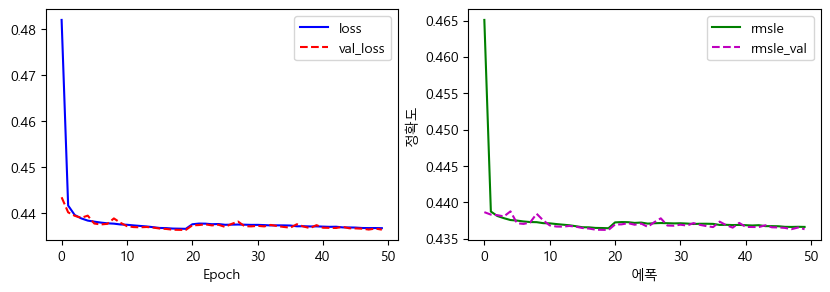

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(10,3))

axes.flat[0].plot(history.history['loss'], 'b-', label='loss')
axes.flat[0].plot(history.history['val_loss'], 'r--', label='val_loss')
axes.flat[0].set_xlabel('Epoch')
axes.flat[0].legend()
axes.flat[1].plot(history.history['metric_fn'], 'g-', label='rmsle')
axes.flat[1].plot(history.history['val_metric_fn'], 'm--', label='rmsle_val')
axes.flat[1].set_xlabel("에폭")
axes.flat[1].set_ylabel("정확도")
axes.flat[1].legend()
plt.show()

In [16]:
# from sklearn.model_selection import KFold

# skf = KFold(n_splits=5, shuffle=True, random_state=8827)
# fold_histories = []
# tf_test_preds2 = np.zeros(len(test_x))

# for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
#     x_train_fold, x_valid_fold = train_x.iloc[train_index], train_x.iloc[valid_index]
#     y_train_fold, y_valid_fold = train_y.iloc[train_index], train_y.iloc[valid_index]
#     optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])
#     history = optimized_model.fit(
#         x_train_fold.astype('float32'), 
#         y_train_fold.astype('float32'),
#         epochs=20, 
#         batch_size=best_params['batch_size'], 
#         validation_data=(
#             x_valid_fold.astype('float32'),
#             y_valid_fold.astype('float32')
#         ),
#         callbacks=callbacks_list,
#         verbose=1,
#     )

#     fold_histories.append(history)
#     tf_test_preds2 += optimized_model.predict(test_x.astype('float32')).reshape(-1) / skf.n_splits

In [17]:
# xgb ALL dataset

from sklearn.model_selection import StratifiedKFold, KFold
import xgboost as xgb


params = {
    'objective': 'reg:squaredlogerror',
    'eta': 0.015, 
    'seed': 8332,
    'max_depth': 7,
    "alpha": 0.001,
    "lambda": 0.001,
    'subsample': 0.8,
    'nthread': 8,
    'eval_metric': 'rmsle'
}
# dtrain = xgb.DMatrix(train_x.values, label=train_y.values, feature_types=ft, enable_categorical=True)
dtrain = xgb.DMatrix(train_x.values, label=train_y.values, enable_categorical=True)
bst = xgb.train(params, dtrain, num_boost_round=3000, evals=[(dtrain, 'train')], verbose_eval=200, early_stopping_rounds=10)
xgb_test_pred = bst.predict(xgb.DMatrix(test_x))

[0]	train-rmsle:1.25627
[200]	train-rmsle:0.46765
[400]	train-rmsle:0.43604
[600]	train-rmsle:0.43482
[800]	train-rmsle:0.43393
[1000]	train-rmsle:0.43311
[1200]	train-rmsle:0.43234
[1400]	train-rmsle:0.43165
[1600]	train-rmsle:0.43098
[1800]	train-rmsle:0.43031
[2000]	train-rmsle:0.42967
[2200]	train-rmsle:0.42905
[2400]	train-rmsle:0.42846
[2600]	train-rmsle:0.42787
[2800]	train-rmsle:0.42729
[2999]	train-rmsle:0.42674


In [18]:
# xgb stratifiedKFold

params = {
    'objective': 'reg:squaredlogerror',
    'eta': 0.015, 
    "alpha": 0.0001,
    "lambda": 0.0001,
    'seed': 3663,
    'max_depth': 6,
    'subsample': 0.8,
    'nthread': 8,
    'eval_metric': 'rmsle'
}
# ft = [cat_to_str[col] for col in train_x.columns]
train_preds = np.zeros(len(train_x))
xgb_test_preds = np.zeros(len(test_x))
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=3663)
# skf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    dtrain = xgb.DMatrix(train_x.values[train_index], label=train_y.values[train_index], enable_categorical=True)
    dvalid = xgb.DMatrix(train_x.values[valid_index], label=train_y.values[valid_index], enable_categorical=True)
    bst = xgb.train(params, dtrain, num_boost_round=1200, evals=[(dtrain, 'train'), (dvalid, 'valid')], verbose_eval=200, early_stopping_rounds=10)
    train_preds[valid_index] = bst.predict(dvalid)

    xgb_test_preds += bst.predict(xgb.DMatrix(test_x)) / skf.n_splits

[0]	train-rmsle:1.25625	valid-rmsle:1.25630
[200]	train-rmsle:0.46807	valid-rmsle:0.46846
[400]	train-rmsle:0.43662	valid-rmsle:0.43777
[600]	train-rmsle:0.43549	valid-rmsle:0.43740
[800]	train-rmsle:0.43470	valid-rmsle:0.43733
[916]	train-rmsle:0.43428	valid-rmsle:0.43731
[0]	train-rmsle:1.25627	valid-rmsle:1.25628
[200]	train-rmsle:0.46806	valid-rmsle:0.46836
[400]	train-rmsle:0.43662	valid-rmsle:0.43770
[600]	train-rmsle:0.43549	valid-rmsle:0.43730
[724]	train-rmsle:0.43501	valid-rmsle:0.43725
[0]	train-rmsle:1.25629	valid-rmsle:1.25623
[200]	train-rmsle:0.46803	valid-rmsle:0.46843
[400]	train-rmsle:0.43656	valid-rmsle:0.43779
[600]	train-rmsle:0.43541	valid-rmsle:0.43742
[760]	train-rmsle:0.43478	valid-rmsle:0.43735


In [36]:
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor, Pool


scaler = RobustScaler()
train_xs = scaler.fit_transform(train_x)
test_xs = scaler.fit_transform(test_x)

cat_train_preds = np.zeros(len(train_xs))
cat_test_preds = np.zeros(len(test_xs))


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_index, valid_index) in enumerate(skf.split(train_xs, train_y)):
    dtrain = Pool(data=train_xs[train_index], label=train_y[train_index])
    dvalid = Pool(data=train_xs[valid_index], label=train_y[valid_index])
    
    bst = CatBoostRegressor(
        iterations=1000,
        objective="RMSE",
        learning_rate=0.01,
        l2_leaf_reg=6,
        depth=4,
        random_seed=1047,
        subsample=0.7,
        bagging_temperature=0.23,
        od_type="Iter",
    )
    bst.fit(X=dtrain, eval_set=dvalid)
    
    cat_test_preds += bst.predict(Pool(test_xs)) / skf.n_splits

KeyError: '[602775, 602776, 602777, 602780, 602781, 602782, 602784, 602785, 602786, 602787, 602788, 602789, 602791, 602792, 602793, 602794, 602795, 602798, 602799, 602801, 602802, 602803, 602805, 602806, 602807, 602808, 602809, 602810, 602811, 602813, 602814, 602815, 602816, 602817, 602818, 602819, 602820, 602821, 602822, 602823, 602824, 602825, 602826, 602829, 602830, 602832, 602833, 602834, 602835, 602836, 602837, 602838, 602842, 602844, 602845, 602847, 602850, 602851, 602853, 602854, 602855, 602857, 602858, 602859, 602862, 602863, 602864, 602865, 602866, 602867, 602868, 602869, 602872, 602873, 602874, 602875, 602877, 602878, 602879, 602880, 602881, 602883, 602884, 602885, 602886, 602887, 602888, 602889, 602890, 602892, 602893, 602894, 602895, 602896, 602897, 602898, 602899, 602901, 602904, 602905, 602906, 602908, 602909, 602911, 602912, 602913, 602915, 602916, 602917, 602918, 602919, 602925, 602927, 602929, 602930, 602931, 602932, 602933, 602934, 602935, 602936, 602937, 602938, 602940, 602942, 602943, 602944, 602945, 602946, 602947, 602948, 602949, 602950, 602951, 602952, 602953, 602954, 602955, 602956, 602957, 602959, 602960, 602961, 602962, 602963, 602964, 602965, 602966, 602968, 602969, 602970, 602971, 602972, 602973, 602974, 602975, 602976, 602977, 602978, 602980, 602981, 602982, 602983, 602984, 602985, 602986, 602987, 602988, 602990, 602992, 602993, 602994, 602995, 602997, 602998, 602999, 603000, 603001, 603002, 603003, 603004, 603006, 603007, 603008, 603009, 603010, 603011, 603012, 603013, 603015, 603016, 603017, 603018, 603019, 603020, 603021, 603022, 603023, 603024, 603025, 603026, 603027, 603028, 603029, 603030, 603031, 603032, 603033, 603034, 603036, 603039, 603040, 603041, 603042, 603043, 603044, 603045, 603046, 603047, 603048, 603049, 603050, 603051, 603052, 603054, 603055, 603056, 603058, 603059, 603060, 603062, 603063, 603064, 603065, 603066, 603067, 603070, 603071, 603073, 603075, 603076, 603077, 603078, 603082, 603084, 603085, 603086, 603087, 603088, 603089, 603090, 603091, 603092, 603093, 603094, 603095, 603096, 603097, 603098, 603100, 603101, 603103, 603104, 603106, 603107, 603108, 603109, 603111, 603114, 603115, 603116, 603117, 603118, 603119, 603120, 603121, 603122, 603123, 603124, 603125, 603127, 603128, 603129, 603130, 603131, 603132, 603134, 603136, 603137, 603138, 603140, 603141, 603142, 603144, 603148, 603151, 603152, 603153, 603154, 603155, 603156, 603157, 603158, 603159, 603160, 603161, 603162, 603164, 603165, 603166, 603168, 603171, 603172, 603173, 603174, 603175, 603176, 603177, 603179, 603180, 603183, 603184, 603185, 603186, 603187, 603189, 603190, 603191, 603193, 603194, 603195, 603196, 603197, 603198, 603200, 603202, 603203, 603204, 603206, 603208, 603209, 603210, 603211, 603212, 603213, 603214, 603215, 603216, 603217, 603218, 603219, 603220, 603222, 603223, 603224, 603225, 603226, 603227, 603229, 603230, 603231, 603232, 603233, 603235, 603237, 603238, 603239, 603240, 603241, 603242, 603243, 603244, 603245, 603246, 603247, 603248, 603249, 603250, 603251, 603252, 603253, 603254, 603259, 603260, 603261, 603262, 603263, 603264, 603265, 603266, 603268, 603269, 603270, 603271, 603272, 603273, 603274, 603275, 603276, 603277, 603278, 603281, 603282, 603284, 603285, 603286, 603288, 603289, 603291, 603292, 603293, 603294, 603296, 603297, 603298, 603299, 603301, 603302, 603303, 603304, 603305, 603306, 603307, 603308, 603310, 603311, 603313, 603314, 603315, 603316, 603317, 603318, 603319, 603320, 603321, 603322, 603323, 603324, 603325, 603326, 603327, 603328, 603329, 603330, 603331, 603332, 603334, 603336, 603337, 603339, 603340, 603341, 603344, 603345, 603348, 603349, 603351, 603352, 603353, 603354, 603355, 603356, 603357, 603358, 603359, 603360, 603361, 603362, 603363, 603365, 603366, 603367, 603368, 603369, 603370, 603371, 603373, 603374, 603375, 603376, 603377, 603378, 603379, 603380, 603381, 603382, 603384, 603385, 603386, 603387, 603388, 603389, 603390, 603391, 603393, 603394, 603395, 603396, 603397, 603398, 603399, 603400, 603402, 603403, 603404, 603405, 603406, 603407, 603408, 603409, 603410, 603411, 603412, 603413, 603416, 603417, 603418, 603419, 603420, 603422, 603423, 603424, 603426, 603427, 603429, 603430, 603431, 603432, 603433, 603434, 603436, 603437, 603438, 603439, 603440, 603441, 603442, 603443, 603444, 603445, 603448, 603449, 603450, 603451, 603452, 603453, 603454, 603455, 603458, 603460, 603461, 603462, 603463, 603464, 603465, 603467, 603468, 603469, 603470, 603471, 603472, 603473, 603474, 603476, 603478, 603479, 603480, 603481, 603482, 603483, 603484, 603485, 603486, 603487, 603488, 603490, 603491, 603492, 603493, 603494, 603497, 603499, 603500, 603502, 603503, 603504, 603505, 603506, 603507, 603508, 603509, 603511, 603512, 603513, 603514, 603515, 603516, 603517, 603519, 603520, 603521, 603522, 603524, 603525, 603527, 603528, 603529, 603530, 603531, 603532, 603533, 603534, 603535, 603536, 603537, 603538, 603539, 603540, 603542, 603544, 603546, 603547, 603549, 603550, 603552, 603553, 603554, 603555, 603557, 603558, 603559, 603560, 603562, 603563, 603564, 603565, 603566, 603567, 603570, 603571, 603572, 603573, 603575, 603576, 603577, 603579, 603582, 603584, 603585, 603586, 603587, 603588, 603589, 603590, 603593, 603594, 603597, 603598, 603600, 603601, 603602, 603603, 603604, 603605, 603607, 603608, 603609, 603611, 603613, 603614, 603615, 603616, 603617, 603618, 603619, 603620, 603622, 603623, 603624, 603625, 603628, 603629, 603630, 603631, 603632, 603633, 603634, 603635, 603636, 603637, 603639, 603640, 603641, 603642, 603643, 603644, 603646, 603647, 603648, 603650, 603651, 603652, 603653, 603654, 603655, 603656, 603657, 603658, 603660, 603661, 603663, 603664, 603665, 603666, 603668, 603671, 603672, 603673, 603674, 603677, 603678, 603679, 603680, 603681, 603682, 603684, 603685, 603686, 603687, 603689, 603690, 603691, 603693, 603694, 603695, 603696, 603697, 603698, 603699, 603700, 603701, 603704, 603705, 603706, 603707, 603708, 603710, 603711, 603712, 603713, 603714, 603715, 603716, 603717, 603718, 603720, 603721, 603722, 603723, 603724, 603726, 603727, 603728, 603730, 603731, 603733, 603734, 603735, 603736, 603737, 603738, 603739, 603740, 603741, 603742, 603743, 603744, 603745, 603746, 603748, 603749, 603750, 603751, 603752, 603753, 603754, 603755, 603756, 603757, 603760, 603765, 603767, 603768, 603769, 603770, 603771, 603772, 603773, 603775, 603777, 603778, 603779, 603780, 603781, 603783, 603784, 603785, 603786, 603788, 603789, 603790, 603793, 603794, 603796, 603797, 603798, 603799, 603801, 603803, 603804, 603805, 603807, 603808, 603809, 603812, 603813, 603814, 603815, 603816, 603817, 603818, 603819, 603821, 603822, 603823, 603824, 603825, 603826, 603827, 603828, 603829, 603830, 603831, 603832, 603833, 603835, 603837, 603838, 603839, 603842, 603843, 603844, 603845, 603847, 603848, 603849, 603850, 603851, 603852, 603853, 603854, 603855, 603856, 603857, 603858, 603860, 603861, 603862, 603863, 603864, 603865, 603867, 603869, 603870, 603871, 603872, 603873, 603874, 603875, 603877, 603878, 603879, 603881, 603882, 603883, 603884, 603886, 603887, 603888, 603889, 603890, 603891, 603892, 603893, 603895, 603896, 603898, 603899, 603900, 603901, 603902, 603903, 603904, 603906, 603907, 603908, 603909, 603911, 603913, 603914, 603915, 603916, 603917, 603918, 603919, 603921, 603923, 603924, 603925, 603926, 603927, 603928, 603930, 603932, 603933, 603934, 603935, 603936, 603937, 603938, 603940, 603941, 603942, 603943, 603944, 603945, 603947, 603948, 603949, 603950, 603951, 603952, 603953, 603954, 603955, 603956, 603957, 603959, 603960, 603961, 603962, 603964, 603965, 603966, 603967, 603968, 603969, 603970, 603971, 603973, 603974, 603975, 603976, 603977, 603978, 603979, 603980, 603981, 603982, 603983, 603984, 603985, 603986, 603987, 603988, 603989, 603990, 603991, 603992, 603993, 603994, 603995, 603996, 603997, 603998, 603999, 604000, 604001, 604002, 604003, 604004, 604005, 604006, 604007, 604008, 604009, 604010, 604013, 604014, 604015, 604016, 604017, 604018, 604019, 604021, 604022, 604023, 604024, 604025, 604026, 604027, 604028, 604029, 604030, 604031, 604033, 604034, 604036, 604037, 604038, 604039, 604040, 604041, 604042, 604044, 604045, 604046, 604047, 604049, 604051, 604052, 604053, 604054, 604055, 604056, 604057, 604058, 604060, 604061, 604064, 604065, 604066, 604067, 604068, 604069, 604070, 604071, 604072, 604073, 604074, 604076, 604077, 604078, 604079, 604080, 604081, 604082, 604085, 604086, 604087, 604088, 604089, 604090, 604091, 604092, 604093, 604094, 604095, 604096, 604097, 604098, 604099, 604100, 604102, 604103, 604104, 604105, 604106, 604107, 604108, 604109, 604110, 604111, 604112, 604113, 604114, 604115, 604119, 604121, 604123, 604124, 604125, 604126, 604128, 604129, 604130, 604131, 604132, 604133, 604134, 604135, 604136, 604137, 604138, 604139, 604140, 604141, 604142, 604144, 604145, 604146, 604147, 604148, 604150, 604154, 604155, 604156, 604157, 604158, 604160, 604161, 604162, 604163, 604164, 604165, 604167, 604168, 604169, 604170, 604173, 604174, 604175, 604176, 604179, 604180, 604181, 604183, 604185, 604187, 604189, 604190, 604191, 604192, 604193, 604194, 604195, 604196, 604198, 604199, 604200, 604201, 604202, 604203, 604204, 604205, 604206, 604207, 604208, 604209, 604211, 604213, 604215, 604216, 604217, 604219, 604221, 604222, 604223, 604224, 604225, 604226, 604227, 604228, 604230, 604231, 604232, 604233, 604234, 604235, 604238, 604239, 604240, 604241, 604242, 604244, 604245, 604247, 604248, 604249, 604252, 604253, 604254, 604255, 604260, 604261, 604263, 604265, 604266, 604268, 604270, 604271, 604272, 604273, 604274, 604276, 604277, 604278, 604279, 604280, 604281, 604283, 604284, 604287, 604288, 604290, 604293, 604294, 604295, 604296, 604297, 604299, 604301, 604302, 604305, 604306, 604307, 604308, 604309, 604310, 604311, 604312, 604313, 604314, 604315, 604317, 604319, 604320, 604325, 604326, 604328, 604329, 604330, 604331, 604332, 604333, 604334, 604335, 604336, 604339, 604340, 604341, 604342, 604344, 604345, 604346, 604347, 604349, 604350, 604351, 604353, 604354, 604355, 604356, 604357, 604359, 604360, 604361, 604362, 604363, 604364, 604365, 604367, 604369, 604370, 604375, 604376, 604377, 604378, 604379, 604380, 604381, 604382, 604383, 604384, 604385, 604386, 604387, 604388, 604389, 604390, 604391, 604392, 604393, 604394, 604395, 604396, 604397, 604398, 604399, 604400, 604401, 604402, 604403, 604404, 604405, 604406, 604407, 604408, 604409, 604411, 604413, 604414, 604415, 604417, 604418, 604420, 604421, 604422, 604423, 604424, 604425, 604426, 604427, 604432, 604433, 604435, 604436, 604437, 604438, 604439, 604440, 604441, 604442, 604444, 604447, 604448, 604449, 604451, 604452, 604454, 604455, 604456, 604458, 604459, 604460, 604462, 604464, 604466, 604467, 604468, 604469, 604470, 604471, 604474, 604475, 604476, 604477, 604478, 604480, 604481, 604484, 604485, 604487, 604488, 604489, 604491, 604493, 604494, 604496, 604497, 604498, 604499, 604500, 604501, 604502, 604503, 604504, 604505, 604506, 604507, 604508, 604509, 604511, 604514, 604515, 604516, 604521, 604522, 604523, 604524, 604525, 604526, 604528, 604529, 604530, 604531, 604533, 604534, 604535, 604536, 604537, 604538, 604539, 604540, 604541, 604542, 604543, 604544, 604545, 604547, 604548, 604549, 604550, 604551, 604552, 604553, 604554, 604555, 604556, 604557, 604558, 604561, 604562, 604563, 604564, 604565, 604566, 604567, 604568, 604570, 604573, 604577, 604578, 604579, 604580, 604581, 604582, 604583, 604585, 604586, 604587, 604588, 604589, 604590, 604591, 604594, 604595, 604596, 604597, 604598, 604599, 604600, 604601, 604602, 604603, 604604, 604605, 604606, 604607, 604608, 604609, 604610, 604616, 604617, 604619, 604621, 604623, 604625, 604626, 604627, 604628, 604629, 604631, 604634, 604635, 604636, 604637, 604638, 604639, 604640, 604641, 604642, 604643, 604644, 604645, 604646, 604647, 604648, 604649, 604650, 604651, 604652, 604653, 604655, 604656, 604657, 604658, 604659, 604660, 604662, 604663, 604664, 604666, 604667, 604668, 604669, 604670, 604671, 604672, 604673, 604674, 604675, 604677, 604679, 604680, 604681, 604682, 604683, 604685, 604687, 604689, 604690, 604691, 604692, 604693, 604694, 604695, 604696, 604697, 604698, 604699, 604700, 604703, 604705, 604706, 604707, 604709, 604710, 604712, 604713, 604714, 604715, 604716, 604717, 604718, 604720, 604721, 604722, 604724, 604725, 604726, 604728, 604730, 604732, 604734, 604735, 604736, 604737, 604739, 604740, 604741, 604742, 604743, 604744, 604745, 604746, 604747, 604749, 604753, 604755, 604757, 604758, 604760, 604762, 604764, 604765, 604766, 604769, 604771, 604773, 604774, 604775, 604776, 604777, 604778, 604779, 604782, 604784, 604785, 604786, 604787, 604788, 604789, 604790, 604792, 604794, 604795, 604796, 604797, 604800, 604802, 604803, 604804, 604805, 604806, 604807, 604808, 604809, 604810, 604813, 604815, 604816, 604817, 604819, 604822, 604823, 604825, 604826, 604827, 604828, 604829, 604831, 604832, 604833, 604834, 604836, 604838, 604839, 604840, 604841, 604843, 604844, 604845, 604846, 604847, 604849, 604850, 604852, 604855, 604857, 604858, 604859, 604861, 604863, 604864, 604866, 604867, 604868, 604869, 604870, 604871, 604872, 604873, 604875, 604876, 604877, 604879, 604880, 604881, 604883, 604884, 604885, 604886, 604887, 604888, 604889, 604890, 604891, 604892, 604893, 604894, 604895, 604896, 604897, 604898, 604899, 604900, 604901, 604902, 604903, 604904, 604906, 604908, 604909, 604910, 604912, 604914, 604915, 604917, 604918, 604919, 604920, 604921, 604922, 604924, 604925, 604926, 604927, 604928, 604930, 604931, 604933, 604934, 604935, 604937, 604939, 604940, 604941, 604942, 604943, 604945, 604946, 604947, 604948, 604949, 604950, 604951, 604952, 604953, 604954, 604955, 604956, 604957, 604960, 604961, 604962, 604963, 604964, 604965, 604967, 604969, 604970, 604971, 604972, 604973, 604974, 604975, 604976, 604977, 604979, 604980, 604981, 604982, 604983, 604984, 604987, 604988, 604989, 604990, 604991, 604993, 604994, 604995, 604996, 604997, 604998, 604999, 605000, 605001, 605002, 605003, 605004, 605005, 605007, 605008, 605009, 605011, 605012, 605014, 605015, 605016, 605018, 605019, 605020, 605021, 605022, 605024, 605025, 605027, 605028, 605029, 605030, 605031, 605032, 605033, 605034, 605035, 605037, 605038, 605039, 605041, 605042, 605044, 605045, 605047, 605048, 605049, 605050, 605051, 605052, 605053, 605054, 605055, 605057, 605058, 605059, 605061, 605062, 605063, 605064, 605065, 605066, 605067, 605068, 605069, 605071, 605073, 605076, 605077, 605079, 605080, 605081, 605082, 605083, 605085, 605086, 605087, 605088, 605089, 605091, 605092, 605093, 605095, 605096, 605097, 605098, 605099, 605100, 605101, 605102, 605103, 605104, 605105, 605106, 605107, 605108, 605109, 605110, 605111, 605112, 605113, 605114, 605118, 605119, 605120, 605121, 605122, 605123, 605124, 605125, 605126, 605127, 605128, 605129, 605130, 605131, 605132, 605133, 605134, 605135, 605136, 605137, 605138, 605141, 605142, 605144, 605145, 605146, 605147, 605148, 605149, 605150, 605151, 605154, 605156, 605158, 605159, 605160, 605161, 605162, 605163, 605164, 605165, 605166, 605167, 605168, 605169, 605170, 605171, 605172, 605173, 605174, 605175, 605177, 605178, 605179, 605180, 605181, 605182, 605183, 605184, 605185, 605186, 605187, 605188, 605189, 605190, 605192, 605193, 605194, 605196, 605197, 605198, 605202, 605203, 605205, 605206, 605207, 605208, 605210, 605211, 605212, 605215, 605216, 605218, 605219, 605221, 605222, 605223, 605224, 605225, 605227, 605228, 605229, 605230, 605231, 605232, 605234, 605236, 605237, 605238, 605239, 605240, 605241, 605242, 605243, 605244, 605245, 605246, 605249, 605250, 605252, 605253, 605255, 605256, 605258, 605259, 605260, 605261, 605263, 605264, 605265, 605267, 605268, 605269, 605270, 605272, 605274, 605275, 605278, 605279, 605280, 605281, 605282, 605284, 605285, 605286, 605288, 605289, 605290, 605293, 605294, 605295, 605297, 605298, 605299, 605301, 605302, 605303, 605304, 605305, 605307, 605308, 605309, 605312, 605313, 605314, 605316, 605317, 605318, 605319, 605321, 605322, 605323, 605324, 605325, 605326, 605327, 605329, 605330, 605331, 605332, 605333, 605334, 605335, 605336, 605339, 605340, 605341, 605342, 605343, 605344, 605345, 605346, 605348, 605349, 605350, 605351, 605352, 605353, 605354, 605355, 605356, 605357, 605358, 605359, 605360, 605361, 605362, 605364, 605365, 605366, 605367, 605368, 605369, 605370, 605372, 605373, 605374, 605375, 605376, 605377, 605378, 605379, 605380, 605381, 605382, 605383, 605384, 605385, 605386, 605387, 605389, 605390, 605391, 605393, 605394, 605395, 605396, 605397, 605398, 605399, 605401, 605402, 605403, 605404, 605405, 605406, 605407, 605408, 605409, 605411, 605412, 605414, 605415, 605417, 605418, 605419, 605420, 605421, 605422, 605423, 605424, 605425, 605426, 605427, 605428, 605430, 605431, 605433, 605434, 605435, 605436, 605437, 605438, 605439, 605440, 605441, 605443, 605444, 605445, 605446, 605447, 605448, 605449, 605450, 605451, 605452, 605454, 605456, 605457, 605458, 605459, 605461, 605462, 605463, 605465, 605469, 605470, 605471, 605472, 605473, 605474, 605475, 605476, 605477, 605478, 605479, 605481, 605482, 605483, 605484, 605485, 605487, 605489, 605490, 605491, 605492, 605493, 605494, 605495, 605496, 605497, 605498, 605499, 605500, 605501, 605502, 605503, 605504, 605505, 605506, 605507, 605508, 605509, 605511, 605513, 605515, 605517, 605518, 605519, 605520, 605521, 605523, 605525, 605526, 605527, 605528, 605529, 605530, 605532, 605534, 605535, 605536, 605537, 605538, 605539, 605540, 605542, 605543, 605545, 605547, 605549, 605550, 605551, 605552, 605554, 605555, 605556, 605557, 605558, 605560, 605562, 605563, 605564, 605566, 605567, 605568, 605569, 605570, 605571, 605572, 605573, 605574, 605575, 605576, 605577, 605578, 605579, 605580, 605581, 605582, 605583, 605584, 605585, 605586, 605588, 605589, 605590, 605591, 605593, 605594, 605595, 605596, 605597, 605598, 605599, 605600, 605602, 605603, 605604, 605605, 605606, 605607, 605608, 605612, 605613, 605614, 605615, 605616, 605618, 605619, 605621, 605622, 605624, 605626, 605627, 605628, 605629, 605630, 605631, 605633, 605634, 605635, 605636, 605637, 605638, 605639, 605640, 605642, 605643, 605644, 605645, 605646, 605647, 605648, 605649, 605650, 605651, 605653, 605654, 605655, 605656, 605657, 605658, 605660, 605661, 605662, 605664, 605665, 605666, 605667, 605668, 605669, 605671, 605672, 605673, 605674, 605675, 605676, 605678, 605679, 605680, 605681, 605682, 605684, 605685, 605688, 605689, 605690, 605691, 605692, 605693, 605694, 605695, 605696, 605697, 605698, 605699, 605700, 605701, 605702, 605703, 605704, 605705, 605706, 605707, 605710, 605711, 605712, 605713, 605714, 605715, 605716, 605717, 605718, 605719, 605720, 605721, 605722, 605724, 605725, 605726, 605727, 605728, 605730, 605731, 605732, 605733, 605734, 605735, 605736, 605737, 605738, 605739, 605741, 605743, 605744, 605745, 605746, 605747, 605748, 605749, 605750, 605751, 605752, 605753, 605755, 605756, 605757, 605758, 605759, 605760, 605761, 605762, 605763, 605764, 605765, 605767, 605768, 605770, 605771, 605773, 605774, 605775, 605776, 605778, 605779, 605781, 605782, 605783, 605784, 605785, 605786, 605787, 605789, 605790, 605791, 605793, 605794, 605795, 605796, 605797, 605798, 605799, 605800, 605801, 605803, 605804, 605805, 605807, 605808, 605809, 605811, 605813, 605814, 605815, 605817, 605818, 605819, 605820, 605821, 605822, 605823, 605824, 605825, 605826, 605827, 605830, 605831, 605832, 605833, 605834, 605835, 605836, 605837, 605838, 605839, 605840, 605842, 605843, 605845, 605846, 605847, 605848, 605849, 605850, 605851, 605852, 605854, 605855, 605857, 605859, 605860, 605862, 605863, 605864, 605865, 605867, 605868, 605869, 605870, 605871, 605872, 605873, 605875, 605876, 605877, 605880, 605881, 605882, 605884, 605886, 605888, 605889, 605890, 605891, 605892, 605893, 605895, 605896, 605897, 605898, 605899, 605900, 605901, 605904, 605907, 605908, 605909, 605910, 605911, 605912, 605913, 605914, 605915, 605916, 605917, 605918, 605919, 605921, 605922, 605923, 605924, 605925, 605928, 605929, 605930, 605931, 605932, 605934, 605935, 605936, 605937, 605938, 605939, 605940, 605941, 605942, 605943, 605944, 605945, 605946, 605947, 605948, 605949, 605950, 605951, 605952, 605953, 605954, 605956, 605957, 605959, 605962, 605963, 605964, 605965, 605967, 605968, 605969, 605970, 605971, 605972, 605973, 605975, 605976, 605977, 605978, 605979, 605980, 605981, 605983, 605984, 605985, 605986, 605987, 605988, 605989, 605990, 605992, 605993, 605995, 605997, 605998, 605999, 606000, 606001, 606002, 606003, 606004, 606005, 606006, 606009, 606010, 606011, 606012, 606014, 606015, 606016, 606017, 606019, 606021, 606022, 606023, 606024, 606025, 606026, 606027, 606028, 606029, 606030, 606031, 606033, 606034, 606035, 606036, 606037, 606038, 606039, 606043, 606044, 606045, 606047, 606048, 606049, 606051, 606052, 606054, 606055, 606057, 606058, 606059, 606060, 606061, 606062, 606063, 606065, 606066, 606067, 606068, 606069, 606070, 606071, 606072, 606073, 606074, 606076, 606077, 606078, 606079, 606080, 606081, 606082, 606083, 606084, 606086, 606087, 606088, 606089, 606091, 606092, 606093, 606094, 606096, 606097, 606099, 606100, 606101, 606102, 606103, 606104, 606106, 606107, 606109, 606110, 606111, 606112, 606113, 606114, 606115, 606116, 606117, 606118, 606119, 606120, 606121, 606122, 606123, 606124, 606127, 606129, 606130, 606131, 606132, 606133, 606134, 606135, 606137, 606138, 606139, 606140, 606141, 606142, 606143, 606144, 606145, 606146, 606147, 606148, 606150, 606151, 606152, 606153, 606154, 606155, 606156, 606157, 606158, 606159, 606160, 606161, 606162, 606163, 606165, 606166, 606167, 606168, 606170, 606172, 606173, 606174, 606176, 606177, 606178, 606179, 606180, 606181, 606182, 606184, 606185, 606186, 606187, 606188, 606189, 606190, 606192, 606193, 606194, 606195, 606197, 606198, 606199, 606200, 606201, 606202, 606204, 606205, 606206, 606208, 606209, 606210, 606211, 606213, 606214, 606215, 606216, 606218, 606219, 606220, 606221, 606222, 606223, 606224, 606226, 606227, 606228, 606229, 606230, 606231, 606232, 606234, 606235, 606236, 606237, 606239, 606240, 606241, 606242, 606243, 606245, 606246, 606247, 606248, 606249, 606251, 606252, 606253, 606254, 606255, 606256, 606257, 606258, 606259, 606260, 606261, 606262, 606263, 606264, 606266, 606268, 606269, 606270, 606271, 606272, 606273, 606275, 606276, 606277, 606279, 606280, 606281, 606282, 606283, 606287, 606288, 606289, 606290, 606291, 606292, 606293, 606298, 606299, 606300, 606301, 606302, 606303, 606304, 606305, 606306, 606307, 606308, 606309, 606310, 606311, 606312, 606313, 606314, 606315, 606316, 606317, 606318, 606319, 606320, 606322, 606323, 606325, 606326, 606327, 606328, 606331, 606332, 606334, 606335, 606336, 606337, 606338, 606339, 606340, 606341, 606342, 606343, 606344, 606345, 606346, 606347, 606348, 606349, 606350, 606352, 606354, 606355, 606356, 606357, 606358, 606359, 606360, 606361, 606362, 606364, 606365, 606366, 606368, 606369, 606370, 606371, 606373, 606374, 606375, 606376, 606377, 606378, 606379, 606380, 606381, 606383, 606384, 606386, 606387, 606388, 606389, 606390, 606392, 606394, 606396, 606397, 606398, 606399, 606400, 606403, 606404, 606405, 606406, 606407, 606409, 606410, 606412, 606413, 606414, 606415, 606416, 606417, 606418, 606419, 606420, 606421, 606422, 606423, 606425, 606426, 606427, 606428, 606429, 606430, 606431, 606433, 606434, 606435, 606436, 606437, 606438, 606439, 606440, 606441, 606443, 606444, 606445, 606446, 606447, 606448, 606449, 606451, 606453, 606454, 606455, 606456, 606457, 606459, 606461, 606465, 606466, 606467, 606468, 606469, 606471, 606472, 606473, 606474, 606477, 606478, 606480, 606481, 606482, 606483, 606484, 606485, 606486, 606487, 606488, 606490, 606492, 606493, 606495, 606496, 606497, 606498, 606499, 606500, 606501, 606502, 606503, 606504, 606505, 606506, 606507, 606508, 606509, 606510, 606511, 606512, 606513, 606514, 606515, 606516, 606517, 606519, 606520, 606521, 606522, 606523, 606524, 606525, 606526, 606527, 606528, 606529, 606530, 606531, 606532, 606533, 606535, 606537, 606538, 606539, 606540, 606541, 606543, 606545, 606547, 606548, 606549, 606550, 606551, 606552, 606554, 606555, 606558, 606559, 606565, 606566, 606568, 606569, 606571, 606572, 606573, 606574, 606575, 606576, 606577, 606579, 606580, 606581, 606582, 606583, 606584, 606585, 606586, 606587, 606588, 606589, 606590, 606591, 606592, 606593, 606594, 606595, 606596, 606597, 606598, 606599, 606600, 606601, 606604, 606605, 606606, 606607, 606608, 606609, 606610, 606611, 606613, 606614, 606615, 606616, 606617, 606620, 606621, 606623, 606624, 606625, 606626, 606627, 606628, 606629, 606632, 606634, 606635, 606636, 606638, 606640, 606642, 606643, 606644, 606645, 606647, 606648, 606649, 606650, 606651, 606652, 606653, 606654, 606656, 606657, 606658, 606660, 606661, 606662, 606663, 606664, 606665, 606666, 606667, 606669, 606670, 606671, 606672, 606673, 606674, 606675, 606676, 606677, 606679, 606680, 606682, 606684, 606686, 606687, 606689, 606690, 606691, 606692, 606693, 606696, 606697, 606698, 606700, 606701, 606702, 606703, 606705, 606706, 606707, 606708, 606709, 606710, 606711, 606712, 606715, 606716, 606717, 606719, 606720, 606721, 606722, 606723, 606724, 606725, 606726, 606728, 606729, 606731, 606732, 606733, 606734, 606736, 606737, 606740, 606741, 606742, 606744, 606745, 606746, 606747, 606749, 606750, 606751, 606752, 606753, 606754, 606755, 606757, 606759, 606760, 606761, 606762, 606763, 606764, 606765, 606766, 606767, 606768, 606769, 606770, 606771, 606772, 606773, 606774, 606775, 606776, 606777, 606778, 606780, 606781, 606782, 606783, 606785, 606786, 606787, 606788, 606789, 606790, 606791, 606793, 606796, 606797, 606798, 606799, 606800, 606801, 606802, 606803, 606804, 606805, 606806, 606808, 606810, 606811, 606812, 606813, 606814, 606815, 606816, 606817, 606818, 606822, 606823, 606824, 606825, 606827, 606828, 606831, 606832, 606833, 606834, 606835, 606836, 606837, 606839, 606840, 606842, 606844, 606845, 606846, 606847, 606848, 606849, 606850, 606851, 606852, 606853, 606854, 606856, 606857, 606858, 606859, 606861, 606862, 606863, 606864, 606865, 606866, 606867, 606869, 606870, 606871, 606872, 606874, 606875, 606876, 606877, 606878, 606879, 606880, 606881, 606882, 606883, 606887, 606888, 606889, 606891, 606892, 606893, 606894, 606895, 606897, 606898, 606899, 606900, 606901, 606902, 606903, 606904, 606905, 606907, 606908, 606910, 606912, 606913, 606917, 606918, 606919, 606920, 606921, 606922, 606923, 606924, 606925, 606926, 606927, 606929, 606930, 606931, 606932, 606933, 606935, 606936, 606937, 606938, 606939, 606940, 606941, 606942, 606943, 606944, 606945, 606946, 606947, 606949, 606950, 606951, 606952, 606953, 606954, 606955, 606957, 606958, 606960, 606962, 606964, 606965, 606966, 606967, 606968, 606969, 606970, 606972, 606974, 606975, 606976, 606977, 606978, 606980, 606981, 606983, 606986, 606988, 606989, 606990, 606991, 606992, 606993, 606994, 606995, 606996, 606997, 607001, 607003, 607004, 607005, 607006, 607007, 607008, 607009, 607010, 607011, 607012, 607013, 607014, 607015, 607016, 607017, 607018, 607019, 607020, 607021, 607022, 607023, 607024, 607025, 607026, 607027, 607028, 607029, 607030, 607031, 607032, 607033, 607034, 607036, 607037, 607039, 607040, 607041, 607042, 607043, 607044, 607045, 607046, 607047, 607048, 607049, 607050, 607051, 607052, 607053, 607054, 607055, 607057, 607058, 607059, 607060, 607061, 607062, 607063, 607064, 607066, 607067, 607068, 607069, 607072, 607073, 607074, 607075, 607076, 607077, 607078, 607079, 607080, 607081, 607082, 607083, 607084, 607085, 607086, 607089, 607091, 607092, 607093, 607094, 607095, 607097, 607099, 607100, 607101, 607102, 607103, 607105, 607106, 607108, 607110, 607112, 607113, 607114, 607115, 607116, 607117, 607118, 607122, 607123, 607124, 607125, 607126, 607127, 607128, 607129, 607131, 607133, 607135, 607136, 607137, 607138, 607139, 607140, 607141, 607142, 607143, 607144, 607145, 607146, 607148, 607149, 607150, 607151, 607152, 607153, 607156, 607157, 607158, 607159, 607160, 607162, 607163, 607164, 607165, 607166, 607167, 607168, 607169, 607170, 607171, 607173, 607174, 607175, 607176, 607177, 607179, 607180, 607181, 607182, 607184, 607185, 607189, 607191, 607192, 607193, 607194, 607195, 607196, 607198, 607199, 607203, 607204, 607205, 607208, 607209, 607210, 607211, 607212, 607213, 607214, 607215, 607217, 607219, 607220, 607221, 607224, 607225, 607226, 607228, 607229, 607230, 607231, 607232, 607234, 607235, 607236, 607237, 607239, 607240, 607241, 607244, 607245, 607246, 607247, 607248, 607249, 607250, 607251, 607252, 607253, 607254, 607255, 607258, 607259, 607260, 607261, 607262, 607263, 607265, 607266, 607268, 607270, 607272, 607273, 607274, 607275, 607276, 607278, 607279, 607280, 607282, 607283, 607284, 607285, 607286, 607287, 607288, 607290, 607291, 607292, 607293, 607294, 607295, 607297, 607300, 607301, 607303, 607304, 607305, 607306, 607307, 607308, 607310, 607311, 607313, 607315, 607316, 607317, 607318, 607319, 607320, 607322, 607324, 607325, 607326, 607327, 607329, 607330, 607331, 607332, 607333, 607334, 607335, 607336, 607337, 607338, 607339, 607340, 607341, 607343, 607344, 607345, 607346, 607347, 607350, 607351, 607352, 607353, 607355, 607356, 607357, 607358, 607359, 607360, 607362, 607363, 607364, 607365, 607366, 607367, 607368, 607370, 607372, 607373, 607374, 607375, 607377, 607378, 607380, 607381, 607382, 607383, 607384, 607386, 607387, 607388, 607389, 607390, 607391, 607392, 607393, 607394, 607395, 607396, 607397, 607399, 607400, 607401, 607402, 607403, 607404, 607405, 607406, 607407, 607408, 607409, 607410, 607411, 607412, 607413, 607414, 607415, 607416, 607417, 607418, 607420, 607421, 607422, 607423, 607424, 607426, 607427, 607428, 607430, 607431, 607432, 607433, 607434, 607435, 607436, 607437, 607438, 607439, 607440, 607441, 607442, 607443, 607444, 607445, 607448, 607449, 607450, 607452, 607453, 607454, 607455, 607458, 607459, 607460, 607461, 607462, 607464, 607465, 607466, 607467, 607469, 607470, 607471, 607473, 607474, 607475, 607476, 607478, 607479, 607480, 607482, 607483, 607484, 607485, 607486, 607488, 607489, 607490, 607491, 607492, 607493, 607494, 607495, 607496, 607498, 607499, 607503, 607504, 607506, 607508, 607509, 607510, 607513, 607514, 607515, 607516, 607517, 607518, 607519, 607520, 607521, 607522, 607525, 607526, 607527, 607528, 607529, 607530, 607531, 607532, 607533, 607534, 607535, 607537, 607538, 607539, 607540, 607541, 607542, 607543, 607544, 607545, 607547, 607549, 607551, 607552, 607554, 607555, 607556, 607557, 607558, 607559, 607560, 607561, 607562, 607566, 607567, 607569, 607570, 607571, 607572, 607573, 607574, 607575, 607576, 607577, 607579, 607580, 607581, 607582, 607583, 607584, 607585, 607586, 607587, 607588, 607589, 607590, 607591, 607592, 607593, 607594, 607595, 607597, 607600, 607601, 607602, 607603, 607605, 607606, 607607, 607608, 607609, 607610, 607611, 607612, 607613, 607615, 607616, 607617, 607618, 607619, 607620, 607621, 607622, 607623, 607624, 607625, 607626, 607627, 607628, 607629, 607630, 607631, 607632, 607633, 607635, 607638, 607639, 607640, 607641, 607643, 607644, 607648, 607649, 607650, 607651, 607652, 607653, 607654, 607655, 607656, 607657, 607658, 607659, 607660, 607661, 607662, 607663, 607664, 607665, 607666, 607667, 607668, 607670, 607673, 607674, 607675, 607676, 607677, 607678, 607680, 607683, 607685, 607686, 607687, 607688, 607690, 607691, 607692, 607693, 607694, 607695, 607696, 607697, 607698, 607699, 607700, 607701, 607702, 607707, 607708, 607709, 607710, 607711, 607713, 607714, 607716, 607717, 607718, 607719, 607720, 607722, 607724, 607725, 607727, 607728, 607730, 607731, 607732, 607733, 607734, 607736, 607737, 607739, 607741, 607742, 607744, 607745, 607746, 607747, 607751, 607752, 607753, 607754, 607755, 607756, 607757, 607759, 607760, 607761, 607762, 607764, 607766, 607767, 607768, 607770, 607771, 607772, 607773, 607774, 607775, 607776, 607777, 607778, 607779, 607780, 607781, 607782, 607783, 607784, 607785, 607786, 607787, 607788, 607789, 607790, 607792, 607794, 607795, 607796, 607798, 607799, 607801, 607802, 607803, 607804, 607805, 607806, 607807, 607808, 607809, 607810, 607811, 607812, 607813, 607814, 607815, 607816, 607817, 607818, 607819, 607820, 607823, 607824, 607825, 607826, 607828, 607829, 607830, 607831, 607835, 607836, 607838, 607839, 607840, 607841, 607842, 607843, 607844, 607845, 607846, 607847, 607848, 607850, 607851, 607852, 607853, 607855, 607857, 607858, 607859, 607861, 607862, 607863, 607864, 607867, 607869, 607870, 607872, 607873, 607874, 607877, 607878, 607879, 607880, 607882, 607884, 607885, 607886, 607887, 607889, 607890, 607892, 607894, 607895, 607897, 607898, 607899, 607900, 607902, 607903, 607904, 607905, 607906, 607907, 607908, 607909, 607911, 607912, 607913, 607916, 607917, 607918, 607919, 607920, 607921, 607922, 607923, 607924, 607925, 607926, 607927, 607929, 607931, 607933, 607934, 607935, 607936, 607937, 607938, 607939, 607940, 607941, 607942, 607943, 607944, 607945, 607947, 607948, 607949, 607955, 607956, 607958, 607960, 607961, 607962, 607963, 607964, 607965, 607966, 607967, 607968, 607969, 607971, 607972, 607974, 607978, 607979, 607980, 607981, 607982, 607983, 607984, 607985, 607986, 607987, 607988, 607989, 607990, 607991, 607992, 607993, 607994, 607995, 607996, 607997, 607998, 607999, 608002, 608003, 608004, 608005, 608006, 608007, 608008, 608009, 608010, 608012, 608013, 608014, 608015, 608016, 608018, 608019, 608020, 608021, 608023, 608025, 608026, 608027, 608028, 608029, 608030, 608031, 608032, 608033, 608034, 608035, 608036, 608037, 608038, 608039, 608042, 608043, 608045, 608046, 608047, 608048, 608050, 608052, 608053, 608054, 608055, 608056, 608057, 608058, 608061, 608062, 608065, 608066, 608067, 608068, 608069, 608072, 608073, 608074, 608075, 608076, 608080, 608081, 608082, 608083, 608084, 608085, 608087, 608088, 608089, 608090, 608091, 608092, 608093, 608094, 608095, 608096, 608097, 608098, 608099, 608100, 608101, 608102, 608103, 608104, 608105, 608109, 608110, 608111, 608112, 608113, 608114, 608115, 608116, 608117, 608121, 608122, 608123, 608124, 608125, 608126, 608127, 608128, 608130, 608133, 608134, 608135, 608136, 608138, 608139, 608140, 608141, 608142, 608143, 608145, 608146, 608148, 608149, 608150, 608151, 608152, 608153, 608155, 608156, 608158, 608160, 608161, 608162, 608163, 608164, 608165, 608166, 608167, 608168, 608169, 608170, 608171, 608172, 608173, 608174, 608175, 608176, 608177, 608178, 608180, 608181, 608182, 608183, 608184, 608185, 608186, 608187, 608188, 608190, 608191, 608192, 608193, 608194, 608195, 608197, 608198, 608200, 608201, 608202, 608203, 608205, 608206, 608207, 608208, 608209, 608211, 608212, 608213, 608214, 608215, 608216, 608217, 608218, 608220, 608222, 608224, 608225, 608226, 608229, 608230, 608233, 608234, 608236, 608238, 608239, 608240, 608242, 608243, 608245, 608248, 608249, 608251, 608252, 608253, 608254, 608255, 608256, 608257, 608258, 608261, 608262, 608263, 608265, 608266, 608267, 608268, 608269, 608270, 608271, 608272, 608273, 608274, 608275, 608276, 608277, 608278, 608279, 608280, 608282, 608283, 608284, 608285, 608286, 608287, 608288, 608289, 608290, 608292, 608293, 608294, 608295, 608296, 608297, 608298, 608299, 608300, 608301, 608302, 608304, 608305, 608306, 608309, 608310, 608311, 608312, 608313, 608314, 608315, 608316, 608317, 608318, 608319, 608321, 608322, 608324, 608325, 608326, 608327, 608328, 608330, 608331, 608332, 608333, 608335, 608336, 608337, 608338, 608339, 608341, 608342, 608345, 608346, 608347, 608348, 608349, 608350, 608351, 608352, 608356, 608357, 608358, 608359, 608360, 608361, 608362, 608363, 608364, 608365, 608367, 608368, 608369, 608370, 608371, 608372, 608373, 608374, 608375, 608376, 608377, 608378, 608380, 608381, 608382, 608383, 608385, 608386, 608387, 608389, 608390, 608391, 608392, 608393, 608394, 608395, 608396, 608399, 608400, 608402, 608403, 608405, 608406, 608407, 608408, 608409, 608410, 608411, 608412, 608413, 608414, 608415, 608417, 608418, 608419, 608420, 608421, 608422, 608426, 608427, 608428, 608431, 608432, 608433, 608434, 608436, 608437, 608438, 608440, 608441, 608442, 608443, 608444, 608446, 608447, 608448, 608449, 608450, 608451, 608452, 608455, 608456, 608457, 608458, 608459, 608460, 608461, 608462, 608463, 608464, 608467, 608469, 608470, 608471, 608472, 608473, 608474, 608475, 608477, 608478, 608479, 608480, 608481, 608482, 608483, 608484, 608485, 608487, 608488, 608489, 608490, 608491, 608492, 608493, 608494, 608495, 608496, 608498, 608499, 608500, 608501, 608503, 608504, 608505, 608506, 608507, 608508, 608510, 608511, 608512, 608513, 608514, 608515, 608516, 608517, 608518, 608520, 608521, 608522, 608523, 608524, 608526, 608527, 608529, 608530, 608531, 608532, 608533, 608534, 608537, 608539, 608540, 608541, 608544, 608545, 608546, 608547, 608548, 608549, 608550, 608553, 608554, 608555, 608556, 608557, 608558, 608559, 608561, 608562, 608563, 608564, 608565, 608566, 608568, 608569, 608571, 608572, 608574, 608575, 608576, 608578, 608579, 608580, 608581, 608582, 608583, 608584, 608585, 608586, 608587, 608589, 608590, 608591, 608592, 608593, 608595, 608596, 608597, 608598, 608599, 608600, 608601, 608602, 608603, 608604, 608605, 608606, 608607, 608608, 608610, 608612, 608613, 608614, 608615, 608616, 608617, 608618, 608619, 608620, 608621, 608623, 608624, 608625, 608629, 608630, 608632, 608633, 608634, 608635, 608639, 608640, 608643, 608644, 608645, 608646, 608647, 608648, 608650, 608651, 608652, 608653, 608655, 608656, 608658, 608661, 608662, 608663, 608664, 608665, 608667, 608668, 608669, 608670, 608671, 608672, 608673, 608674, 608675, 608676, 608678, 608679, 608680, 608681, 608682, 608683, 608684, 608685, 608687, 608688, 608689, 608690, 608691, 608692, 608693, 608694, 608696, 608698, 608699, 608700, 608702, 608703, 608704, 608707, 608708, 608710, 608711, 608712, 608713, 608714, 608716, 608717, 608718, 608719, 608720, 608721, 608722, 608724, 608725, 608726, 608728, 608729, 608730, 608732, 608733, 608734, 608735, 608737, 608738, 608739, 608741, 608742, 608743, 608744, 608746, 608748, 608749, 608750, 608752, 608753, 608754, 608756, 608757, 608758, 608759, 608760, 608762, 608764, 608765, 608767, 608768, 608769, 608771, 608772, 608773, 608774, 608775, 608776, 608777, 608779, 608780, 608781, 608782, 608783, 608784, 608786, 608788, 608790, 608792, 608793, 608794, 608797, 608798, 608799, 608800, 608802, 608803, 608804, 608805, 608806, 608807, 608808, 608810, 608811, 608812, 608813, 608814, 608815, 608816, 608817, 608818, 608820, 608821, 608822, 608823, 608824, 608826, 608827, 608828, 608829, 608830, 608831, 608833, 608834, 608836, 608839, 608840, 608841, 608842, 608844, 608845, 608846, 608847, 608849, 608850, 608851, 608852, 608853, 608855, 608856, 608857, 608858, 608859, 608860, 608861, 608862, 608863, 608864, 608865, 608866, 608867, 608868, 608869, 608870, 608872, 608873, 608874, 608875, 608876, 608877, 608878, 608879, 608880, 608881, 608882, 608886, 608887, 608888, 608890, 608891, 608892, 608893, 608894, 608896, 608897, 608898, 608899, 608900, 608901, 608903, 608904, 608905, 608906, 608908, 608909, 608910, 608911, 608912, 608913, 608914, 608915, 608916, 608917, 608918, 608919, 608920, 608921, 608922, 608923, 608924, 608926, 608927, 608928, 608929, 608931, 608932, 608933, 608934, 608936, 608939, 608941, 608942, 608943, 608944, 608946, 608947, 608950, 608951, 608952, 608953, 608954, 608957, 608958, 608959, 608961, 608962, 608963, 608964, 608965, 608967, 608968, 608969, 608970, 608971, 608972, 608974, 608975, 608976, 608977, 608978, 608979, 608980, 608981, 608982, 608983, 608984, 608985, 608986, 608987, 608988, 608991, 608992, 608993, 608995, 608996, 608997, 608998, 609000, 609001, 609002, 609004, 609005, 609006, 609007, 609008, 609009, 609010, 609011, 609012, 609013, 609016, 609017, 609018, 609019, 609020, 609023, 609024, 609025, 609026, 609028, 609031, 609033, 609034, 609035, 609036, 609037, 609038, 609039, 609040, 609041, 609042, 609043, 609044, 609045, 609046, 609047, 609050, 609051, 609052, 609053, 609054, 609055, 609056, 609057, 609059, 609060, 609061, 609062, 609063, 609064, 609065, 609066, 609067, 609068, 609070, 609071, 609072, 609073, 609074, 609075, 609077, 609079, 609080, 609081, 609082, 609084, 609087, 609088, 609089, 609090, 609091, 609092, 609094, 609095, 609096, 609098, 609099, 609100, 609101, 609102, 609103, 609104, 609105, 609106, 609107, 609108, 609109, 609110, 609111, 609112, 609113, 609114, 609115, 609116, 609117, 609118, 609119, 609120, 609122, 609124, 609125, 609126, 609128, 609129, 609130, 609131, 609132, 609133, 609135, 609136, 609137, 609140, 609141, 609142, 609143, 609144, 609145, 609147, 609148, 609149, 609150, 609151, 609152, 609154, 609156, 609158, 609159, 609160, 609161, 609162, 609163, 609164, 609165, 609166, 609167, 609168, 609169, 609172, 609173, 609174, 609175, 609177, 609178, 609179, 609180, 609181, 609182, 609183, 609184, 609185, 609187, 609188, 609189, 609190, 609191, 609192, 609193, 609194, 609195, 609196, 609198, 609199, 609200, 609201, 609203, 609204, 609207, 609209, 609211, 609212, 609213, 609214, 609215, 609216, 609218, 609219, 609220, 609221, 609223, 609224, 609227, 609228, 609230, 609231, 609232, 609233, 609234, 609236, 609237, 609238, 609239, 609240, 609241, 609244, 609245, 609246, 609247, 609248, 609249, 609250, 609251, 609253, 609254, 609255, 609256, 609257, 609258, 609262, 609263, 609264, 609265, 609267, 609268, 609270, 609271, 609272, 609273, 609275, 609276, 609277, 609279, 609280, 609281, 609283, 609285, 609287, 609292, 609293, 609294, 609295, 609296, 609297, 609298, 609299, 609301, 609302, 609303, 609304, 609305, 609306, 609307, 609308, 609309, 609310, 609311, 609312, 609313, 609314, 609315, 609316, 609317, 609318, 609319, 609320, 609321, 609322, 609325, 609326, 609327, 609330, 609333, 609334, 609335, 609336, 609338, 609339, 609341, 609342, 609343, 609344, 609345, 609346, 609347, 609350, 609351, 609352, 609353, 609354, 609355, 609356, 609357, 609358, 609360, 609361, 609362, 609363, 609364, 609365, 609367, 609369, 609370, 609371, 609372, 609374, 609376, 609377, 609378, 609381, 609382, 609383, 609384, 609386, 609387, 609389, 609390, 609392, 609394, 609395, 609396, 609397, 609400, 609401, 609402, 609403, 609404, 609405, 609406, 609407, 609408, 609410, 609411, 609412, 609413, 609414, 609416, 609417, 609418, 609419, 609420, 609421, 609423, 609424, 609425, 609428, 609429, 609430, 609431, 609432, 609433, 609434, 609435, 609436, 609437, 609438, 609439, 609441, 609446, 609447, 609449, 609450, 609451, 609452, 609453, 609454, 609456, 609457, 609458, 609460, 609462, 609463, 609464, 609466, 609468, 609469, 609471, 609472, 609474, 609475, 609476, 609477, 609479, 609482, 609483, 609484, 609486, 609487, 609489, 609490, 609491, 609492, 609493, 609494, 609495, 609496, 609497, 609498, 609499, 609500, 609502, 609503, 609504, 609505, 609506, 609507, 609509, 609510, 609511, 609513, 609515, 609516, 609517, 609518, 609519, 609520, 609521, 609522, 609524, 609525, 609526, 609527, 609529, 609530, 609531, 609532, 609533, 609534, 609535, 609536, 609537, 609538, 609539, 609540, 609541, 609543, 609544, 609545, 609546, 609547, 609548, 609549, 609550, 609551, 609553, 609554, 609555, 609556, 609557, 609558, 609561, 609563, 609564, 609565, 609566, 609567, 609570, 609571, 609572, 609573, 609574, 609575, 609576, 609577, 609578, 609579, 609582, 609583, 609584, 609586, 609588, 609590, 609592, 609593, 609594, 609599, 609600, 609602, 609603, 609605, 609607, 609608, 609609, 609610, 609611, 609612, 609613, 609614, 609616, 609617, 609619, 609621, 609622, 609623, 609624, 609625, 609626, 609628, 609630, 609633, 609634, 609635, 609636, 609638, 609639, 609642, 609643, 609644, 609645, 609646, 609647, 609649, 609651, 609652, 609653, 609654, 609655, 609656, 609657, 609658, 609659, 609660, 609661, 609662, 609663, 609664, 609665, 609668, 609669, 609670, 609671, 609672, 609673, 609674, 609675, 609676, 609677, 609679, 609680, 609682, 609684, 609685, 609686, 609687, 609689, 609690, 609691, 609692, 609693, 609694, 609695, 609696, 609697, 609698, 609699, 609700, 609701, 609702, 609703, 609704, 609706, 609707, 609709, 609710, 609711, 609712, 609713, 609714, 609716, 609718, 609719, 609720, 609721, 609722, 609723, 609724, 609725, 609726, 609727, 609728, 609729, 609730, 609731, 609732, 609734, 609735, 609736, 609737, 609739, 609740, 609741, 609742, 609743, 609744, 609745, 609746, 609747, 609748, 609749, 609750, 609753, 609754, 609755, 609756, 609757, 609758, 609759, 609760, 609761, 609763, 609764, 609765, 609766, 609768, 609770, 609771, 609773, 609774, 609775, 609776, 609777, 609778, 609779, 609780, 609781, 609782, 609783, 609784, 609785, 609786, 609787, 609788, 609789, 609791, 609792, 609793, 609794, 609795, 609797, 609798, 609799, 609800, 609801, 609802, 609803, 609805, 609806, 609809, 609810, 609812, 609813, 609815, 609819, 609822, 609824, 609825, 609826, 609827, 609828, 609830, 609831, 609832, 609833, 609834, 609835, 609836, 609837, 609838, 609839, 609840, 609841, 609842, 609843, 609845, 609846, 609847, 609848, 609849, 609851, 609853, 609854, 609857, 609858, 609860, 609861, 609862, 609864, 609865, 609866, 609867, 609868, 609869, 609871, 609872, 609873, 609874, 609875, 609876, 609877, 609879, 609880, 609881, 609882, 609883, 609885, 609886, 609887, 609888, 609889, 609891, 609892, 609893, 609894, 609895, 609896, 609897, 609898, 609899, 609901, 609902, 609903, 609904, 609905, 609906, 609907, 609908, 609909, 609910, 609911, 609912, 609913, 609915, 609916, 609917, 609918, 609919, 609920, 609921, 609923, 609924, 609925, 609926, 609928, 609929, 609930, 609933, 609934, 609935, 609936, 609937, 609939, 609940, 609941, 609942, 609943, 609944, 609945, 609946, 609948, 609949, 609950, 609952, 609953, 609955, 609956, 609957, 609958, 609959, 609960, 609962, 609963, 609964, 609965, 609966, 609967, 609968, 609969, 609970, 609971, 609972, 609973, 609974, 609975, 609976, 609978, 609979, 609980, 609981, 609982, 609983, 609984, 609985, 609986, 609988, 609989, 609990, 609991, 609993, 609994, 609995, 609996, 609997, 609998, 609999, 610000, 610001, 610003, 610004, 610006, 610007, 610008, 610009, 610011, 610013, 610014, 610015, 610016, 610017, 610020, 610021, 610022, 610023, 610025, 610026, 610027, 610028, 610029, 610030, 610031, 610033, 610034, 610035, 610036, 610037, 610039, 610040, 610041, 610043, 610044, 610045, 610046, 610047, 610048, 610049, 610050, 610051, 610052, 610053, 610054, 610055, 610056, 610057, 610059, 610060, 610062, 610063, 610065, 610069, 610070, 610071, 610072, 610073, 610074, 610076, 610078, 610080, 610081, 610082, 610084, 610086, 610087, 610090, 610092, 610093, 610094, 610097, 610098, 610099, 610100, 610101, 610103, 610104, 610105, 610106, 610107, 610109, 610111, 610112, 610114, 610116, 610118, 610119, 610120, 610121, 610123, 610125, 610126, 610127, 610129, 610130, 610131, 610132, 610133, 610134, 610135, 610136, 610138, 610139, 610140, 610141, 610143, 610144, 610145, 610146, 610147, 610148, 610150, 610151, 610152, 610153, 610154, 610155, 610157, 610158, 610160, 610161, 610162, 610163, 610164, 610165, 610167, 610168, 610170, 610171, 610173, 610175, 610176, 610178, 610179, 610180, 610181, 610182, 610183, 610185, 610186, 610187, 610188, 610189, 610190, 610193, 610194, 610196, 610197, 610198, 610199, 610200, 610201, 610202, 610203, 610204, 610205, 610206, 610208, 610209, 610211, 610212, 610213, 610214, 610218, 610219, 610220, 610221, 610222, 610223, 610224, 610226, 610227, 610228, 610229, 610231, 610233, 610235, 610236, 610238, 610239, 610240, 610241, 610243, 610244, 610245, 610246, 610247, 610248, 610250, 610251, 610252, 610253, 610254, 610255, 610256, 610257, 610258, 610259, 610260, 610263, 610264, 610266, 610268, 610269, 610271, 610272, 610274, 610275, 610276, 610277, 610280, 610281, 610282, 610283, 610285, 610286, 610287, 610288, 610289, 610290, 610291, 610292, 610293, 610294, 610295, 610296, 610297, 610298, 610300, 610301, 610302, 610303, 610304, 610305, 610306, 610307, 610308, 610310, 610312, 610313, 610314, 610315, 610316, 610317, 610319, 610320, 610321, 610322, 610323, 610324, 610325, 610326, 610327, 610328, 610329, 610330, 610331, 610332, 610334, 610336, 610337, 610339, 610340, 610341, 610342, 610343, 610345, 610346, 610347, 610348, 610349, 610350, 610351, 610352, 610353, 610358, 610359, 610360, 610361, 610364, 610365, 610366, 610367, 610368, 610369, 610370, 610372, 610373, 610374, 610375, 610376, 610377, 610378, 610379, 610380, 610382, 610383, 610384, 610385, 610387, 610388, 610389, 610391, 610393, 610394, 610395, 610396, 610397, 610399, 610400, 610401, 610402, 610403, 610404, 610405, 610406, 610407, 610408, 610411, 610413, 610416, 610417, 610418, 610419, 610420, 610421, 610423, 610424, 610425, 610426, 610428, 610429, 610430, 610431, 610432, 610434, 610435, 610436, 610438, 610440, 610442, 610443, 610444, 610445, 610446, 610447, 610448, 610449, 610450, 610451, 610452, 610454, 610456, 610457, 610458, 610460, 610461, 610462, 610463, 610464, 610465, 610467, 610468, 610469, 610471, 610472, 610473, 610474, 610475, 610477, 610478, 610480, 610481, 610483, 610484, 610485, 610488, 610489, 610490, 610491, 610492, 610494, 610496, 610497, 610499, 610500, 610501, 610504, 610506, 610507, 610508, 610512, 610513, 610514, 610515, 610516, 610519, 610520, 610521, 610523, 610525, 610526, 610527, 610528, 610529, 610530, 610531, 610532, 610533, 610534, 610536, 610537, 610539, 610540, 610541, 610542, 610543, 610544, 610545, 610546, 610547, 610549, 610550, 610552, 610554, 610555, 610556, 610558, 610560, 610561, 610563, 610564, 610565, 610566, 610567, 610568, 610569, 610570, 610571, 610572, 610573, 610575, 610576, 610577, 610578, 610581, 610582, 610583, 610584, 610589, 610590, 610592, 610593, 610594, 610595, 610597, 610600, 610602, 610603, 610604, 610605, 610607, 610608, 610610, 610611, 610612, 610613, 610614, 610616, 610617, 610620, 610621, 610622, 610623, 610625, 610626, 610627, 610628, 610629, 610630, 610631, 610632, 610633, 610634, 610635, 610636, 610637, 610638, 610639, 610640, 610642, 610643, 610644, 610645, 610646, 610648, 610649, 610650, 610652, 610653, 610655, 610656, 610657, 610658, 610661, 610663, 610665, 610666, 610667, 610668, 610670, 610671, 610673, 610675, 610676, 610677, 610678, 610679, 610680, 610683, 610684, 610685, 610686, 610687, 610688, 610689, 610692, 610693, 610694, 610696, 610697, 610700, 610701, 610702, 610703, 610705, 610706, 610708, 610709, 610710, 610712, 610713, 610714, 610715, 610716, 610717, 610718, 610719, 610720, 610721, 610722, 610724, 610725, 610726, 610727, 610729, 610730, 610731, 610732, 610734, 610735, 610736, 610737, 610738, 610739, 610740, 610741, 610742, 610743, 610744, 610745, 610746, 610747, 610749, 610750, 610751, 610752, 610753, 610754, 610755, 610756, 610757, 610758, 610759, 610760, 610761, 610762, 610763, 610764, 610766, 610767, 610768, 610769, 610771, 610772, 610773, 610774, 610775, 610776, 610777, 610778, 610779, 610780, 610781, 610782, 610783, 610784, 610785, 610786, 610788, 610790, 610791, 610792, 610793, 610794, 610795, 610796, 610797, 610798, 610799, 610801, 610802, 610803, 610805, 610807, 610808, 610809, 610810, 610811, 610813, 610814, 610815, 610816, 610817, 610818, 610819, 610820, 610821, 610822, 610824, 610825, 610827, 610828, 610829, 610830, 610831, 610832, 610833, 610834, 610835, 610837, 610838, 610839, 610840, 610842, 610843, 610844, 610845, 610846, 610847, 610848, 610849, 610850, 610853, 610855, 610856, 610859, 610860, 610861, 610863, 610864, 610865, 610866, 610867, 610868, 610869, 610870, 610871, 610872, 610874, 610875, 610876, 610877, 610878, 610881, 610882, 610883, 610885, 610886, 610887, 610888, 610889, 610890, 610891, 610892, 610893, 610894, 610895, 610897, 610898, 610899, 610900, 610901, 610903, 610904, 610905, 610907, 610908, 610909, 610910, 610912, 610913, 610914, 610917, 610919, 610921, 610922, 610923, 610924, 610925, 610926, 610928, 610929, 610930, 610931, 610932, 610933, 610934, 610936, 610937, 610939, 610940, 610941, 610942, 610943, 610944, 610945, 610946, 610947, 610948, 610949, 610950, 610951, 610952, 610953, 610954, 610955, 610956, 610957, 610959, 610961, 610962, 610963, 610964, 610965, 610966, 610967, 610969, 610970, 610971, 610972, 610973, 610975, 610976, 610977, 610978, 610980, 610981, 610983, 610984, 610985, 610986, 610987, 610988, 610989, 610990, 610991, 610992, 610995, 610996, 610998, 610999, 611000, 611001, 611002, 611004, 611005, 611006, 611007, 611008, 611009, 611010, 611013, 611014, 611015, 611017, 611019, 611022, 611024, 611025, 611027, 611028, 611029, 611031, 611032, 611033, 611035, 611036, 611038, 611039, 611040, 611041, 611042, 611043, 611044, 611045, 611046, 611047, 611048, 611049, 611050, 611051, 611052, 611053, 611054, 611055, 611056, 611058, 611059, 611061, 611063, 611064, 611065, 611066, 611067, 611069, 611070, 611071, 611072, 611073, 611074, 611075, 611076, 611077, 611078, 611079, 611081, 611082, 611084, 611085, 611086, 611087, 611088, 611089, 611090, 611091, 611092, 611093, 611094, 611095, 611096, 611097, 611098, 611099, 611100, 611101, 611102, 611104, 611105, 611107, 611108, 611110, 611111, 611112, 611113, 611114, 611115, 611116, 611117, 611119, 611120, 611121, 611122, 611123, 611124, 611125, 611126, 611127, 611129, 611130, 611132, 611133, 611134, 611136, 611137, 611138, 611139, 611140, 611141, 611143, 611145, 611146, 611147, 611148, 611149, 611150, 611151, 611153, 611154, 611155, 611157, 611158, 611160, 611162, 611163, 611164, 611166, 611167, 611168, 611169, 611170, 611171, 611172, 611173, 611174, 611175, 611176, 611177, 611178, 611179, 611180, 611181, 611182, 611183, 611184, 611185, 611187, 611189, 611190, 611191, 611192, 611194, 611195, 611197, 611198, 611200, 611201, 611202, 611203, 611204, 611205, 611206, 611207, 611209, 611210, 611211, 611212, 611214, 611216, 611217, 611218, 611219, 611223, 611224, 611225, 611226, 611227, 611229, 611231, 611232, 611233, 611236, 611237, 611239, 611240, 611245, 611246, 611248, 611249, 611250, 611251, 611252, 611253, 611256, 611257, 611259, 611260, 611262, 611263, 611264, 611265, 611266, 611269, 611270, 611271, 611272, 611273, 611274, 611275, 611276, 611277, 611279, 611281, 611282, 611284, 611285, 611286, 611287, 611288, 611291, 611292, 611293, 611295, 611296, 611297, 611298, 611299, 611300, 611301, 611302, 611303, 611305, 611306, 611308, 611311, 611313, 611314, 611315, 611317, 611319, 611320, 611321, 611322, 611323, 611326, 611327, 611328, 611329, 611330, 611331, 611332, 611333, 611334, 611335, 611336, 611337, 611338, 611339, 611340, 611341, 611342, 611343, 611344, 611345, 611346, 611347, 611348, 611349, 611350, 611351, 611352, 611353, 611355, 611356, 611357, 611358, 611359, 611360, 611361, 611362, 611364, 611365, 611368, 611369, 611370, 611371, 611372, 611373, 611374, 611375, 611376, 611378, 611379, 611380, 611384, 611385, 611386, 611387, 611388, 611390, 611391, 611392, 611394, 611395, 611396, 611397, 611400, 611401, 611402, 611403, 611404, 611405, 611406, 611407, 611408, 611410, 611411, 611412, 611413, 611415, 611416, 611418, 611419, 611421, 611422, 611423, 611424, 611425, 611427, 611428, 611429, 611431, 611432, 611433, 611435, 611436, 611438, 611439, 611440, 611441, 611442, 611443, 611445, 611446, 611447, 611448, 611449, 611450, 611451, 611452, 611453, 611454, 611456, 611457, 611458, 611459, 611460, 611461, 611462, 611464, 611465, 611466, 611467, 611468, 611469, 611471, 611472, 611474, 611475, 611476, 611479, 611480, 611481, 611482, 611484, 611485, 611486, 611489, 611491, 611493, 611494, 611495, 611496, 611497, 611498, 611500, 611501, 611503, 611504, 611505, 611506, 611507, 611509, 611510, 611511, 611513, 611514, 611515, 611518, 611519, 611520, 611521, 611522, 611524, 611526, 611527, 611529, 611530, 611531, 611532, 611533, 611534, 611535, 611536, 611537, 611538, 611540, 611541, 611542, 611545, 611546, 611547, 611548, 611550, 611551, 611552, 611553, 611554, 611555, 611556, 611557, 611558, 611559, 611560, 611561, 611562, 611563, 611564, 611566, 611567, 611568, 611569, 611570, 611571, 611572, 611573, 611575, 611576, 611577, 611578, 611579, 611580, 611581, 611582, 611583, 611584, 611585, 611586, 611587, 611589, 611590, 611591, 611592, 611593, 611594, 611595, 611596, 611597, 611598, 611600, 611602, 611605, 611606, 611607, 611608, 611609, 611610, 611613, 611614, 611615, 611616, 611617, 611618, 611620, 611621, 611622, 611623, 611624, 611625, 611626, 611629, 611630, 611631, 611632, 611633, 611635, 611636, 611637, 611638, 611639, 611641, 611642, 611643, 611644, 611647, 611649, 611650, 611651, 611653, 611654, 611656, 611657, 611658, 611659, 611661, 611662, 611663, 611664, 611665, 611667, 611668, 611669, 611670, 611671, 611672, 611674, 611676, 611677, 611679, 611681, 611682, 611684, 611685, 611686, 611687, 611688, 611689, 611690, 611691, 611693, 611694, 611695, 611696, 611697, 611698, 611699, 611700, 611701, 611702, 611703, 611704, 611705, 611706, 611707, 611708, 611709, 611710, 611711, 611712, 611713, 611714, 611715, 611716, 611717, 611718, 611719, 611720, 611721, 611723, 611724, 611725, 611728, 611729, 611730, 611731, 611732, 611733, 611734, 611735, 611736, 611737, 611738, 611739, 611740, 611741, 611742, 611743, 611744, 611745, 611746, 611747, 611748, 611749, 611750, 611751, 611752, 611753, 611754, 611755, 611758, 611759, 611760, 611762, 611763, 611765, 611767, 611768, 611770, 611771, 611772, 611773, 611774, 611775, 611776, 611777, 611778, 611779, 611781, 611782, 611783, 611784, 611785, 611786, 611787, 611790, 611791, 611792, 611795, 611797, 611798, 611799, 611801, 611802, 611803, 611804, 611805, 611808, 611809, 611810, 611811, 611812, 611813, 611814, 611816, 611817, 611818, 611819, 611820, 611824, 611825, 611826, 611828, 611829, 611830, 611831, 611832, 611833, 611834, 611835, 611836, 611837, 611838, 611839, 611840, 611841, 611843, 611845, 611846, 611847, 611848, 611849, 611850, 611851, 611852, 611853, 611854, 611855, 611856, 611857, 611858, 611859, 611861, 611862, 611863, 611864, 611865, 611867, 611868, 611869, 611870, 611871, 611872, 611873, 611874, 611875, 611876, 611878, 611880, 611881, 611882, 611884, 611885, 611886, 611887, 611889, 611891, 611892, 611893, 611894, 611895, 611896, 611898, 611899, 611900, 611901, 611903, 611904, 611905, 611906, 611907, 611908, 611909, 611910, 611911, 611912, 611913, 611916, 611917, 611918, 611919, 611920, 611922, 611923, 611925, 611927, 611928, 611930, 611931, 611932, 611934, 611936, 611937, 611938, 611941, 611942, 611943, 611944, 611945, 611946, 611947, 611948, 611949, 611950, 611952, 611953, 611954, 611955, 611956, 611957, 611958, 611959, 611960, 611961, 611963, 611964, 611966, 611967, 611968, 611969, 611970, 611971, 611972, 611973, 611974, 611976, 611977, 611979, 611980, 611981, 611982, 611983, 611984, 611985, 611986, 611987, 611988, 611989, 611990, 611991, 611992, 611995, 611996, 611997, 611998, 611999, 612000, 612001, 612002, 612003, 612004, 612005, 612006, 612007, 612008, 612009, 612012, 612014, 612015, 612018, 612019, 612022, 612023, 612024, 612026, 612028, 612029, 612030, 612031, 612032, 612033, 612034, 612036, 612037, 612038, 612039, 612040, 612042, 612043, 612044, 612045, 612046, 612047, 612048, 612049, 612050, 612052, 612053, 612055, 612057, 612058, 612059, 612060, 612061, 612062, 612063, 612064, 612065, 612066, 612067, 612069, 612070, 612071, 612072, 612074, 612075, 612078, 612080, 612081, 612082, 612083, 612085, 612087, 612088, 612089, 612090, 612093, 612095, 612096, 612097, 612098, 612099, 612100, 612101, 612102, 612103, 612105, 612106, 612108, 612110, 612111, 612112, 612113, 612115, 612116, 612117, 612118, 612119, 612120, 612121, 612122, 612127, 612129, 612131, 612132, 612134, 612135, 612136, 612137, 612139, 612140, 612141, 612143, 612144, 612145, 612146, 612147, 612148, 612149, 612150, 612151, 612152, 612153, 612154, 612156, 612158, 612159, 612160, 612161, 612162, 612163, 612164, 612165, 612167, 612168, 612169, 612170, 612171, 612172, 612173, 612174, 612175, 612177, 612178, 612179, 612181, 612183, 612184, 612187, 612188, 612189, 612190, 612191, 612192, 612193, 612194, 612195, 612196, 612197, 612198, 612199, 612201, 612202, 612203, 612205, 612206, 612207, 612208, 612209, 612210, 612213, 612214, 612215, 612216, 612217, 612218, 612219, 612220, 612221, 612222, 612223, 612224, 612225, 612226, 612227, 612228, 612229, 612231, 612232, 612233, 612234, 612235, 612236, 612237, 612238, 612240, 612242, 612245, 612246, 612247, 612248, 612249, 612251, 612252, 612253, 612254, 612255, 612256, 612258, 612259, 612260, 612261, 612262, 612264, 612265, 612266, 612268, 612269, 612270, 612271, 612272, 612273, 612274, 612275, 612276, 612277, 612278, 612279, 612282, 612283, 612285, 612286, 612287, 612288, 612289, 612291, 612292, 612293, 612296, 612297, 612299, 612300, 612302, 612303, 612304, 612306, 612307, 612308, 612309, 612310, 612311, 612312, 612313, 612314, 612315, 612316, 612317, 612318, 612319, 612320, 612321, 612322, 612323, 612324, 612325, 612326, 612327, 612328, 612329, 612331, 612333, 612335, 612336, 612337, 612338, 612339, 612340, 612341, 612343, 612344, 612345, 612346, 612347, 612349, 612350, 612351, 612352, 612353, 612354, 612356, 612357, 612358, 612359, 612360, 612361, 612362, 612366, 612368, 612369, 612371, 612374, 612375, 612378, 612380, 612381, 612382, 612383, 612384, 612385, 612386, 612387, 612388, 612389, 612390, 612391, 612393, 612394, 612395, 612396, 612397, 612398, 612399, 612400, 612402, 612403, 612404, 612406, 612408, 612409, 612410, 612412, 612413, 612415, 612416, 612417, 612418, 612419, 612420, 612422, 612423, 612425, 612426, 612427, 612428, 612429, 612430, 612431, 612432, 612433, 612434, 612436, 612437, 612438, 612439, 612440, 612441, 612442, 612443, 612444, 612445, 612446, 612447, 612448, 612449, 612451, 612452, 612453, 612455, 612456, 612457, 612458, 612459, 612460, 612461, 612462, 612463, 612464, 612465, 612466, 612467, 612469, 612470, 612471, 612472, 612473, 612474, 612475, 612476, 612477, 612478, 612480, 612481, 612482, 612483, 612484, 612485, 612486, 612488, 612489, 612490, 612491, 612492, 612493, 612494, 612495, 612498, 612501, 612502, 612503, 612504, 612505, 612506, 612507, 612508, 612509, 612510, 612511, 612512, 612513, 612516, 612517, 612518, 612519, 612520, 612521, 612522, 612524, 612525, 612526, 612527, 612528, 612529, 612530, 612532, 612533, 612534, 612535, 612536, 612537, 612538, 612539, 612541, 612543, 612544, 612545, 612546, 612548, 612549, 612550, 612551, 612552, 612553, 612554, 612555, 612556, 612558, 612560, 612561, 612562, 612563, 612564, 612565, 612566, 612567, 612568, 612569, 612570, 612571, 612572, 612573, 612575, 612577, 612578, 612579, 612580, 612581, 612582, 612583, 612584, 612585, 612586, 612587, 612589, 612590, 612592, 612593, 612594, 612596, 612597, 612598, 612599, 612600, 612601, 612602, 612603, 612604, 612605, 612607, 612610, 612611, 612612, 612613, 612614, 612615, 612616, 612617, 612618, 612619, 612620, 612621, 612622, 612623, 612624, 612625, 612626, 612628, 612629, 612630, 612631, 612632, 612633, 612634, 612635, 612636, 612637, 612639, 612640, 612641, 612642, 612644, 612645, 612646, 612647, 612648, 612649, 612650, 612651, 612654, 612655, 612656, 612657, 612658, 612659, 612661, 612662, 612663, 612664, 612665, 612666, 612668, 612669, 612670, 612671, 612673, 612676, 612677, 612678, 612679, 612682, 612683, 612685, 612686, 612687, 612688, 612689, 612690, 612691, 612692, 612693, 612694, 612695, 612696, 612697, 612699, 612701, 612702, 612703, 612704, 612705, 612708, 612709, 612710, 612711, 612713, 612714, 612715, 612716, 612717, 612719, 612720, 612722, 612724, 612725, 612727, 612729, 612731, 612732, 612733, 612734, 612735, 612736, 612737, 612739, 612741, 612742, 612744, 612746, 612747, 612748, 612749, 612750, 612751, 612752, 612753, 612754, 612755, 612757, 612758, 612759, 612760, 612761, 612762, 612763, 612765, 612766, 612767, 612768, 612770, 612771, 612772, 612773, 612774, 612775, 612776, 612778, 612779, 612781, 612782, 612783, 612784, 612785, 612786, 612787, 612788, 612789, 612790, 612793, 612794, 612795, 612796, 612797, 612798, 612799, 612800, 612801, 612802, 612803, 612804, 612805, 612806, 612807, 612808, 612809, 612811, 612812, 612814, 612815, 612816, 612820, 612822, 612823, 612825, 612826, 612827, 612828, 612829, 612831, 612832, 612833, 612834, 612835, 612836, 612837, 612838, 612839, 612840, 612841, 612842, 612846, 612847, 612848, 612849, 612850, 612851, 612853, 612854, 612855, 612858, 612859, 612860, 612862, 612863, 612864, 612865, 612866, 612867, 612868, 612869, 612871, 612872, 612875, 612876, 612877, 612878, 612879, 612880, 612882, 612883, 612885, 612886, 612887, 612888, 612889, 612890, 612891, 612892, 612894, 612895, 612896, 612898, 612899, 612901, 612902, 612903, 612904, 612906, 612907, 612908, 612909, 612911, 612912, 612913, 612914, 612916, 612917, 612919, 612920, 612921, 612922, 612924, 612925, 612926, 612929, 612930, 612931, 612932, 612933, 612934, 612936, 612937, 612938, 612939, 612940, 612942, 612943, 612944, 612945, 612946, 612948, 612949, 612950, 612951, 612953, 612954, 612957, 612958, 612959, 612960, 612963, 612964, 612965, 612966, 612967, 612968, 612969, 612970, 612971, 612972, 612973, 612974, 612975, 612977, 612978, 612979, 612980, 612981, 612983, 612985, 612986, 612987, 612989, 612990, 612991, 612992, 612993, 612994, 612995, 612996, 612998, 613000, 613001, 613002, 613003, 613004, 613005, 613006, 613007, 613009, 613010, 613012, 613013, 613014, 613015, 613016, 613017, 613018, 613019, 613020, 613022, 613023, 613024, 613025, 613026, 613027, 613028, 613029, 613030, 613031, 613032, 613033, 613034, 613035, 613037, 613038, 613039, 613040, 613041, 613042, 613044, 613045, 613046, 613047, 613049, 613050, 613052, 613053, 613054, 613055, 613056, 613057, 613058, 613059, 613061, 613062, 613063, 613064, 613065, 613066, 613067, 613068, 613069, 613070, 613071, 613072, 613073, 613074, 613075, 613077, 613079, 613080, 613081, 613082, 613083, 613084, 613085, 613086, 613087, 613088, 613089, 613090, 613091, 613092, 613095, 613096, 613097, 613098, 613099, 613100, 613101, 613104, 613106, 613107, 613108, 613111, 613112, 613113, 613114, 613115, 613117, 613118, 613119, 613120, 613121, 613122, 613123, 613124, 613125, 613126, 613129, 613131, 613132, 613133, 613134, 613135, 613136, 613137, 613138, 613139, 613140, 613142, 613143, 613144, 613145, 613146, 613147, 613148, 613149, 613150, 613151, 613152, 613153, 613154, 613155, 613156, 613157, 613158, 613159, 613160, 613161, 613162, 613163, 613164, 613167, 613168, 613169, 613171, 613172, 613173, 613174, 613175, 613176, 613177, 613178, 613179, 613180, 613181, 613182, 613184, 613185, 613186, 613187, 613188, 613191, 613194, 613195, 613197, 613198, 613199, 613200, 613201, 613202, 613203, 613204, 613205, 613206, 613207, 613208, 613209, 613210, 613211, 613212, 613213, 613214, 613215, 613217, 613218, 613219, 613221, 613222, 613223, 613224, 613226, 613228, 613229, 613230, 613231, 613232, 613233, 613234, 613235, 613236, 613237, 613238, 613239, 613240, 613241, 613242, 613243, 613244, 613245, 613246, 613247, 613249, 613252, 613253, 613255, 613256, 613257, 613258, 613259, 613260, 613262, 613263, 613265, 613266, 613267, 613269, 613270, 613271, 613272, 613274, 613276, 613277, 613278, 613280, 613281, 613284, 613285, 613286, 613288, 613290, 613291, 613292, 613295, 613296, 613297, 613299, 613300, 613301, 613302, 613303, 613304, 613305, 613306, 613307, 613308, 613309, 613310, 613312, 613313, 613314, 613315, 613316, 613317, 613318, 613319, 613320, 613321, 613322, 613323, 613324, 613325, 613327, 613329, 613330, 613331, 613332, 613333, 613334, 613335, 613336, 613337, 613338, 613340, 613341, 613342, 613343, 613344, 613345, 613346, 613347, 613348, 613349, 613350, 613351, 613353, 613354, 613355, 613356, 613357, 613359, 613362, 613364, 613365, 613366, 613367, 613368, 613370, 613371, 613372, 613374, 613375, 613376, 613377, 613379, 613381, 613382, 613384, 613386, 613388, 613389, 613390, 613391, 613392, 613393, 613394, 613396, 613397, 613398, 613400, 613401, 613404, 613405, 613406, 613407, 613409, 613410, 613411, 613412, 613414, 613415, 613416, 613418, 613419, 613420, 613422, 613423, 613424, 613425, 613427, 613428, 613429, 613431, 613432, 613433, 613435, 613436, 613437, 613438, 613439, 613441, 613442, 613444, 613445, 613447, 613448, 613449, 613450, 613452, 613455, 613456, 613457, 613458, 613459, 613460, 613461, 613463, 613464, 613466, 613467, 613469, 613473, 613474, 613475, 613477, 613478, 613479, 613481, 613482, 613483, 613484, 613485, 613486, 613487, 613489, 613490, 613491, 613492, 613493, 613494, 613496, 613497, 613498, 613499, 613500, 613502, 613503, 613504, 613507, 613508, 613509, 613510, 613511, 613512, 613513, 613514, 613516, 613517, 613518, 613519, 613520, 613521, 613522, 613523, 613524, 613525, 613526, 613529, 613530, 613531, 613532, 613533, 613534, 613535, 613536, 613537, 613538, 613539, 613540, 613541, 613542, 613543, 613544, 613545, 613546, 613547, 613548, 613549, 613550, 613553, 613554, 613555, 613556, 613557, 613558, 613559, 613560, 613561, 613562, 613564, 613566, 613567, 613568, 613570, 613571, 613572, 613573, 613574, 613575, 613576, 613577, 613578, 613579, 613580, 613581, 613582, 613583, 613584, 613585, 613586, 613588, 613590, 613591, 613592, 613593, 613594, 613595, 613596, 613597, 613598, 613599, 613600, 613601, 613603, 613604, 613605, 613606, 613607, 613609, 613610, 613612, 613613, 613614, 613615, 613616, 613617, 613618, 613619, 613620, 613621, 613623, 613625, 613626, 613627, 613629, 613630, 613631, 613632, 613633, 613634, 613635, 613636, 613637, 613638, 613639, 613640, 613641, 613642, 613643, 613644, 613645, 613646, 613647, 613648, 613650, 613652, 613654, 613655, 613656, 613657, 613658, 613659, 613660, 613661, 613664, 613665, 613666, 613667, 613668, 613669, 613671, 613672, 613673, 613674, 613675, 613677, 613678, 613679, 613681, 613682, 613683, 613684, 613685, 613686, 613687, 613688, 613690, 613691, 613692, 613693, 613694, 613695, 613696, 613697, 613698, 613699, 613702, 613703, 613704, 613705, 613706, 613707, 613709, 613710, 613711, 613713, 613714, 613716, 613717, 613718, 613720, 613721, 613724, 613725, 613727, 613728, 613730, 613731, 613732, 613733, 613734, 613735, 613739, 613740, 613741, 613742, 613743, 613744, 613746, 613748, 613749, 613750, 613751, 613752, 613753, 613754, 613755, 613756, 613757, 613758, 613760, 613761, 613762, 613763, 613764, 613765, 613767, 613768, 613769, 613771, 613772, 613773, 613774, 613776, 613777, 613778, 613779, 613782, 613783, 613784, 613785, 613786, 613787, 613788, 613789, 613792, 613793, 613794, 613795, 613796, 613797, 613798, 613799, 613801, 613805, 613806, 613807, 613808, 613809, 613810, 613811, 613812, 613813, 613814, 613817, 613818, 613820, 613821, 613822, 613823, 613824, 613825, 613827, 613828, 613830, 613831, 613834, 613835, 613836, 613837, 613838, 613839, 613840, 613841, 613843, 613844, 613845, 613846, 613848, 613849, 613850, 613851, 613852, 613853, 613854, 613855, 613856, 613857, 613858, 613859, 613860, 613861, 613862, 613863, 613864, 613865, 613866, 613867, 613868, 613869, 613870, 613871, 613872, 613874, 613875, 613877, 613878, 613879, 613880, 613881, 613882, 613883, 613884, 613886, 613887, 613888, 613889, 613890, 613891, 613892, 613893, 613894, 613899, 613901, 613903, 613904, 613905, 613906, 613907, 613908, 613909, 613912, 613913, 613914, 613915, 613916, 613917, 613919, 613921, 613922, 613923, 613924, 613925, 613926, 613928, 613929, 613930, 613931, 613932, 613933, 613934, 613935, 613937, 613938, 613939, 613940, 613941, 613943, 613944, 613945, 613946, 613947, 613948, 613949, 613950, 613952, 613953, 613956, 613957, 613958, 613960, 613961, 613962, 613963, 613964, 613965, 613966, 613968, 613969, 613970, 613971, 613972, 613975, 613976, 613977, 613978, 613979, 613980, 613981, 613983, 613984, 613985, 613986, 613988, 613989, 613990, 613991, 613992, 613993, 613994, 613995, 613996, 613997, 613998, 613999, 614000, 614001, 614002, 614003, 614004, 614006, 614007, 614008, 614009, 614011, 614012, 614014, 614015, 614016, 614017, 614018, 614020, 614021, 614022, 614024, 614025, 614026, 614027, 614028, 614029, 614030, 614031, 614033, 614034, 614035, 614036, 614037, 614038, 614039, 614040, 614041, 614043, 614044, 614045, 614049, 614050, 614052, 614054, 614055, 614057, 614058, 614060, 614061, 614064, 614065, 614066, 614067, 614070, 614071, 614074, 614075, 614076, 614077, 614078, 614079, 614081, 614084, 614086, 614087, 614088, 614089, 614090, 614091, 614092, 614093, 614094, 614095, 614096, 614097, 614098, 614099, 614100, 614101, 614102, 614104, 614105, 614106, 614107, 614108, 614109, 614110, 614111, 614112, 614113, 614115, 614116, 614117, 614118, 614119, 614120, 614121, 614122, 614123, 614124, 614126, 614127, 614128, 614129, 614130, 614131, 614133, 614135, 614137, 614138, 614139, 614140, 614141, 614143, 614145, 614146, 614147, 614148, 614149, 614150, 614151, 614152, 614153, 614156, 614157, 614158, 614160, 614161, 614162, 614163, 614164, 614165, 614166, 614167, 614168, 614170, 614171, 614172, 614173, 614174, 614175, 614176, 614177, 614179, 614180, 614181, 614182, 614183, 614184, 614185, 614186, 614187, 614189, 614190, 614191, 614192, 614193, 614195, 614196, 614197, 614199, 614200, 614201, 614203, 614204, 614205, 614206, 614207, 614208, 614209, 614210, 614211, 614212, 614214, 614215, 614217, 614218, 614219, 614220, 614221, 614222, 614223, 614224, 614225, 614226, 614227, 614228, 614229, 614230, 614232, 614233, 614234, 614235, 614237, 614238, 614239, 614240, 614242, 614243, 614244, 614245, 614246, 614247, 614248, 614250, 614251, 614252, 614253, 614254, 614255, 614256, 614257, 614258, 614259, 614261, 614262, 614263, 614266, 614267, 614268, 614270, 614271, 614272, 614274, 614275, 614276, 614277, 614278, 614279, 614280, 614281, 614282, 614283, 614284, 614285, 614286, 614287, 614288, 614289, 614290, 614291, 614292, 614293, 614294, 614295, 614296, 614297, 614298, 614299, 614301, 614302, 614303, 614306, 614307, 614308, 614309, 614310, 614311, 614312, 614313, 614314, 614315, 614316, 614318, 614319, 614320, 614321, 614323, 614324, 614326, 614327, 614328, 614330, 614331, 614332, 614333, 614334, 614335, 614336, 614337, 614339, 614340, 614341, 614342, 614343, 614344, 614345, 614346, 614347, 614348, 614349, 614350, 614352, 614353, 614354, 614357, 614359, 614361, 614362, 614363, 614364, 614365, 614367, 614370, 614371, 614373, 614374, 614375, 614376, 614377, 614379, 614380, 614381, 614382, 614383, 614384, 614385, 614386, 614387, 614388, 614389, 614390, 614391, 614392, 614393, 614394, 614395, 614396, 614398, 614400, 614401, 614402, 614403, 614405, 614406, 614407, 614408, 614409, 614410, 614411, 614413, 614414, 614415, 614416, 614419, 614420, 614421, 614422, 614423, 614424, 614426, 614427, 614428, 614429, 614430, 614431, 614432, 614433, 614434, 614436, 614439, 614440, 614441, 614442, 614443, 614444, 614445, 614446, 614447, 614448, 614449, 614451, 614452, 614453, 614454, 614455, 614457, 614458, 614459, 614460, 614461, 614462, 614463, 614465, 614466, 614467, 614468, 614469, 614470, 614471, 614473, 614474, 614475, 614476, 614478, 614480, 614481, 614482, 614483, 614484, 614485, 614486, 614487, 614489, 614490, 614491, 614492, 614493, 614494, 614495, 614496, 614497, 614498, 614499, 614500, 614502, 614503, 614507, 614508, 614509, 614510, 614512, 614513, 614514, 614515, 614516, 614517, 614518, 614519, 614520, 614521, 614522, 614523, 614524, 614525, 614527, 614528, 614529, 614530, 614531, 614533, 614534, 614535, 614536, 614537, 614538, 614539, 614541, 614542, 614546, 614547, 614548, 614550, 614552, 614553, 614554, 614555, 614556, 614557, 614558, 614559, 614560, 614562, 614563, 614564, 614565, 614566, 614567, 614570, 614571, 614573, 614576, 614577, 614578, 614579, 614580, 614581, 614582, 614583, 614584, 614585, 614586, 614588, 614589, 614590, 614591, 614592, 614593, 614594, 614595, 614596, 614597, 614599, 614600, 614601, 614602, 614603, 614604, 614605, 614606, 614607, 614610, 614612, 614613, 614616, 614617, 614618, 614619, 614620, 614621, 614622, 614623, 614625, 614626, 614627, 614628, 614629, 614630, 614631, 614632, 614633, 614634, 614635, 614636, 614637, 614640, 614641, 614643, 614644, 614645, 614647, 614648, 614649, 614650, 614651, 614652, 614654, 614655, 614656, 614657, 614661, 614662, 614663, 614664, 614665, 614666, 614667, 614668, 614669, 614670, 614671, 614672, 614673, 614674, 614675, 614676, 614678, 614679, 614680, 614681, 614684, 614686, 614687, 614688, 614689, 614690, 614691, 614692, 614693, 614694, 614695, 614696, 614697, 614698, 614699, 614700, 614701, 614703, 614704, 614705, 614709, 614710, 614711, 614712, 614713, 614714, 614715, 614716, 614717, 614718, 614719, 614720, 614722, 614723, 614724, 614727, 614729, 614731, 614732, 614733, 614734, 614735, 614736, 614737, 614738, 614739, 614740, 614741, 614742, 614743, 614744, 614745, 614746, 614748, 614749, 614750, 614755, 614756, 614757, 614759, 614760, 614763, 614764, 614766, 614767, 614768, 614769, 614770, 614771, 614772, 614774, 614775, 614776, 614777, 614778, 614779, 614780, 614781, 614782, 614783, 614784, 614785, 614786, 614787, 614789, 614790, 614791, 614794, 614795, 614796, 614797, 614798, 614799, 614800, 614801, 614802, 614803, 614804, 614807, 614808, 614809, 614810, 614811, 614812, 614813, 614814, 614815, 614816, 614818, 614819, 614820, 614821, 614822, 614823, 614824, 614826, 614827, 614828, 614829, 614830, 614831, 614832, 614833, 614834, 614835, 614836, 614837, 614838, 614839, 614840, 614841, 614842, 614843, 614844, 614845, 614846, 614847, 614848, 614849, 614851, 614852, 614853, 614856, 614857, 614858, 614859, 614861, 614862, 614863, 614864, 614865, 614867, 614868, 614869, 614870, 614871, 614872, 614875, 614876, 614877, 614878, 614879, 614880, 614881, 614882, 614883, 614884, 614885, 614886, 614887, 614889, 614891, 614892, 614893, 614894, 614895, 614896, 614898, 614899, 614900, 614901, 614902, 614903, 614904, 614908, 614909, 614910, 614911, 614912, 614913, 614914, 614916, 614917, 614918, 614920, 614922, 614924, 614925, 614928, 614929, 614931, 614932, 614933, 614934, 614935, 614936, 614937, 614939, 614940, 614941, 614942, 614945, 614946, 614947, 614949, 614950, 614951, 614953, 614954, 614955, 614957, 614958, 614959, 614962, 614963, 614964, 614965, 614966, 614967, 614968, 614969, 614971, 614972, 614973, 614974, 614975, 614976, 614977, 614978, 614979, 614980, 614981, 614984, 614985, 614986, 614987, 614989, 614991, 614992, 614993, 614994, 614995, 614996, 614997, 614998, 614999, 615000, 615001, 615002, 615003, 615004, 615005, 615006, 615007, 615008, 615009, 615010, 615011, 615012, 615017, 615018, 615019, 615021, 615022, 615024, 615025, 615026, 615027, 615028, 615030, 615031, 615032, 615033, 615034, 615035, 615036, 615037, 615038, 615039, 615040, 615041, 615043, 615045, 615047, 615048, 615050, 615051, 615053, 615054, 615056, 615058, 615059, 615060, 615062, 615063, 615064, 615065, 615067, 615068, 615069, 615070, 615071, 615072, 615074, 615075, 615076, 615077, 615078, 615079, 615081, 615083, 615087, 615088, 615089, 615090, 615091, 615092, 615093, 615095, 615097, 615098, 615099, 615101, 615102, 615104, 615105, 615106, 615107, 615110, 615111, 615112, 615113, 615114, 615115, 615116, 615117, 615118, 615122, 615124, 615125, 615126, 615127, 615128, 615129, 615130, 615131, 615132, 615133, 615134, 615135, 615137, 615138, 615139, 615140, 615141, 615142, 615144, 615145, 615147, 615148, 615149, 615150, 615152, 615153, 615155, 615156, 615157, 615158, 615160, 615161, 615163, 615164, 615165, 615166, 615168, 615169, 615170, 615171, 615172, 615173, 615175, 615177, 615178, 615179, 615181, 615182, 615183, 615184, 615185, 615186, 615187, 615188, 615189, 615191, 615192, 615193, 615194, 615195, 615196, 615197, 615198, 615200, 615201, 615203, 615204, 615205, 615206, 615208, 615209, 615210, 615211, 615212, 615213, 615214, 615215, 615216, 615218, 615219, 615220, 615221, 615222, 615223, 615224, 615226, 615227, 615228, 615229, 615230, 615231, 615232, 615233, 615234, 615235, 615236, 615237, 615238, 615240, 615242, 615243, 615244, 615245, 615246, 615247, 615248, 615249, 615250, 615251, 615252, 615253, 615254, 615255, 615256, 615259, 615260, 615261, 615264, 615265, 615266, 615267, 615268, 615269, 615270, 615273, 615274, 615276, 615277, 615278, 615279, 615280, 615282, 615283, 615285, 615286, 615287, 615288, 615289, 615290, 615292, 615295, 615297, 615298, 615299, 615300, 615301, 615302, 615303, 615304, 615305, 615306, 615307, 615308, 615309, 615310, 615311, 615312, 615313, 615314, 615315, 615316, 615317, 615318, 615319, 615320, 615321, 615322, 615323, 615324, 615325, 615326, 615327, 615328, 615329, 615330, 615331, 615332, 615333, 615334, 615335, 615336, 615337, 615339, 615340, 615341, 615342, 615343, 615344, 615345, 615346, 615347, 615349, 615350, 615351, 615352, 615353, 615354, 615355, 615356, 615358, 615359, 615361, 615363, 615364, 615365, 615369, 615371, 615372, 615373, 615374, 615375, 615376, 615377, 615378, 615379, 615380, 615381, 615382, 615383, 615386, 615387, 615388, 615389, 615391, 615392, 615393, 615394, 615396, 615397, 615398, 615399, 615401, 615404, 615405, 615406, 615407, 615408, 615409, 615410, 615411, 615412, 615413, 615415, 615416, 615417, 615418, 615419, 615420, 615421, 615423, 615424, 615425, 615426, 615427, 615428, 615429, 615430, 615431, 615432, 615433, 615434, 615435, 615437, 615438, 615439, 615440, 615442, 615444, 615445, 615446, 615448, 615449, 615450, 615451, 615452, 615453, 615454, 615455, 615456, 615457, 615458, 615459, 615460, 615462, 615463, 615464, 615465, 615466, 615469, 615470, 615471, 615472, 615473, 615474, 615475, 615476, 615477, 615478, 615479, 615480, 615482, 615484, 615486, 615487, 615488, 615489, 615490, 615491, 615494, 615495, 615497, 615498, 615500, 615501, 615502, 615503, 615505, 615506, 615508, 615509, 615510, 615511, 615513, 615515, 615516, 615517, 615518, 615519, 615520, 615521, 615522, 615524, 615525, 615526, 615527, 615528, 615529, 615530, 615531, 615532, 615533, 615534, 615535, 615537, 615539, 615541, 615542, 615543, 615544, 615545, 615546, 615547, 615548, 615549, 615550, 615551, 615553, 615554, 615555, 615557, 615560, 615561, 615562, 615563, 615564, 615566, 615567, 615568, 615569, 615570, 615571, 615572, 615573, 615574, 615576, 615577, 615578, 615579, 615581, 615582, 615583, 615584, 615585, 615586, 615587, 615589, 615590, 615591, 615592, 615593, 615594, 615595, 615596, 615597, 615598, 615599, 615601, 615602, 615603, 615604, 615605, 615606, 615608, 615609, 615610, 615612, 615613, 615614, 615616, 615620, 615621, 615622, 615623, 615625, 615626, 615627, 615628, 615629, 615630, 615631, 615632, 615635, 615636, 615637, 615638, 615639, 615640, 615641, 615642, 615645, 615646, 615648, 615649, 615651, 615653, 615654, 615655, 615657, 615659, 615660, 615661, 615663, 615664, 615666, 615668, 615669, 615671, 615672, 615673, 615675, 615676, 615677, 615678, 615679, 615680, 615682, 615683, 615684, 615685, 615686, 615687, 615688, 615689, 615690, 615692, 615693, 615694, 615695, 615696, 615697, 615698, 615699, 615700, 615701, 615702, 615703, 615704, 615706, 615707, 615708, 615709, 615710, 615712, 615713, 615714, 615715, 615717, 615718, 615719, 615720, 615721, 615722, 615725, 615726, 615727, 615730, 615731, 615732, 615733, 615734, 615737, 615738, 615739, 615741, 615743, 615744, 615746, 615747, 615748, 615749, 615750, 615752, 615753, 615755, 615756, 615757, 615758, 615759, 615760, 615761, 615762, 615764, 615767, 615768, 615769, 615770, 615771, 615772, 615774, 615775, 615776, 615777, 615778, 615779, 615780, 615781, 615782, 615783, 615786, 615787, 615788, 615789, 615790, 615791, 615793, 615795, 615796, 615797, 615799, 615800, 615801, 615802, 615804, 615805, 615806, 615807, 615808, 615809, 615810, 615811, 615812, 615813, 615814, 615815, 615816, 615818, 615819, 615820, 615821, 615822, 615823, 615824, 615825, 615827, 615828, 615829, 615830, 615831, 615832, 615833, 615835, 615836, 615837, 615838, 615839, 615840, 615841, 615842, 615843, 615844, 615845, 615847, 615848, 615849, 615850, 615851, 615853, 615854, 615855, 615856, 615857, 615858, 615860, 615861, 615862, 615863, 615864, 615865, 615866, 615867, 615869, 615870, 615871, 615872, 615873, 615876, 615877, 615878, 615879, 615881, 615882, 615883, 615884, 615887, 615888, 615889, 615891, 615892, 615893, 615894, 615895, 615896, 615897, 615898, 615899, 615900, 615902, 615903, 615904, 615905, 615906, 615907, 615908, 615910, 615912, 615913, 615914, 615915, 615916, 615917, 615918, 615919, 615920, 615921, 615922, 615924, 615925, 615926, 615927, 615928, 615929, 615931, 615932, 615933, 615934, 615936, 615937, 615938, 615940, 615941, 615942, 615943, 615944, 615945, 615946, 615947, 615948, 615949, 615951, 615952, 615953, 615955, 615956, 615957, 615959, 615960, 615961, 615964, 615965, 615966, 615967, 615969, 615970, 615972, 615973, 615974, 615975, 615976, 615977, 615979, 615980, 615981, 615982, 615983, 615984, 615985, 615986, 615987, 615988, 615989, 615991, 615992, 615993, 615994, 615995, 615996, 615997, 615998, 615999, 616000, 616001, 616002, 616003, 616004, 616005, 616006, 616007, 616008, 616010, 616011, 616012, 616014, 616015, 616016, 616018, 616019, 616020, 616021, 616022, 616023, 616024, 616025, 616026, 616027, 616028, 616029, 616030, 616031, 616032, 616033, 616034, 616035, 616037, 616038, 616039, 616040, 616041, 616042, 616043, 616044, 616045, 616048, 616049, 616050, 616051, 616053, 616056, 616057, 616059, 616060, 616062, 616063, 616064, 616065, 616066, 616067, 616068, 616069, 616071, 616072, 616073, 616074, 616075, 616076, 616077, 616078, 616079, 616080, 616081, 616083, 616084, 616085, 616086, 616087, 616088, 616089, 616090, 616091, 616092, 616094, 616095, 616096, 616097, 616099, 616101, 616102, 616103, 616104, 616105, 616107, 616108, 616109, 616110, 616112, 616113, 616114, 616115, 616117, 616118, 616119, 616121, 616122, 616123, 616124, 616125, 616126, 616127, 616128, 616129, 616130, 616132, 616133, 616134, 616135, 616138, 616139, 616140, 616141, 616145, 616147, 616148, 616149, 616150, 616151, 616152, 616153, 616154, 616155, 616156, 616157, 616160, 616161, 616162, 616163, 616164, 616166, 616167, 616168, 616169, 616170, 616172, 616173, 616174, 616175, 616176, 616179, 616180, 616182, 616183, 616185, 616186, 616187, 616188, 616189, 616190, 616192, 616193, 616194, 616196, 616197, 616199, 616200, 616201, 616202, 616203, 616204, 616205, 616206, 616207, 616208, 616210, 616211, 616212, 616213, 616214, 616215, 616217, 616218, 616219, 616220, 616221, 616222, 616224, 616226, 616227, 616228, 616229, 616230, 616231, 616233, 616234, 616236, 616237, 616238, 616239, 616240, 616241, 616242, 616243, 616245, 616246, 616247, 616251, 616252, 616253, 616255, 616258, 616261, 616262, 616264, 616265, 616266, 616267, 616268, 616269, 616270, 616272, 616273, 616274, 616276, 616277, 616278, 616279, 616280, 616281, 616282, 616283, 616285, 616286, 616287, 616289, 616290, 616291, 616292, 616293, 616294, 616295, 616296, 616297, 616298, 616299, 616300, 616301, 616302, 616303, 616304, 616305, 616306, 616307, 616308, 616309, 616311, 616313, 616314, 616315, 616316, 616317, 616318, 616319, 616320, 616321, 616322, 616324, 616325, 616326, 616327, 616328, 616330, 616332, 616333, 616334, 616335, 616336, 616337, 616338, 616340, 616341, 616342, 616343, 616344, 616345, 616347, 616348, 616349, 616351, 616352, 616354, 616355, 616356, 616357, 616358, 616359, 616360, 616361, 616362, 616363, 616364, 616365, 616366, 616367, 616368, 616369, 616370, 616371, 616372, 616373, 616374, 616375, 616376, 616377, 616378, 616379, 616380, 616381, 616383, 616384, 616385, 616386, 616387, 616388, 616389, 616390, 616392, 616393, 616394, 616395, 616396, 616397, 616398, 616399, 616400, 616402, 616404, 616406, 616407, 616408, 616410, 616411, 616413, 616414, 616415, 616416, 616417, 616419, 616420, 616421, 616422, 616423, 616424, 616425, 616426, 616427, 616428, 616429, 616430, 616431, 616432, 616434, 616435, 616438, 616441, 616442, 616444, 616446, 616447, 616448, 616450, 616452, 616453, 616455, 616456, 616457, 616458, 616459, 616460, 616461, 616462, 616463, 616464, 616465, 616466, 616467, 616468, 616469, 616471, 616472, 616473, 616476, 616477, 616479, 616481, 616484, 616485, 616487, 616488, 616489, 616490, 616491, 616493, 616494, 616495, 616496, 616497, 616498, 616499, 616501, 616502, 616503, 616504, 616505, 616507, 616508, 616510, 616511, 616512, 616513, 616514, 616516, 616517, 616518, 616519, 616520, 616521, 616522, 616523, 616524, 616525, 616526, 616527, 616528, 616529, 616531, 616533, 616534, 616536, 616538, 616539, 616540, 616541, 616542, 616544, 616545, 616546, 616547, 616548, 616550, 616551, 616552, 616554, 616555, 616556, 616557, 616558, 616559, 616561, 616563, 616564, 616565, 616566, 616567, 616568, 616569, 616572, 616573, 616574, 616575, 616576, 616577, 616578, 616579, 616581, 616583, 616584, 616586, 616587, 616588, 616589, 616591, 616593, 616594, 616595, 616596, 616597, 616598, 616599, 616600, 616601, 616602, 616603, 616604, 616605, 616608, 616609, 616610, 616611, 616612, 616613, 616614, 616615, 616616, 616617, 616618, 616619, 616620, 616621, 616622, 616623, 616624, 616626, 616628, 616629, 616631, 616632, 616633, 616636, 616637, 616638, 616639, 616640, 616643, 616645, 616646, 616647, 616648, 616649, 616651, 616653, 616654, 616656, 616657, 616658, 616659, 616662, 616664, 616665, 616666, 616667, 616668, 616671, 616672, 616673, 616674, 616675, 616676, 616677, 616678, 616679, 616681, 616683, 616684, 616685, 616686, 616687, 616688, 616689, 616690, 616691, 616692, 616693, 616694, 616695, 616696, 616697, 616698, 616699, 616703, 616704, 616705, 616706, 616707, 616709, 616710, 616711, 616712, 616715, 616716, 616717, 616718, 616719, 616720, 616723, 616724, 616725, 616726, 616728, 616729, 616730, 616731, 616732, 616733, 616734, 616735, 616736, 616737, 616738, 616739, 616740, 616741, 616742, 616743, 616744, 616745, 616746, 616747, 616748, 616749, 616751, 616752, 616753, 616754, 616756, 616757, 616758, 616759, 616760, 616761, 616762, 616763, 616764, 616765, 616766, 616767, 616768, 616770, 616771, 616772, 616773, 616774, 616775, 616777, 616778, 616779, 616780, 616781, 616783, 616784, 616785, 616786, 616787, 616788, 616789, 616790, 616791, 616795, 616796, 616797, 616798, 616801, 616802, 616803, 616804, 616805, 616806, 616807, 616808, 616810, 616811, 616812, 616813, 616814, 616815, 616816, 616817, 616818, 616819, 616820, 616821, 616824, 616825, 616826, 616827, 616829, 616831, 616832, 616834, 616835, 616836, 616838, 616839, 616841, 616842, 616844, 616845, 616846, 616847, 616848, 616849, 616851, 616853, 616854, 616855, 616857, 616858, 616859, 616860, 616862, 616863, 616864, 616865, 616866, 616867, 616868, 616869, 616870, 616871, 616872, 616873, 616874, 616877, 616880, 616881, 616882, 616884, 616886, 616887, 616888, 616889, 616890, 616891, 616893, 616894, 616896, 616897, 616898, 616899, 616900, 616901, 616902, 616903, 616906, 616908, 616910, 616911, 616912, 616913, 616914, 616915, 616916, 616917, 616918, 616919, 616920, 616921, 616922, 616923, 616924, 616925, 616926, 616928, 616929, 616931, 616932, 616935, 616936, 616937, 616938, 616939, 616940, 616941, 616942, 616944, 616945, 616946, 616948, 616950, 616951, 616952, 616953, 616954, 616955, 616956, 616957, 616959, 616961, 616964, 616966, 616967, 616969, 616970, 616971, 616972, 616973, 616975, 616976, 616978, 616979, 616980, 616981, 616982, 616985, 616987, 616988, 616989, 616990, 616991, 616992, 616993, 616994, 616995, 616996, 616997, 616999, 617001, 617002, 617003, 617004, 617005, 617006, 617007, 617008, 617011, 617012, 617013, 617014, 617015, 617016, 617018, 617019, 617020, 617021, 617022, 617024, 617025, 617026, 617028, 617030, 617031, 617033, 617034, 617035, 617036, 617037, 617038, 617039, 617040, 617041, 617042, 617043, 617044, 617045, 617046, 617047, 617048, 617049, 617050, 617051, 617052, 617054, 617055, 617056, 617057, 617058, 617059, 617060, 617061, 617062, 617063, 617064, 617067, 617068, 617069, 617070, 617071, 617072, 617073, 617074, 617075, 617076, 617077, 617078, 617079, 617080, 617081, 617082, 617083, 617084, 617085, 617086, 617087, 617088, 617089, 617090, 617091, 617092, 617094, 617096, 617097, 617098, 617100, 617101, 617102, 617103, 617104, 617105, 617106, 617107, 617108, 617109, 617110, 617111, 617112, 617113, 617114, 617115, 617116, 617118, 617119, 617121, 617122, 617123, 617126, 617127, 617128, 617132, 617133, 617135, 617136, 617138, 617139, 617140, 617141, 617142, 617143, 617144, 617146, 617148, 617149, 617151, 617152, 617153, 617154, 617155, 617156, 617157, 617158, 617159, 617160, 617161, 617162, 617163, 617164, 617165, 617166, 617167, 617168, 617169, 617170, 617171, 617172, 617173, 617174, 617177, 617178, 617179, 617180, 617181, 617183, 617185, 617187, 617188, 617189, 617190, 617191, 617192, 617193, 617196, 617197, 617198, 617199, 617200, 617201, 617202, 617203, 617204, 617205, 617208, 617209, 617210, 617211, 617212, 617213, 617214, 617215, 617217, 617218, 617219, 617220, 617221, 617222, 617223, 617224, 617227, 617228, 617229, 617231, 617233, 617234, 617237, 617238, 617239, 617240, 617241, 617243, 617246, 617247, 617248, 617249, 617250, 617251, 617252, 617253, 617255, 617256, 617259, 617261, 617262, 617263, 617264, 617265, 617266, 617267, 617268, 617269, 617270, 617273, 617274, 617275, 617276, 617278, 617279, 617280, 617281, 617284, 617286, 617288, 617289, 617291, 617292, 617293, 617294, 617296, 617297, 617298, 617299, 617300, 617301, 617302, 617303, 617304, 617305, 617306, 617307, 617308, 617309, 617310, 617311, 617312, 617313, 617314, 617315, 617317, 617319, 617320, 617322, 617323, 617325, 617327, 617328, 617331, 617332, 617333, 617334, 617336, 617338, 617339, 617340, 617341, 617342, 617343, 617344, 617345, 617346, 617347, 617348, 617349, 617350, 617351, 617352, 617354, 617355, 617356, 617357, 617358, 617359, 617360, 617361, 617362, 617363, 617364, 617365, 617366, 617367, 617369, 617370, 617371, 617372, 617374, 617375, 617376, 617377, 617378, 617379, 617380, 617381, 617382, 617384, 617385, 617386, 617387, 617389, 617390, 617392, 617393, 617395, 617396, 617398, 617399, 617400, 617402, 617403, 617404, 617405, 617406, 617407, 617408, 617409, 617410, 617411, 617412, 617413, 617415, 617416, 617417, 617418, 617419, 617422, 617423, 617424, 617425, 617426, 617428, 617429, 617432, 617433, 617434, 617436, 617437, 617438, 617439, 617440, 617441, 617442, 617443, 617445, 617446, 617447, 617448, 617449, 617450, 617451, 617453, 617454, 617455, 617456, 617460, 617461, 617462, 617464, 617465, 617466, 617467, 617468, 617469, 617470, 617471, 617472, 617473, 617474, 617476, 617478, 617479, 617480, 617481, 617482, 617483, 617486, 617487, 617488, 617490, 617491, 617492, 617493, 617494, 617495, 617496, 617497, 617499, 617500, 617502, 617504, 617505, 617508, 617509, 617510, 617511, 617513, 617514, 617515, 617516, 617517, 617518, 617519, 617520, 617521, 617522, 617523, 617525, 617526, 617527, 617528, 617529, 617531, 617532, 617533, 617534, 617535, 617536, 617537, 617540, 617542, 617544, 617545, 617546, 617547, 617549, 617550, 617551, 617552, 617553, 617554, 617555, 617556, 617557, 617559, 617560, 617561, 617562, 617563, 617564, 617567, 617568, 617569, 617571, 617572, 617574, 617575, 617576, 617577, 617578, 617579, 617580, 617581, 617583, 617584, 617585, 617586, 617588, 617589, 617590, 617591, 617592, 617593, 617594, 617595, 617596, 617597, 617598, 617601, 617602, 617603, 617604, 617605, 617606, 617607, 617608, 617610, 617611, 617612, 617613, 617614, 617615, 617616, 617617, 617619, 617621, 617622, 617623, 617624, 617625, 617626, 617627, 617629, 617630, 617631, 617632, 617634, 617635, 617636, 617637, 617640, 617641, 617643, 617644, 617645, 617646, 617648, 617649, 617650, 617651, 617652, 617653, 617654, 617655, 617656, 617657, 617658, 617660, 617663, 617665, 617666, 617669, 617670, 617671, 617672, 617673, 617674, 617676, 617677, 617678, 617679, 617680, 617682, 617683, 617684, 617685, 617686, 617687, 617688, 617689, 617690, 617691, 617694, 617695, 617699, 617700, 617701, 617702, 617703, 617704, 617705, 617706, 617707, 617708, 617710, 617711, 617712, 617713, 617714, 617716, 617717, 617718, 617719, 617720, 617721, 617722, 617723, 617725, 617726, 617727, 617728, 617729, 617731, 617732, 617734, 617736, 617737, 617741, 617742, 617743, 617744, 617746, 617748, 617749, 617750, 617751, 617755, 617759, 617760, 617761, 617762, 617763, 617765, 617766, 617767, 617768, 617770, 617771, 617772, 617774, 617775, 617776, 617777, 617778, 617779, 617780, 617784, 617785, 617789, 617791, 617792, 617794, 617795, 617796, 617799, 617800, 617801, 617802, 617803, 617805, 617808, 617809, 617810, 617811, 617814, 617815, 617816, 617817, 617818, 617819, 617821, 617822, 617823, 617824, 617825, 617826, 617828, 617829, 617830, 617831, 617832, 617834, 617836, 617837, 617838, 617839, 617841, 617843, 617845, 617846, 617847, 617849, 617851, 617852, 617853, 617854, 617856, 617857, 617858, 617859, 617861, 617863, 617864, 617865, 617866, 617867, 617870, 617873, 617874, 617875, 617876, 617877, 617878, 617879, 617880, 617881, 617882, 617883, 617884, 617885, 617886, 617887, 617889, 617890, 617892, 617893, 617895, 617897, 617898, 617899, 617900, 617903, 617904, 617905, 617906, 617907, 617908, 617910, 617913, 617914, 617915, 617916, 617917, 617918, 617919, 617920, 617922, 617924, 617925, 617926, 617927, 617928, 617929, 617930, 617931, 617932, 617933, 617935, 617936, 617937, 617938, 617939, 617941, 617942, 617943, 617945, 617946, 617947, 617948, 617949, 617950, 617951, 617952, 617953, 617954, 617955, 617956, 617959, 617960, 617962, 617963, 617964, 617966, 617968, 617969, 617970, 617972, 617975, 617976, 617979, 617980, 617981, 617982, 617985, 617986, 617987, 617988, 617989, 617990, 617991, 617992, 617993, 617994, 617995, 617996, 617997, 617998, 617999, 618000, 618001, 618002, 618003, 618004, 618006, 618008, 618010, 618012, 618013, 618015, 618016, 618017, 618018, 618020, 618021, 618022, 618023, 618024, 618025, 618027, 618028, 618029, 618030, 618031, 618032, 618034, 618035, 618036, 618037, 618038, 618040, 618041, 618042, 618043, 618044, 618045, 618046, 618047, 618048, 618049, 618050, 618053, 618054, 618055, 618056, 618058, 618059, 618060, 618061, 618063, 618064, 618065, 618066, 618068, 618069, 618070, 618071, 618072, 618073, 618074, 618075, 618076, 618077, 618078, 618079, 618080, 618081, 618082, 618083, 618084, 618086, 618090, 618091, 618092, 618094, 618095, 618096, 618097, 618098, 618099, 618100, 618101, 618102, 618103, 618104, 618105, 618106, 618107, 618108, 618109, 618111, 618112, 618113, 618114, 618115, 618116, 618117, 618118, 618119, 618120, 618123, 618124, 618125, 618126, 618127, 618128, 618129, 618130, 618131, 618132, 618134, 618135, 618136, 618137, 618139, 618140, 618141, 618142, 618144, 618145, 618146, 618147, 618148, 618149, 618150, 618151, 618152, 618153, 618154, 618155, 618156, 618157, 618158, 618159, 618160, 618161, 618162, 618163, 618164, 618165, 618166, 618167, 618169, 618170, 618171, 618172, 618173, 618174, 618175, 618176, 618177, 618179, 618182, 618183, 618184, 618185, 618186, 618187, 618188, 618189, 618191, 618192, 618193, 618195, 618196, 618197, 618198, 618199, 618200, 618201, 618202, 618203, 618204, 618207, 618208, 618210, 618211, 618212, 618213, 618216, 618217, 618220, 618221, 618222, 618223, 618224, 618226, 618227, 618228, 618230, 618231, 618232, 618233, 618234, 618235, 618236, 618237, 618239, 618240, 618241, 618242, 618243, 618244, 618245, 618248, 618249, 618250, 618251, 618252, 618253, 618254, 618255, 618256, 618257, 618258, 618260, 618261, 618262, 618263, 618264, 618265, 618266, 618267, 618268, 618269, 618270, 618272, 618273, 618274, 618275, 618277, 618278, 618279, 618281, 618282, 618283, 618285, 618286, 618287, 618288, 618289, 618290, 618291, 618292, 618293, 618294, 618295, 618296, 618297, 618298, 618299, 618301, 618303, 618304, 618305, 618306, 618307, 618309, 618310, 618311, 618313, 618314, 618315, 618316, 618317, 618319, 618320, 618321, 618322, 618323, 618324, 618325, 618326, 618327, 618328, 618329, 618330, 618331, 618332, 618333, 618334, 618336, 618337, 618338, 618339, 618340, 618341, 618342, 618343, 618344, 618345, 618346, 618347, 618348, 618349, 618350, 618351, 618352, 618354, 618355, 618357, 618358, 618359, 618360, 618362, 618363, 618364, 618365, 618366, 618368, 618370, 618371, 618372, 618373, 618374, 618375, 618376, 618377, 618378, 618380, 618381, 618382, 618383, 618385, 618387, 618388, 618389, 618390, 618391, 618392, 618393, 618394, 618395, 618396, 618397, 618398, 618399, 618400, 618401, 618402, 618403, 618404, 618405, 618406, 618407, 618408, 618409, 618410, 618412, 618413, 618415, 618416, 618418, 618420, 618421, 618422, 618423, 618424, 618425, 618426, 618428, 618429, 618430, 618431, 618432, 618434, 618435, 618436, 618438, 618440, 618441, 618442, 618443, 618444, 618445, 618446, 618447, 618448, 618449, 618451, 618452, 618453, 618454, 618455, 618456, 618457, 618458, 618460, 618461, 618462, 618463, 618465, 618466, 618467, 618468, 618469, 618470, 618471, 618472, 618473, 618474, 618475, 618476, 618477, 618478, 618480, 618481, 618482, 618483, 618484, 618485, 618486, 618487, 618488, 618489, 618490, 618491, 618492, 618493, 618494, 618495, 618496, 618497, 618498, 618499, 618500, 618501, 618503, 618504, 618505, 618506, 618507, 618509, 618510, 618511, 618512, 618513, 618514, 618515, 618519, 618520, 618522, 618523, 618524, 618525, 618526, 618527, 618528, 618529, 618530, 618531, 618532, 618533, 618534, 618535, 618538, 618540, 618541, 618542, 618543, 618545, 618546, 618548, 618550, 618551, 618552, 618553, 618554, 618555, 618556, 618558, 618559, 618560, 618561, 618562, 618563, 618565, 618567, 618569, 618570, 618571, 618572, 618573, 618574, 618575, 618576, 618577, 618578, 618579, 618580, 618581, 618582, 618583, 618584, 618585, 618586, 618588, 618590, 618592, 618593, 618594, 618597, 618598, 618599, 618600, 618601, 618602, 618603, 618605, 618606, 618608, 618609, 618610, 618611, 618612, 618613, 618614, 618615, 618616, 618617, 618619, 618620, 618621, 618624, 618625, 618626, 618627, 618628, 618629, 618630, 618631, 618632, 618634, 618636, 618638, 618639, 618640, 618641, 618642, 618643, 618644, 618645, 618646, 618647, 618648, 618652, 618653, 618654, 618655, 618656, 618657, 618658, 618659, 618660, 618661, 618663, 618664, 618665, 618666, 618667, 618668, 618669, 618670, 618671, 618673, 618674, 618675, 618676, 618678, 618679, 618681, 618682, 618683, 618684, 618685, 618686, 618687, 618688, 618689, 618691, 618692, 618693, 618695, 618696, 618697, 618698, 618699, 618700, 618701, 618702, 618703, 618704, 618705, 618706, 618707, 618709, 618710, 618711, 618712, 618713, 618714, 618715, 618716, 618719, 618720, 618721, 618722, 618725, 618726, 618729, 618730, 618731, 618732, 618734, 618735, 618736, 618737, 618738, 618739, 618740, 618741, 618742, 618743, 618744, 618745, 618746, 618747, 618748, 618749, 618751, 618752, 618753, 618754, 618755, 618756, 618757, 618758, 618761, 618762, 618763, 618766, 618768, 618769, 618770, 618771, 618772, 618773, 618774, 618775, 618776, 618777, 618778, 618779, 618780, 618781, 618782, 618783, 618784, 618785, 618787, 618788, 618790, 618791, 618792, 618793, 618794, 618796, 618797, 618798, 618800, 618801, 618802, 618803, 618804, 618805, 618807, 618809, 618810, 618811, 618812, 618814, 618816, 618817, 618818, 618819, 618821, 618822, 618823, 618824, 618825, 618826, 618827, 618828, 618829, 618831, 618833, 618834, 618835, 618836, 618837, 618839, 618840, 618842, 618845, 618846, 618847, 618848, 618850, 618851, 618852, 618853, 618854, 618855, 618856, 618857, 618858, 618859, 618860, 618861, 618862, 618864, 618865, 618866, 618867, 618871, 618872, 618873, 618874, 618876, 618878, 618879, 618880, 618881, 618882, 618883, 618885, 618886, 618887, 618888, 618889, 618890, 618891, 618892, 618893, 618895, 618896, 618898, 618899, 618900, 618901, 618902, 618903, 618905, 618906, 618907, 618909, 618910, 618911, 618912, 618913, 618914, 618915, 618916, 618917, 618918, 618919, 618921, 618922, 618923, 618924, 618925, 618926, 618927, 618928, 618929, 618930, 618931, 618933, 618934, 618936, 618937, 618938, 618939, 618940, 618942, 618943, 618944, 618945, 618947, 618948, 618950, 618952, 618953, 618954, 618956, 618957, 618960, 618961, 618962, 618963, 618964, 618965, 618966, 618967, 618968, 618969, 618970, 618973, 618975, 618976, 618977, 618978, 618979, 618980, 618982, 618983, 618984, 618985, 618986, 618987, 618988, 618991, 618992, 618993, 618994, 618995, 618996, 618997, 618998, 618999, 619001, 619002, 619003, 619005, 619006, 619007, 619008, 619010, 619011, 619012, 619013, 619014, 619015, 619016, 619017, 619018, 619019, 619020, 619021, 619022, 619024, 619026, 619028, 619031, 619032, 619033, 619034, 619035, 619036, 619037, 619038, 619040, 619041, 619042, 619044, 619046, 619047, 619048, 619049, 619050, 619051, 619053, 619054, 619055, 619057, 619059, 619062, 619063, 619064, 619066, 619067, 619068, 619069, 619070, 619072, 619073, 619074, 619075, 619076, 619077, 619078, 619079, 619081, 619083, 619085, 619087, 619088, 619089, 619090, 619092, 619093, 619094, 619095, 619096, 619098, 619099, 619100, 619101, 619102, 619104, 619105, 619106, 619107, 619108, 619109, 619110, 619112, 619114, 619115, 619116, 619119, 619120, 619121, 619122, 619123, 619124, 619125, 619127, 619128, 619129, 619130, 619132, 619133, 619135, 619136, 619137, 619138, 619140, 619141, 619143, 619144, 619145, 619146, 619147, 619148, 619149, 619150, 619153, 619154, 619155, 619156, 619157, 619159, 619160, 619161, 619162, 619163, 619164, 619165, 619166, 619167, 619168, 619169, 619170, 619172, 619173, 619174, 619175, 619176, 619177, 619179, 619182, 619183, 619184, 619185, 619187, 619188, 619189, 619190, 619191, 619193, 619194, 619195, 619196, 619198, 619199, 619200, 619201, 619203, 619205, 619206, 619207, 619208, 619210, 619211, 619216, 619217, 619218, 619219, 619220, 619221, 619222, 619223, 619224, 619225, 619226, 619228, 619229, 619231, 619233, 619234, 619235, 619236, 619237, 619238, 619239, 619240, 619242, 619243, 619244, 619245, 619246, 619248, 619249, 619250, 619251, 619252, 619253, 619254, 619255, 619256, 619258, 619259, 619260, 619262, 619264, 619265, 619266, 619267, 619268, 619270, 619271, 619272, 619273, 619274, 619275, 619276, 619278, 619279, 619280, 619281, 619282, 619283, 619284, 619285, 619286, 619287, 619288, 619290, 619291, 619292, 619293, 619294, 619295, 619296, 619297, 619298, 619299, 619300, 619301, 619302, 619303, 619306, 619307, 619308, 619309, 619310, 619311, 619312, 619313, 619314, 619315, 619316, 619317, 619318, 619319, 619320, 619321, 619323, 619324, 619326, 619327, 619329, 619330, 619331, 619332, 619333, 619334, 619336, 619337, 619338, 619340, 619341, 619342, 619343, 619344, 619345, 619346, 619347, 619349, 619350, 619352, 619353, 619354, 619355, 619356, 619358, 619359, 619360, 619361, 619362, 619363, 619364, 619365, 619366, 619367, 619368, 619369, 619370, 619372, 619373, 619374, 619375, 619376, 619377, 619378, 619379, 619380, 619381, 619382, 619383, 619384, 619385, 619387, 619388, 619389, 619390, 619392, 619394, 619395, 619397, 619398, 619399, 619400, 619401, 619402, 619404, 619406, 619407, 619408, 619409, 619410, 619411, 619413, 619414, 619416, 619417, 619418, 619419, 619420, 619421, 619422, 619423, 619425, 619426, 619427, 619428, 619429, 619430, 619431, 619433, 619434, 619436, 619437, 619438, 619439, 619440, 619441, 619442, 619443, 619445, 619446, 619447, 619448, 619449, 619450, 619451, 619452, 619453, 619454, 619455, 619456, 619457, 619458, 619459, 619460, 619461, 619462, 619463, 619464, 619465, 619466, 619467, 619468, 619469, 619470, 619471, 619472, 619473, 619474, 619475, 619476, 619478, 619479, 619480, 619481, 619482, 619484, 619485, 619486, 619487, 619489, 619491, 619492, 619493, 619494, 619495, 619496, 619497, 619498, 619499, 619500, 619501, 619502, 619503, 619504, 619505, 619506, 619507, 619508, 619509, 619511, 619513, 619514, 619515, 619516, 619517, 619518, 619519, 619520, 619522, 619523, 619526, 619527, 619528, 619529, 619530, 619532, 619533, 619534, 619536, 619537, 619538, 619539, 619540, 619542, 619543, 619545, 619547, 619549, 619550, 619551, 619552, 619553, 619554, 619555, 619556, 619558, 619559, 619561, 619562, 619564, 619565, 619566, 619567, 619568, 619569, 619571, 619572, 619573, 619575, 619577, 619578, 619580, 619581, 619582, 619583, 619587, 619588, 619589, 619590, 619592, 619594, 619596, 619597, 619599, 619600, 619601, 619602, 619604, 619605, 619606, 619607, 619608, 619609, 619610, 619611, 619612, 619613, 619614, 619615, 619616, 619617, 619619, 619620, 619621, 619622, 619623, 619624, 619625, 619626, 619628, 619629, 619630, 619631, 619634, 619635, 619636, 619637, 619638, 619640, 619641, 619642, 619643, 619644, 619645, 619646, 619647, 619648, 619649, 619651, 619652, 619653, 619655, 619656, 619657, 619659, 619660, 619661, 619662, 619663, 619664, 619665, 619666, 619667, 619668, 619669, 619670, 619671, 619672, 619673, 619675, 619676, 619677, 619678, 619680, 619681, 619682, 619683, 619685, 619686, 619687, 619688, 619689, 619691, 619692, 619693, 619694, 619695, 619697, 619699, 619700, 619701, 619702, 619703, 619704, 619706, 619708, 619709, 619710, 619711, 619713, 619714, 619716, 619717, 619718, 619719, 619721, 619722, 619725, 619726, 619727, 619728, 619729, 619731, 619733, 619734, 619735, 619736, 619737, 619738, 619739, 619741, 619742, 619743, 619744, 619745, 619746, 619747, 619748, 619750, 619751, 619753, 619754, 619755, 619756, 619757, 619758, 619759, 619762, 619763, 619764, 619765, 619766, 619767, 619768, 619769, 619770, 619771, 619772, 619773, 619774, 619775, 619776, 619778, 619779, 619780, 619782, 619783, 619784, 619785, 619786, 619787, 619789, 619791, 619792, 619794, 619795, 619799, 619800, 619801, 619802, 619803, 619804, 619805, 619806, 619807, 619808, 619809, 619810, 619811, 619812, 619814, 619816, 619818, 619819, 619820, 619821, 619823, 619824, 619825, 619826, 619827, 619828, 619829, 619830, 619831, 619832, 619833, 619834, 619836, 619838, 619839, 619840, 619841, 619842, 619843, 619844, 619846, 619847, 619848, 619849, 619851, 619852, 619855, 619857, 619858, 619860, 619861, 619864, 619865, 619870, 619871, 619872, 619873, 619874, 619875, 619877, 619878, 619880, 619881, 619885, 619886, 619887, 619888, 619889, 619890, 619892, 619893, 619895, 619897, 619898, 619900, 619901, 619902, 619904, 619905, 619907, 619908, 619909, 619910, 619911, 619912, 619913, 619914, 619916, 619918, 619919, 619920, 619921, 619922, 619923, 619924, 619925, 619926, 619927, 619928, 619930, 619931, 619932, 619933, 619934, 619935, 619936, 619938, 619939, 619940, 619941, 619942, 619943, 619944, 619945, 619946, 619947, 619948, 619950, 619951, 619952, 619953, 619954, 619955, 619956, 619959, 619960, 619962, 619964, 619965, 619966, 619967, 619969, 619970, 619972, 619974, 619976, 619979, 619980, 619982, 619983, 619984, 619985, 619986, 619987, 619988, 619990, 619991, 619992, 619993, 619994, 619996, 619997, 619998, 619999, 620003, 620004, 620005, 620006, 620007, 620008, 620009, 620010, 620011, 620013, 620014, 620016, 620017, 620018, 620019, 620021, 620022, 620023, 620024, 620026, 620027, 620028, 620029, 620030, 620031, 620033, 620034, 620036, 620037, 620038, 620039, 620040, 620041, 620042, 620043, 620044, 620045, 620046, 620047, 620048, 620049, 620051, 620052, 620053, 620054, 620056, 620057, 620058, 620060, 620061, 620062, 620063, 620064, 620065, 620066, 620067, 620068, 620069, 620070, 620071, 620072, 620073, 620074, 620075, 620077, 620078, 620079, 620080, 620081, 620082, 620083, 620084, 620085, 620086, 620087, 620088, 620089, 620090, 620091, 620092, 620093, 620094, 620095, 620096, 620097, 620101, 620102, 620103, 620104, 620107, 620108, 620109, 620110, 620112, 620114, 620115, 620116, 620117, 620118, 620119, 620121, 620122, 620123, 620124, 620125, 620126, 620127, 620128, 620129, 620130, 620131, 620132, 620133, 620134, 620135, 620136, 620137, 620138, 620139, 620140, 620141, 620142, 620143, 620144, 620145, 620146, 620147, 620148, 620149, 620150, 620151, 620154, 620155, 620156, 620157, 620158, 620160, 620161, 620162, 620163, 620166, 620167, 620168, 620169, 620170, 620173, 620174, 620175, 620176, 620177, 620179, 620180, 620181, 620182, 620183, 620184, 620186, 620187, 620189, 620190, 620191, 620192, 620193, 620194, 620195, 620196, 620198, 620199, 620200, 620201, 620202, 620203, 620204, 620205, 620206, 620207, 620208, 620209, 620211, 620213, 620214, 620215, 620218, 620220, 620221, 620222, 620224, 620225, 620226, 620227, 620228, 620229, 620230, 620231, 620232, 620234, 620235, 620237, 620238, 620239, 620240, 620241, 620242, 620243, 620244, 620245, 620246, 620247, 620249, 620250, 620251, 620253, 620254, 620255, 620256, 620257, 620259, 620260, 620261, 620262, 620263, 620264, 620265, 620266, 620267, 620268, 620271, 620272, 620274, 620275, 620276, 620277, 620278, 620279, 620280, 620281, 620282, 620283, 620284, 620285, 620287, 620288, 620290, 620291, 620292, 620293, 620294, 620295, 620296, 620297, 620298, 620299, 620300, 620301, 620302, 620303, 620304, 620307, 620308, 620310, 620312, 620313, 620314, 620315, 620316, 620317, 620318, 620319, 620320, 620321, 620323, 620324, 620325, 620326, 620327, 620328, 620329, 620330, 620331, 620332, 620333, 620335, 620336, 620337, 620338, 620339, 620340, 620341, 620342, 620343, 620344, 620345, 620346, 620347, 620348, 620350, 620351, 620352, 620353, 620354, 620355, 620356, 620357, 620358, 620359, 620360, 620363, 620364, 620365, 620366, 620367, 620368, 620370, 620371, 620372, 620373, 620374, 620375, 620377, 620378, 620379, 620380, 620381, 620383, 620385, 620386, 620387, 620388, 620390, 620391, 620392, 620393, 620395, 620396, 620397, 620398, 620399, 620400, 620401, 620402, 620403, 620405, 620406, 620407, 620408, 620409, 620410, 620412, 620413, 620414, 620415, 620416, 620417, 620419, 620421, 620422, 620423, 620424, 620425, 620427, 620429, 620430, 620432, 620433, 620434, 620436, 620437, 620438, 620439, 620441, 620442, 620445, 620446, 620448, 620449, 620450, 620451, 620452, 620453, 620454, 620455, 620457, 620458, 620459, 620460, 620464, 620465, 620467, 620468, 620469, 620471, 620473, 620474, 620475, 620477, 620478, 620479, 620482, 620483, 620484, 620485, 620486, 620487, 620489, 620491, 620492, 620493, 620494, 620495, 620496, 620497, 620498, 620500, 620502, 620503, 620504, 620505, 620506, 620507, 620508, 620509, 620510, 620511, 620512, 620514, 620515, 620517, 620518, 620519, 620520, 620521, 620522, 620523, 620524, 620525, 620526, 620527, 620528, 620529, 620530, 620531, 620532, 620533, 620534, 620536, 620537, 620538, 620539, 620540, 620542, 620544, 620545, 620546, 620547, 620549, 620550, 620551, 620553, 620554, 620555, 620557, 620558, 620559, 620560, 620563, 620569, 620571, 620573, 620575, 620577, 620578, 620579, 620580, 620583, 620585, 620586, 620587, 620588, 620589, 620591, 620592, 620593, 620594, 620595, 620596, 620600, 620601, 620602, 620603, 620604, 620605, 620606, 620607, 620608, 620609, 620610, 620611, 620614, 620615, 620616, 620617, 620618, 620619, 620621, 620622, 620623, 620628, 620629, 620630, 620631, 620632, 620633, 620634, 620635, 620638, 620640, 620641, 620643, 620644, 620645, 620646, 620647, 620649, 620650, 620651, 620653, 620654, 620655, 620656, 620657, 620659, 620660, 620661, 620662, 620663, 620665, 620666, 620667, 620668, 620669, 620671, 620672, 620674, 620675, 620676, 620677, 620678, 620679, 620681, 620683, 620684, 620685, 620689, 620690, 620691, 620693, 620696, 620698, 620699, 620700, 620701, 620702, 620703, 620705, 620706, 620707, 620708, 620712, 620713, 620715, 620716, 620717, 620718, 620721, 620722, 620723, 620725, 620726, 620727, 620728, 620729, 620730, 620731, 620732, 620734, 620735, 620736, 620737, 620738, 620740, 620743, 620745, 620746, 620749, 620750, 620751, 620752, 620753, 620756, 620757, 620758, 620759, 620760, 620761, 620762, 620763, 620764, 620766, 620767, 620769, 620770, 620771, 620772, 620773, 620774, 620775, 620776, 620777, 620778, 620779, 620780, 620781, 620783, 620785, 620786, 620788, 620789, 620790, 620792, 620793, 620796, 620797, 620798, 620800, 620801, 620802, 620803, 620804, 620806, 620808, 620809, 620810, 620811, 620812, 620814, 620816, 620817, 620818, 620819, 620820, 620821, 620822, 620823, 620824, 620825, 620826, 620828, 620829, 620832, 620833, 620834, 620835, 620837, 620839, 620840, 620841, 620842, 620843, 620845, 620847, 620848, 620849, 620850, 620851, 620852, 620853, 620855, 620856, 620857, 620858, 620859, 620860, 620861, 620862, 620864, 620865, 620866, 620868, 620871, 620873, 620874, 620875, 620877, 620878, 620880, 620882, 620883, 620884, 620886, 620887, 620888, 620889, 620890, 620892, 620893, 620894, 620895, 620896, 620897, 620898, 620900, 620901, 620902, 620903, 620904, 620905, 620906, 620908, 620909, 620910, 620911, 620912, 620915, 620916, 620917, 620918, 620919, 620921, 620924, 620925, 620926, 620927, 620928, 620929, 620930, 620931, 620934, 620935, 620936, 620937, 620938, 620939, 620941, 620942, 620943, 620944, 620945, 620946, 620947, 620948, 620951, 620952, 620953, 620954, 620955, 620956, 620957, 620958, 620959, 620960, 620961, 620962, 620963, 620964, 620965, 620966, 620967, 620968, 620970, 620971, 620972, 620973, 620974, 620975, 620977, 620978, 620979, 620984, 620985, 620986, 620987, 620988, 620991, 620992, 620994, 620995, 620996, 620997, 620999, 621000, 621002, 621003, 621004, 621005, 621007, 621008, 621012, 621013, 621014, 621015, 621016, 621017, 621021, 621022, 621023, 621024, 621025, 621026, 621027, 621029, 621030, 621031, 621032, 621033, 621034, 621035, 621038, 621040, 621041, 621042, 621045, 621046, 621049, 621050, 621051, 621052, 621053, 621054, 621055, 621056, 621057, 621058, 621059, 621060, 621061, 621062, 621063, 621064, 621065, 621066, 621067, 621068, 621069, 621070, 621071, 621072, 621073, 621074, 621075, 621076, 621077, 621078, 621080, 621082, 621083, 621084, 621085, 621086, 621087, 621089, 621092, 621093, 621094, 621096, 621098, 621099, 621100, 621101, 621102, 621104, 621106, 621107, 621108, 621109, 621112, 621114, 621115, 621117, 621118, 621119, 621120, 621121, 621122, 621123, 621124, 621125, 621126, 621127, 621128, 621129, 621131, 621132, 621134, 621135, 621136, 621137, 621138, 621139, 621140, 621141, 621142, 621143, 621144, 621145, 621146, 621147, 621148, 621152, 621153, 621154, 621155, 621156, 621160, 621161, 621163, 621164, 621165, 621168, 621169, 621170, 621172, 621173, 621174, 621175, 621177, 621178, 621180, 621181, 621182, 621183, 621184, 621185, 621186, 621187, 621189, 621191, 621192, 621193, 621194, 621195, 621196, 621198, 621199, 621200, 621201, 621202, 621203, 621204, 621205, 621206, 621207, 621208, 621209, 621211, 621212, 621213, 621214, 621215, 621216, 621217, 621218, 621219, 621220, 621221, 621222, 621223, 621224, 621225, 621227, 621228, 621229, 621230, 621231, 621232, 621235, 621236, 621237, 621238, 621239, 621240, 621242, 621243, 621244, 621245, 621250, 621251, 621253, 621255, 621256, 621257, 621258, 621259, 621260, 621261, 621262, 621263, 621264, 621266, 621267, 621268, 621270, 621272, 621273, 621274, 621275, 621276, 621277, 621278, 621280, 621281, 621283, 621284, 621285, 621286, 621287, 621288, 621290, 621292, 621294, 621295, 621296, 621297, 621298, 621299, 621301, 621302, 621305, 621306, 621309, 621310, 621311, 621312, 621313, 621314, 621315, 621316, 621317, 621318, 621319, 621320, 621321, 621322, 621323, 621324, 621326, 621327, 621328, 621329, 621331, 621332, 621333, 621334, 621335, 621336, 621337, 621338, 621339, 621340, 621341, 621342, 621343, 621344, 621345, 621346, 621347, 621348, 621350, 621351, 621352, 621353, 621354, 621355, 621356, 621358, 621359, 621360, 621361, 621362, 621363, 621364, 621365, 621366, 621367, 621368, 621370, 621371, 621372, 621373, 621374, 621375, 621376, 621377, 621378, 621380, 621381, 621382, 621383, 621384, 621385, 621386, 621387, 621388, 621389, 621390, 621391, 621392, 621393, 621394, 621396, 621397, 621398, 621399, 621401, 621402, 621403, 621404, 621405, 621407, 621410, 621411, 621412, 621414, 621415, 621416, 621418, 621420, 621421, 621423, 621424, 621425, 621426, 621427, 621428, 621430, 621431, 621432, 621433, 621434, 621435, 621436, 621437, 621438, 621439, 621440, 621441, 621442, 621443, 621444, 621445, 621446, 621447, 621448, 621449, 621450, 621451, 621453, 621454, 621455, 621456, 621457, 621459, 621460, 621461, 621462, 621463, 621464, 621465, 621466, 621467, 621471, 621472, 621473, 621474, 621475, 621478, 621479, 621480, 621481, 621482, 621483, 621484, 621485, 621486, 621488, 621489, 621490, 621492, 621493, 621494, 621495, 621496, 621497, 621498, 621501, 621503, 621504, 621505, 621506, 621507, 621508, 621509, 621510, 621513, 621515, 621517, 621518, 621519, 621520, 621522, 621523, 621524, 621525, 621526, 621527, 621528, 621529, 621530, 621531, 621532, 621533, 621535, 621536, 621537, 621538, 621539, 621540, 621542, 621543, 621544, 621545, 621547, 621549, 621552, 621553, 621554, 621556, 621557, 621558, 621560, 621561, 621562, 621563, 621564, 621565, 621568, 621569, 621570, 621571, 621572, 621573, 621574, 621576, 621578, 621580, 621581, 621582, 621583, 621584, 621585, 621586, 621587, 621588, 621589, 621590, 621591, 621592, 621593, 621594, 621595, 621596, 621597, 621598, 621600, 621602, 621603, 621604, 621605, 621606, 621608, 621609, 621610, 621611, 621613, 621617, 621618, 621619, 621620, 621621, 621622, 621623, 621624, 621625, 621627, 621628, 621629, 621630, 621631, 621632, 621633, 621634, 621635, 621636, 621637, 621639, 621640, 621641, 621642, 621643, 621645, 621646, 621647, 621648, 621649, 621650, 621651, 621652, 621653, 621654, 621655, 621656, 621657, 621658, 621660, 621661, 621662, 621663, 621664, 621666, 621667, 621668, 621669, 621670, 621671, 621672, 621673, 621674, 621675, 621676, 621680, 621681, 621682, 621683, 621685, 621686, 621687, 621688, 621689, 621691, 621692, 621694, 621696, 621697, 621698, 621699, 621700, 621702, 621704, 621705, 621706, 621707, 621708, 621709, 621710, 621711, 621712, 621713, 621714, 621715, 621716, 621717, 621718, 621719, 621720, 621722, 621723, 621724, 621725, 621726, 621727, 621728, 621730, 621731, 621732, 621733, 621734, 621735, 621737, 621738, 621739, 621740, 621741, 621742, 621743, 621744, 621745, 621747, 621748, 621749, 621751, 621752, 621753, 621754, 621755, 621756, 621757, 621758, 621760, 621761, 621762, 621764, 621765, 621766, 621767, 621768, 621769, 621771, 621772, 621773, 621774, 621777, 621778, 621779, 621780, 621781, 621782, 621783, 621785, 621786, 621788, 621789, 621791, 621793, 621794, 621796, 621797, 621798, 621800, 621801, 621802, 621803, 621804, 621806, 621807, 621808, 621809, 621811, 621812, 621813, 621814, 621817, 621818, 621819, 621820, 621823, 621824, 621825, 621826, 621827, 621828, 621829, 621831, 621832, 621834, 621835, 621836, 621837, 621838, 621839, 621840, 621841, 621842, 621843, 621845, 621846, 621847, 621849, 621850, 621851, 621853, 621854, 621855, 621857, 621860, 621861, 621862, 621864, 621865, 621866, 621867, 621868, 621869, 621870, 621871, 621873, 621875, 621876, 621877, 621878, 621881, 621882, 621883, 621884, 621885, 621886, 621887, 621888, 621889, 621890, 621892, 621893, 621894, 621895, 621896, 621897, 621898, 621899, 621900, 621902, 621903, 621904, 621905, 621906, 621907, 621908, 621910, 621911, 621912, 621913, 621914, 621915, 621916, 621917, 621918, 621919, 621920, 621921, 621922, 621924, 621926, 621928, 621929, 621931, 621933, 621934, 621935, 621937, 621938, 621939, 621940, 621941, 621943, 621944, 621945, 621946, 621947, 621948, 621949, 621950, 621951, 621953, 621954, 621955, 621956, 621957, 621958, 621959, 621960, 621961, 621963, 621964, 621965, 621966, 621968, 621969, 621970, 621971, 621972, 621973, 621975, 621976, 621977, 621978, 621979, 621981, 621982, 621983, 621984, 621985, 621986, 621987, 621989, 621990, 621991, 621994, 621995, 621997, 621998, 621999, 622000, 622001, 622002, 622003, 622004, 622005, 622006, 622007, 622008, 622009, 622010, 622011, 622012, 622013, 622014, 622015, 622016, 622017, 622018, 622019, 622020, 622021, 622022, 622023, 622024, 622026, 622027, 622028, 622031, 622032, 622033, 622035, 622036, 622037, 622038, 622040, 622042, 622044, 622045, 622046, 622047, 622048, 622049, 622050, 622052, 622053, 622054, 622055, 622056, 622058, 622059, 622061, 622062, 622063, 622065, 622066, 622067, 622068, 622069, 622070, 622072, 622073, 622074, 622075, 622077, 622078, 622079, 622082, 622083, 622084, 622086, 622087, 622088, 622089, 622090, 622091, 622092, 622095, 622097, 622098, 622099, 622100, 622101, 622102, 622103, 622104, 622106, 622107, 622108, 622109, 622110, 622112, 622113, 622114, 622115, 622117, 622118, 622119, 622120, 622123, 622124, 622125, 622126, 622127, 622128, 622131, 622133, 622135, 622136, 622137, 622138, 622141, 622142, 622143, 622144, 622145, 622146, 622147, 622149, 622150, 622151, 622152, 622153, 622154, 622155, 622156, 622157, 622159, 622160, 622162, 622164, 622165, 622166, 622167, 622168, 622169, 622170, 622171, 622172, 622173, 622175, 622176, 622177, 622178, 622179, 622180, 622181, 622183, 622184, 622185, 622186, 622187, 622188, 622189, 622190, 622191, 622192, 622193, 622194, 622195, 622196, 622197, 622198, 622200, 622201, 622203, 622205, 622206, 622207, 622209, 622211, 622212, 622213, 622214, 622215, 622216, 622217, 622218, 622219, 622220, 622222, 622223, 622224, 622225, 622226, 622227, 622228, 622229, 622230, 622232, 622233, 622235, 622236, 622237, 622238, 622239, 622240, 622241, 622242, 622243, 622244, 622245, 622246, 622247, 622248, 622250, 622251, 622252, 622253, 622254, 622255, 622256, 622257, 622258, 622260, 622263, 622264, 622267, 622268, 622269, 622271, 622272, 622273, 622274, 622276, 622277, 622278, 622279, 622281, 622282, 622284, 622285, 622286, 622287, 622288, 622289, 622291, 622292, 622294, 622296, 622297, 622298, 622299, 622301, 622302, 622303, 622305, 622306, 622308, 622309, 622310, 622311, 622313, 622314, 622315, 622316, 622317, 622319, 622320, 622321, 622322, 622324, 622325, 622326, 622327, 622328, 622329, 622330, 622331, 622332, 622333, 622334, 622335, 622337, 622338, 622339, 622340, 622341, 622342, 622344, 622345, 622346, 622347, 622348, 622349, 622351, 622355, 622357, 622358, 622359, 622360, 622362, 622364, 622365, 622366, 622367, 622368, 622369, 622370, 622372, 622373, 622374, 622375, 622376, 622377, 622378, 622379, 622380, 622382, 622383, 622384, 622385, 622386, 622387, 622388, 622391, 622392, 622394, 622395, 622397, 622398, 622399, 622403, 622404, 622406, 622407, 622408, 622410, 622411, 622412, 622413, 622414, 622415, 622416, 622418, 622419, 622420, 622421, 622422, 622423, 622424, 622425, 622427, 622428, 622430, 622431, 622432, 622434, 622435, 622436, 622437, 622438, 622439, 622440, 622441, 622442, 622443, 622444, 622446, 622447, 622448, 622449, 622450, 622451, 622452, 622453, 622454, 622456, 622457, 622458, 622459, 622460, 622462, 622463, 622464, 622466, 622467, 622468, 622470, 622471, 622472, 622473, 622474, 622475, 622476, 622477, 622478, 622480, 622481, 622482, 622483, 622484, 622485, 622487, 622488, 622491, 622492, 622493, 622494, 622495, 622496, 622498, 622499, 622501, 622502, 622503, 622504, 622505, 622506, 622507, 622508, 622509, 622510, 622511, 622512, 622513, 622514, 622515, 622516, 622517, 622518, 622519, 622520, 622521, 622522, 622523, 622524, 622525, 622526, 622527, 622528, 622529, 622530, 622531, 622532, 622533, 622534, 622535, 622538, 622539, 622540, 622542, 622543, 622545, 622547, 622548, 622549, 622550, 622551, 622552, 622553, 622554, 622555, 622556, 622557, 622558, 622559, 622560, 622561, 622563, 622564, 622565, 622566, 622567, 622568, 622569, 622570, 622571, 622572, 622573, 622574, 622575, 622576, 622577, 622578, 622579, 622580, 622581, 622582, 622583, 622584, 622585, 622586, 622588, 622589, 622590, 622591, 622592, 622593, 622595, 622596, 622597, 622598, 622599, 622600, 622601, 622603, 622604, 622605, 622606, 622607, 622608, 622612, 622613, 622614, 622615, 622616, 622617, 622618, 622619, 622620, 622621, 622623, 622624, 622625, 622626, 622627, 622628, 622629, 622630, 622631, 622632, 622633, 622634, 622635, 622636, 622637, 622638, 622640, 622641, 622642, 622643, 622644, 622645, 622646, 622647, 622648, 622649, 622650, 622651, 622652, 622654, 622655, 622656, 622659, 622660, 622661, 622662, 622664, 622665, 622666, 622667, 622668, 622669, 622670, 622671, 622672, 622673, 622675, 622677, 622678, 622679, 622681, 622684, 622685, 622687, 622688, 622689, 622690, 622691, 622692, 622693, 622694, 622695, 622696, 622697, 622699, 622700, 622701, 622702, 622703, 622705, 622706, 622708, 622712, 622715, 622717, 622718, 622720, 622721, 622722, 622724, 622725, 622727, 622728, 622729, 622730, 622732, 622733, 622734, 622735, 622736, 622738, 622739, 622740, 622741, 622742, 622743, 622744, 622745, 622746, 622748, 622750, 622751, 622752, 622753, 622754, 622755, 622756, 622757, 622758, 622759, 622761, 622762, 622763, 622764, 622765, 622766, 622768, 622769, 622770, 622771, 622772, 622773, 622774, 622775, 622778, 622780, 622784, 622785, 622786, 622787, 622788, 622789, 622790, 622791, 622792, 622794, 622795, 622799, 622800, 622801, 622802, 622803, 622804, 622805, 622806, 622808, 622810, 622812, 622814, 622815, 622816, 622817, 622818, 622819, 622820, 622821, 622822, 622823, 622824, 622825, 622826, 622827, 622828, 622829, 622831, 622832, 622833, 622835, 622836, 622837, 622838, 622839, 622840, 622841, 622843, 622844, 622845, 622846, 622847, 622848, 622850, 622851, 622852, 622853, 622855, 622856, 622860, 622862, 622863, 622864, 622865, 622866, 622867, 622868, 622869, 622870, 622871, 622872, 622873, 622875, 622876, 622877, 622878, 622879, 622880, 622882, 622883, 622884, 622885, 622886, 622887, 622889, 622892, 622893, 622894, 622895, 622896, 622898, 622899, 622900, 622901, 622903, 622907, 622908, 622909, 622910, 622911, 622912, 622913, 622914, 622915, 622916, 622917, 622918, 622919, 622920, 622921, 622923, 622924, 622925, 622926, 622927, 622928, 622929, 622930, 622931, 622932, 622933, 622934, 622936, 622938, 622943, 622944, 622945, 622946, 622947, 622948, 622949, 622950, 622951, 622953, 622954, 622955, 622956, 622959, 622961, 622962, 622963, 622964, 622965, 622966, 622970, 622972, 622973, 622974, 622975, 622976, 622977, 622978, 622979, 622981, 622982, 622983, 622984, 622985, 622986, 622987, 622988, 622989, 622991, 622992, 622994, 622995, 622996, 622997, 622998, 622999, 623000, 623001, 623002, 623003, 623004, 623005, 623006, 623007, 623008, 623009, 623010, 623012, 623015, 623016, 623018, 623020, 623021, 623022, 623023, 623024, 623025, 623027, 623028, 623030, 623031, 623032, 623033, 623035, 623036, 623038, 623041, 623043, 623044, 623046, 623047, 623048, 623049, 623050, 623051, 623052, 623054, 623056, 623057, 623058, 623059, 623060, 623061, 623064, 623065, 623067, 623068, 623070, 623071, 623072, 623073, 623074, 623075, 623077, 623078, 623080, 623081, 623082, 623083, 623085, 623086, 623087, 623088, 623089, 623090, 623091, 623092, 623093, 623094, 623095, 623096, 623097, 623098, 623099, 623100, 623101, 623102, 623103, 623104, 623105, 623106, 623107, 623108, 623109, 623110, 623112, 623113, 623114, 623115, 623116, 623118, 623120, 623121, 623122, 623123, 623124, 623125, 623127, 623128, 623130, 623131, 623132, 623133, 623134, 623135, 623137, 623139, 623140, 623141, 623142, 623143, 623144, 623145, 623146, 623147, 623149, 623150, 623152, 623153, 623154, 623155, 623156, 623157, 623158, 623159, 623160, 623161, 623162, 623163, 623164, 623165, 623166, 623167, 623168, 623169, 623170, 623171, 623172, 623174, 623175, 623176, 623177, 623178, 623179, 623180, 623182, 623183, 623184, 623185, 623186, 623187, 623188, 623189, 623190, 623191, 623192, 623193, 623194, 623195, 623196, 623197, 623199, 623200, 623201, 623202, 623203, 623205, 623207, 623209, 623210, 623211, 623212, 623214, 623215, 623216, 623217, 623218, 623219, 623221, 623222, 623223, 623224, 623225, 623226, 623227, 623228, 623229, 623230, 623232, 623233, 623234, 623235, 623236, 623237, 623239, 623241, 623242, 623243, 623245, 623246, 623247, 623249, 623250, 623251, 623252, 623253, 623254, 623256, 623257, 623258, 623262, 623263, 623264, 623265, 623267, 623268, 623270, 623271, 623272, 623273, 623275, 623276, 623277, 623279, 623280, 623281, 623282, 623283, 623284, 623285, 623286, 623288, 623289, 623290, 623291, 623292, 623293, 623294, 623299, 623300, 623301, 623302, 623303, 623304, 623305, 623306, 623308, 623310, 623311, 623312, 623313, 623315, 623316, 623317, 623318, 623319, 623321, 623323, 623324, 623325, 623326, 623327, 623328, 623329, 623330, 623331, 623332, 623333, 623334, 623335, 623336, 623337, 623338, 623339, 623340, 623341, 623342, 623343, 623344, 623345, 623346, 623347, 623349, 623350, 623351, 623352, 623353, 623354, 623355, 623356, 623357, 623358, 623359, 623360, 623361, 623362, 623364, 623365, 623366, 623367, 623368, 623369, 623370, 623371, 623372, 623373, 623374, 623375, 623377, 623378, 623380, 623382, 623383, 623385, 623386, 623388, 623390, 623391, 623393, 623394, 623395, 623396, 623397, 623398, 623400, 623401, 623404, 623406, 623407, 623409, 623410, 623411, 623413, 623414, 623415, 623416, 623417, 623418, 623419, 623421, 623422, 623423, 623424, 623425, 623426, 623427, 623428, 623429, 623430, 623431, 623432, 623433, 623434, 623436, 623437, 623438, 623440, 623441, 623442, 623444, 623445, 623446, 623447, 623448, 623449, 623450, 623451, 623452, 623453, 623454, 623455, 623457, 623459, 623461, 623462, 623463, 623464, 623465, 623467, 623468, 623470, 623472, 623473, 623474, 623475, 623476, 623477, 623480, 623481, 623485, 623488, 623489, 623490, 623491, 623493, 623494, 623495, 623496, 623497, 623499, 623500, 623501, 623502, 623503, 623504, 623506, 623507, 623509, 623511, 623512, 623513, 623514, 623515, 623516, 623518, 623519, 623520, 623522, 623523, 623524, 623525, 623526, 623528, 623530, 623532, 623533, 623534, 623535, 623536, 623538, 623539, 623540, 623542, 623544, 623545, 623546, 623548, 623549, 623550, 623551, 623552, 623553, 623555, 623556, 623559, 623560, 623561, 623564, 623565, 623566, 623567, 623568, 623569, 623570, 623571, 623572, 623573, 623574, 623575, 623577, 623578, 623579, 623580, 623581, 623582, 623583, 623585, 623586, 623587, 623588, 623589, 623590, 623591, 623592, 623594, 623595, 623596, 623600, 623601, 623602, 623603, 623604, 623605, 623606, 623607, 623612, 623613, 623614, 623615, 623617, 623618, 623619, 623620, 623621, 623622, 623623, 623625, 623627, 623628, 623629, 623630, 623632, 623633, 623634, 623635, 623637, 623638, 623640, 623641, 623642, 623644, 623645, 623646, 623648, 623649, 623651, 623652, 623653, 623654, 623655, 623656, 623657, 623658, 623659, 623661, 623662, 623663, 623664, 623665, 623666, 623667, 623668, 623669, 623670, 623671, 623672, 623673, 623674, 623675, 623677, 623678, 623679, 623680, 623681, 623682, 623683, 623684, 623685, 623686, 623687, 623688, 623691, 623692, 623693, 623694, 623695, 623696, 623698, 623699, 623700, 623701, 623702, 623703, 623705, 623706, 623707, 623709, 623710, 623711, 623712, 623713, 623714, 623715, 623716, 623717, 623718, 623719, 623721, 623722, 623723, 623724, 623725, 623726, 623727, 623729, 623730, 623731, 623732, 623734, 623736, 623737, 623738, 623739, 623740, 623741, 623742, 623743, 623744, 623746, 623748, 623750, 623751, 623752, 623753, 623754, 623755, 623756, 623757, 623758, 623759, 623760, 623761, 623762, 623763, 623765, 623766, 623767, 623768, 623769, 623770, 623771, 623772, 623773, 623774, 623775, 623776, 623777, 623778, 623779, 623780, 623782, 623783, 623784, 623785, 623786, 623789, 623790, 623791, 623792, 623794, 623795, 623796, 623797, 623799, 623800, 623801, 623805, 623806, 623807, 623808, 623810, 623811, 623813, 623814, 623815, 623816, 623818, 623819, 623820, 623821, 623822, 623823, 623824, 623825, 623826, 623827, 623828, 623830, 623831, 623832, 623833, 623834, 623835, 623837, 623838, 623839, 623840, 623841, 623842, 623844, 623845, 623846, 623847, 623848, 623850, 623852, 623853, 623854, 623855, 623856, 623859, 623861, 623862, 623864, 623865, 623866, 623867, 623868, 623869, 623870, 623871, 623872, 623873, 623874, 623875, 623876, 623877, 623878, 623879, 623880, 623882, 623883, 623885, 623886, 623887, 623890, 623891, 623892, 623893, 623894, 623895, 623896, 623897, 623898, 623899, 623900, 623901, 623906, 623907, 623908, 623909, 623910, 623911, 623913, 623914, 623915, 623917, 623918, 623921, 623922, 623923, 623924, 623925, 623926, 623927, 623928, 623929, 623930, 623931, 623933, 623934, 623935, 623936, 623938, 623939, 623940, 623941, 623942, 623943, 623944, 623945, 623946, 623947, 623949, 623950, 623951, 623952, 623954, 623955, 623956, 623957, 623958, 623959, 623960, 623961, 623962, 623963, 623964, 623965, 623966, 623967, 623968, 623969, 623970, 623972, 623974, 623976, 623977, 623978, 623979, 623981, 623982, 623983, 623984, 623985, 623986, 623987, 623988, 623989, 623990, 623991, 623993, 623995, 623996, 623997, 623998, 623999, 624000, 624002, 624003, 624005, 624006, 624007, 624009, 624010, 624011, 624014, 624015, 624016, 624018, 624019, 624020, 624021, 624022, 624023, 624024, 624025, 624026, 624027, 624028, 624029, 624031, 624033, 624034, 624035, 624036, 624037, 624038, 624040, 624041, 624042, 624043, 624044, 624045, 624046, 624047, 624048, 624049, 624050, 624052, 624053, 624054, 624055, 624056, 624057, 624058, 624059, 624060, 624061, 624063, 624064, 624065, 624066, 624067, 624068, 624070, 624071, 624072, 624073, 624075, 624077, 624078, 624079, 624080, 624082, 624083, 624085, 624086, 624087, 624088, 624089, 624091, 624092, 624093, 624095, 624097, 624098, 624099, 624100, 624101, 624102, 624104, 624106, 624109, 624110, 624111, 624112, 624114, 624115, 624116, 624117, 624118, 624119, 624120, 624121, 624122, 624124, 624125, 624126, 624127, 624128, 624129, 624130, 624132, 624133, 624134, 624135, 624136, 624137, 624138, 624141, 624142, 624143, 624144, 624146, 624147, 624148, 624149, 624150, 624151, 624154, 624156, 624157, 624158, 624160, 624162, 624165, 624166, 624167, 624168, 624169, 624170, 624171, 624172, 624173, 624174, 624175, 624176, 624177, 624179, 624180, 624181, 624182, 624183, 624184, 624185, 624190, 624192, 624193, 624194, 624195, 624196, 624197, 624198, 624199, 624200, 624201, 624204, 624205, 624206, 624207, 624208, 624209, 624211, 624214, 624215, 624216, 624217, 624218, 624219, 624220, 624221, 624222, 624223, 624224, 624225, 624226, 624227, 624228, 624229, 624230, 624231, 624233, 624234, 624235, 624236, 624237, 624238, 624239, 624240, 624242, 624243, 624244, 624246, 624248, 624249, 624250, 624251, 624252, 624253, 624254, 624255, 624256, 624257, 624258, 624259, 624261, 624262, 624263, 624264, 624265, 624266, 624267, 624268, 624269, 624271, 624273, 624274, 624275, 624277, 624278, 624279, 624280, 624281, 624282, 624283, 624284, 624286, 624287, 624288, 624289, 624290, 624293, 624294, 624295, 624296, 624298, 624302, 624303, 624304, 624305, 624307, 624308, 624309, 624310, 624311, 624312, 624313, 624314, 624315, 624316, 624318, 624320, 624321, 624322, 624324, 624326, 624327, 624328, 624329, 624330, 624331, 624332, 624334, 624335, 624336, 624337, 624338, 624339, 624340, 624341, 624342, 624344, 624346, 624349, 624350, 624351, 624352, 624354, 624355, 624356, 624357, 624358, 624359, 624360, 624361, 624362, 624363, 624364, 624365, 624367, 624368, 624369, 624370, 624371, 624372, 624373, 624376, 624377, 624378, 624379, 624381, 624382, 624383, 624384, 624385, 624386, 624387, 624390, 624391, 624392, 624393, 624394, 624395, 624396, 624397, 624399, 624400, 624401, 624402, 624403, 624404, 624406, 624408, 624409, 624412, 624413, 624414, 624415, 624416, 624417, 624418, 624419, 624420, 624421, 624423, 624424, 624425, 624426, 624427, 624428, 624429, 624430, 624431, 624432, 624433, 624434, 624435, 624436, 624437, 624438, 624439, 624440, 624441, 624442, 624443, 624444, 624445, 624446, 624447, 624448, 624449, 624450, 624452, 624453, 624454, 624456, 624457, 624458, 624460, 624461, 624463, 624464, 624465, 624469, 624470, 624472, 624473, 624474, 624475, 624476, 624477, 624478, 624479, 624480, 624482, 624483, 624484, 624485, 624486, 624487, 624488, 624490, 624491, 624492, 624493, 624495, 624496, 624497, 624499, 624500, 624502, 624504, 624505, 624507, 624508, 624509, 624510, 624513, 624514, 624515, 624516, 624517, 624518, 624519, 624520, 624521, 624522, 624523, 624524, 624526, 624527, 624529, 624530, 624531, 624533, 624534, 624536, 624538, 624539, 624540, 624541, 624543, 624544, 624545, 624546, 624547, 624548, 624550, 624551, 624552, 624553, 624554, 624555, 624556, 624557, 624558, 624561, 624562, 624563, 624564, 624565, 624566, 624567, 624568, 624569, 624570, 624571, 624572, 624574, 624575, 624576, 624577, 624578, 624579, 624580, 624581, 624582, 624583, 624584, 624585, 624586, 624587, 624588, 624589, 624590, 624591, 624592, 624593, 624594, 624595, 624597, 624598, 624599, 624601, 624602, 624605, 624606, 624607, 624609, 624610, 624611, 624614, 624615, 624616, 624617, 624620, 624621, 624623, 624624, 624625, 624626, 624627, 624628, 624630, 624631, 624632, 624633, 624634, 624635, 624636, 624638, 624639, 624640, 624641, 624642, 624644, 624646, 624647, 624649, 624650, 624651, 624654, 624655, 624656, 624657, 624658, 624660, 624664, 624665, 624667, 624668, 624670, 624671, 624672, 624673, 624675, 624676, 624677, 624678, 624680, 624681, 624685, 624686, 624687, 624688, 624689, 624690, 624691, 624692, 624694, 624695, 624696, 624697, 624699, 624700, 624701, 624702, 624704, 624706, 624707, 624708, 624710, 624711, 624712, 624713, 624714, 624715, 624716, 624718, 624720, 624721, 624722, 624723, 624725, 624726, 624727, 624730, 624732, 624733, 624734, 624735, 624736, 624737, 624738, 624739, 624740, 624741, 624742, 624744, 624745, 624746, 624747, 624748, 624749, 624750, 624751, 624752, 624753, 624754, 624755, 624757, 624758, 624759, 624760, 624761, 624762, 624763, 624765, 624767, 624768, 624769, 624772, 624773, 624774, 624776, 624777, 624778, 624780, 624781, 624782, 624783, 624784, 624785, 624786, 624787, 624788, 624789, 624791, 624792, 624794, 624795, 624796, 624797, 624798, 624799, 624800, 624801, 624802, 624803, 624804, 624806, 624807, 624808, 624809, 624810, 624811, 624812, 624813, 624814, 624815, 624817, 624818, 624819, 624820, 624822, 624823, 624824, 624825, 624828, 624829, 624832, 624834, 624835, 624836, 624838, 624839, 624840, 624842, 624843, 624844, 624845, 624847, 624848, 624849, 624850, 624851, 624852, 624853, 624854, 624855, 624856, 624857, 624858, 624859, 624860, 624861, 624862, 624863, 624864, 624868, 624870, 624871, 624872, 624873, 624874, 624875, 624877, 624878, 624879, 624881, 624883, 624884, 624886, 624887, 624888, 624889, 624890, 624891, 624892, 624893, 624894, 624895, 624897, 624898, 624899, 624900, 624901, 624902, 624903, 624904, 624905, 624906, 624907, 624908, 624910, 624911, 624912, 624913, 624914, 624915, 624917, 624918, 624919, 624921, 624923, 624924, 624925, 624926, 624927, 624928, 624930, 624931, 624932, 624934, 624935, 624936, 624937, 624938, 624939, 624940, 624941, 624942, 624943, 624944, 624945, 624946, 624947, 624950, 624951, 624952, 624953, 624954, 624955, 624958, 624959, 624960, 624961, 624962, 624963, 624965, 624966, 624967, 624968, 624969, 624970, 624972, 624973, 624974, 624975, 624976, 624977, 624978, 624979, 624980, 624981, 624983, 624984, 624985, 624988, 624991, 624992, 624993, 624994, 624995, 624999, 625000, 625001, 625002, 625003, 625005, 625006, 625007, 625008, 625009, 625010, 625011, 625013, 625014, 625015, 625018, 625020, 625021, 625022, 625024, 625025, 625026, 625027, 625029, 625031, 625032, 625033, 625034, 625037, 625041, 625042, 625043, 625044, 625045, 625046, 625048, 625049, 625050, 625051, 625052, 625053, 625054, 625057, 625058, 625059, 625060, 625062, 625063, 625064, 625065, 625066, 625067, 625068, 625069, 625070, 625071, 625072, 625073, 625075, 625076, 625077, 625079, 625080, 625081, 625082, 625083, 625085, 625086, 625087, 625088, 625089, 625092, 625093, 625094, 625095, 625096, 625097, 625098, 625099, 625100, 625101, 625102, 625103, 625104, 625105, 625106, 625107, 625108, 625109, 625110, 625111, 625113, 625114, 625115, 625117, 625118, 625120, 625121, 625122, 625123, 625124, 625125, 625128, 625130, 625131, 625132, 625133, 625135, 625136, 625137, 625139, 625140, 625141, 625143, 625144, 625145, 625148, 625149, 625151, 625152, 625153, 625155, 625156, 625157, 625158, 625159, 625160, 625161, 625162, 625163, 625164, 625165, 625166, 625168, 625169, 625170, 625171, 625172, 625173, 625174, 625175, 625179, 625180, 625181, 625182, 625184, 625185, 625186, 625187, 625188, 625189, 625190, 625191, 625192, 625194, 625196, 625197, 625198, 625199, 625200, 625202, 625203, 625205, 625207, 625208, 625209, 625210, 625211, 625212, 625214, 625215, 625217, 625218, 625219, 625222, 625223, 625224, 625225, 625226, 625227, 625228, 625230, 625231, 625234, 625235, 625237, 625238, 625239, 625241, 625243, 625245, 625246, 625247, 625248, 625250, 625251, 625252, 625253, 625254, 625255, 625256, 625258, 625259, 625260, 625262, 625265, 625266, 625267, 625268, 625270, 625271, 625273, 625274, 625275, 625276, 625277, 625278, 625279, 625280, 625281, 625282, 625283, 625284, 625285, 625286, 625287, 625288, 625289, 625291, 625293, 625295, 625297, 625298, 625299, 625300, 625301, 625302, 625303, 625304, 625306, 625309, 625310, 625311, 625312, 625313, 625315, 625316, 625318, 625319, 625320, 625323, 625324, 625325, 625326, 625327, 625328, 625329, 625331, 625332, 625333, 625334, 625335, 625336, 625338, 625339, 625340, 625341, 625342, 625344, 625345, 625346, 625347, 625348, 625350, 625351, 625352, 625353, 625354, 625355, 625357, 625358, 625360, 625361, 625362, 625364, 625365, 625366, 625367, 625368, 625369, 625370, 625371, 625372, 625373, 625374, 625375, 625376, 625377, 625378, 625379, 625380, 625381, 625382, 625383, 625384, 625385, 625386, 625387, 625388, 625389, 625390, 625391, 625392, 625394, 625395, 625396, 625402, 625403, 625404, 625405, 625406, 625409, 625410, 625411, 625412, 625413, 625414, 625415, 625417, 625418, 625419, 625420, 625421, 625422, 625423, 625424, 625425, 625426, 625427, 625428, 625429, 625430, 625431, 625432, 625433, 625434, 625435, 625437, 625438, 625439, 625440, 625441, 625442, 625444, 625445, 625447, 625448, 625449, 625451, 625452, 625453, 625454, 625455, 625458, 625459, 625460, 625463, 625464, 625465, 625466, 625467, 625468, 625470, 625471, 625472, 625473, 625474, 625475, 625476, 625477, 625478, 625479, 625480, 625481, 625482, 625483, 625484, 625485, 625486, 625487, 625488, 625489, 625490, 625491, 625492, 625493, 625494, 625496, 625497, 625500, 625502, 625504, 625505, 625506, 625507, 625508, 625509, 625512, 625513, 625514, 625515, 625516, 625519, 625521, 625522, 625524, 625525, 625526, 625527, 625528, 625530, 625533, 625534, 625535, 625536, 625537, 625538, 625539, 625540, 625541, 625542, 625543, 625545, 625546, 625548, 625549, 625551, 625552, 625553, 625554, 625555, 625556, 625557, 625558, 625559, 625561, 625564, 625566, 625569, 625570, 625571, 625573, 625574, 625575, 625576, 625577, 625578, 625579, 625580, 625581, 625582, 625583, 625584, 625585, 625586, 625587, 625588, 625589, 625590, 625592, 625593, 625594, 625596, 625597, 625598, 625599, 625600, 625601, 625602, 625603, 625605, 625606, 625607, 625608, 625610, 625611, 625612, 625613, 625614, 625615, 625616, 625617, 625619, 625620, 625623, 625624, 625626, 625628, 625629, 625630, 625632, 625633, 625634, 625635, 625637, 625638, 625639, 625640, 625641, 625642, 625643, 625644, 625646, 625647, 625648, 625649, 625650, 625652, 625653, 625654, 625655, 625656, 625657, 625658, 625659, 625660, 625661, 625662, 625663, 625664, 625665, 625666, 625668, 625669, 625670, 625671, 625672, 625673, 625674, 625677, 625680, 625681, 625682, 625683, 625684, 625685, 625686, 625687, 625688, 625689, 625690, 625692, 625693, 625695, 625697, 625700, 625701, 625702, 625703, 625705, 625706, 625707, 625708, 625709, 625711, 625712, 625713, 625714, 625715, 625716, 625718, 625719, 625720, 625721, 625722, 625723, 625724, 625725, 625726, 625727, 625728, 625729, 625731, 625732, 625733, 625734, 625735, 625736, 625737, 625738, 625741, 625742, 625743, 625744, 625745, 625746, 625747, 625749, 625751, 625752, 625753, 625754, 625757, 625758, 625759, 625760, 625761, 625763, 625764, 625765, 625766, 625767, 625769, 625770, 625771, 625772, 625773, 625774, 625775, 625776, 625777, 625778, 625779, 625780, 625781, 625782, 625783, 625785, 625786, 625787, 625789, 625791, 625792, 625793, 625794, 625795, 625796, 625797, 625798, 625800, 625801, 625802, 625803, 625804, 625805, 625806, 625807, 625808, 625809, 625810, 625811, 625812, 625813, 625814, 625815, 625816, 625818, 625820, 625821, 625822, 625823, 625825, 625826, 625827, 625828, 625829, 625830, 625831, 625832, 625833, 625837, 625838, 625839, 625841, 625842, 625843, 625845, 625846, 625847, 625848, 625850, 625851, 625852, 625854, 625855, 625856, 625859, 625860, 625861, 625862, 625864, 625865, 625866, 625867, 625868, 625870, 625871, 625872, 625874, 625875, 625876, 625877, 625878, 625880, 625881, 625882, 625883, 625885, 625886, 625887, 625888, 625889, 625890, 625891, 625892, 625894, 625895, 625896, 625897, 625899, 625900, 625901, 625902, 625903, 625904, 625905, 625907, 625911, 625912, 625913, 625914, 625915, 625917, 625918, 625919, 625920, 625921, 625923, 625924, 625925, 625926, 625927, 625929, 625930, 625931, 625932, 625933, 625934, 625935, 625936, 625937, 625938, 625941, 625942, 625943, 625946, 625947, 625948, 625949, 625950, 625951, 625952, 625953, 625954, 625957, 625958, 625959, 625960, 625961, 625962, 625963, 625964, 625965, 625966, 625967, 625968, 625969, 625971, 625972, 625973, 625974, 625975, 625976, 625977, 625978, 625979, 625980, 625981, 625982, 625983, 625985, 625986, 625987, 625988, 625989, 625990, 625991, 625992, 625993, 625994, 625995, 625996, 625998, 626000, 626001, 626002, 626004, 626006, 626008, 626009, 626011, 626012, 626013, 626014, 626015, 626016, 626017, 626018, 626020, 626021, 626022, 626023, 626024, 626025, 626026, 626027, 626028, 626029, 626031, 626032, 626033, 626034, 626035, 626036, 626037, 626038, 626039, 626040, 626041, 626042, 626043, 626044, 626046, 626047, 626048, 626049, 626050, 626051, 626052, 626053, 626054, 626055, 626058, 626059, 626060, 626061, 626062, 626063, 626065, 626066, 626067, 626068, 626069, 626070, 626072, 626073, 626074, 626075, 626077, 626078, 626079, 626080, 626082, 626084, 626085, 626086, 626087, 626088, 626089, 626090, 626091, 626092, 626093, 626094, 626095, 626096, 626097, 626098, 626099, 626100, 626102, 626103, 626104, 626107, 626108, 626109, 626110, 626111, 626112, 626113, 626115, 626116, 626117, 626118, 626120, 626121, 626122, 626123, 626126, 626127, 626128, 626130, 626131, 626132, 626133, 626134, 626135, 626138, 626139, 626140, 626144, 626147, 626148, 626149, 626150, 626151, 626152, 626154, 626155, 626156, 626157, 626159, 626160, 626161, 626162, 626163, 626165, 626166, 626169, 626170, 626171, 626172, 626173, 626175, 626176, 626178, 626179, 626180, 626181, 626182, 626183, 626184, 626186, 626188, 626189, 626190, 626191, 626193, 626194, 626196, 626197, 626198, 626199, 626200, 626202, 626203, 626205, 626206, 626207, 626209, 626210, 626211, 626214, 626215, 626216, 626217, 626218, 626219, 626220, 626221, 626223, 626225, 626226, 626227, 626228, 626229, 626230, 626231, 626232, 626233, 626234, 626235, 626237, 626239, 626240, 626241, 626242, 626243, 626244, 626248, 626249, 626250, 626251, 626252, 626253, 626256, 626257, 626259, 626260, 626261, 626262, 626263, 626264, 626265, 626266, 626267, 626268, 626269, 626270, 626272, 626273, 626274, 626276, 626280, 626281, 626282, 626283, 626284, 626286, 626287, 626288, 626289, 626292, 626293, 626294, 626297, 626300, 626301, 626302, 626303, 626304, 626305, 626306, 626307, 626308, 626309, 626312, 626313, 626314, 626317, 626318, 626319, 626320, 626322, 626323, 626324, 626325, 626326, 626328, 626329, 626332, 626333, 626334, 626335, 626338, 626340, 626341, 626342, 626343, 626344, 626345, 626346, 626347, 626349, 626350, 626352, 626353, 626354, 626355, 626358, 626359, 626360, 626361, 626362, 626363, 626366, 626367, 626368, 626370, 626372, 626373, 626374, 626375, 626376, 626377, 626378, 626379, 626380, 626381, 626382, 626384, 626386, 626387, 626388, 626390, 626391, 626392, 626393, 626394, 626395, 626396, 626397, 626398, 626399, 626401, 626402, 626403, 626404, 626405, 626406, 626407, 626408, 626409, 626410, 626412, 626413, 626414, 626415, 626417, 626418, 626419, 626420, 626421, 626422, 626423, 626424, 626425, 626426, 626428, 626429, 626430, 626431, 626432, 626433, 626436, 626437, 626439, 626440, 626442, 626444, 626445, 626446, 626447, 626449, 626451, 626453, 626455, 626456, 626457, 626458, 626459, 626460, 626461, 626462, 626464, 626465, 626467, 626468, 626469, 626471, 626472, 626473, 626475, 626476, 626477, 626478, 626479, 626480, 626481, 626482, 626483, 626484, 626485, 626486, 626487, 626488, 626489, 626490, 626491, 626492, 626493, 626494, 626495, 626496, 626497, 626498, 626499, 626500, 626501, 626502, 626503, 626504, 626505, 626506, 626509, 626510, 626511, 626512, 626513, 626514, 626516, 626517, 626520, 626521, 626522, 626523, 626524, 626525, 626526, 626527, 626528, 626529, 626530, 626531, 626532, 626533, 626534, 626535, 626536, 626537, 626538, 626540, 626541, 626542, 626543, 626544, 626545, 626546, 626547, 626548, 626549, 626551, 626552, 626554, 626555, 626556, 626557, 626558, 626559, 626561, 626562, 626563, 626564, 626565, 626566, 626568, 626569, 626570, 626571, 626572, 626573, 626574, 626575, 626576, 626577, 626580, 626581, 626583, 626584, 626585, 626586, 626587, 626588, 626589, 626590, 626591, 626592, 626593, 626595, 626596, 626597, 626599, 626602, 626603, 626604, 626605, 626607, 626608, 626609, 626612, 626613, 626614, 626615, 626616, 626617, 626619, 626620, 626621, 626622, 626623, 626625, 626627, 626628, 626629, 626630, 626631, 626633, 626634, 626635, 626636, 626637, 626638, 626640, 626641, 626642, 626643, 626644, 626645, 626647, 626648, 626649, 626650, 626651, 626652, 626653, 626654, 626656, 626658, 626659, 626660, 626661, 626662, 626665, 626666, 626669, 626670, 626672, 626673, 626674, 626675, 626676, 626678, 626679, 626680, 626681, 626682, 626684, 626685, 626686, 626689, 626690, 626691, 626692, 626693, 626694, 626695, 626697, 626698, 626700, 626701, 626702, 626703, 626704, 626705, 626706, 626707, 626708, 626709, 626711, 626712, 626713, 626714, 626716, 626718, 626720, 626721, 626722, 626724, 626725, 626727, 626729, 626730, 626731, 626732, 626733, 626734, 626735, 626737, 626738, 626739, 626742, 626744, 626746, 626747, 626748, 626749, 626750, 626751, 626752, 626753, 626754, 626755, 626756, 626757, 626759, 626760, 626761, 626762, 626764, 626765, 626766, 626767, 626768, 626769, 626770, 626771, 626772, 626773, 626774, 626775, 626776, 626777, 626778, 626779, 626780, 626782, 626783, 626784, 626785, 626786, 626787, 626788, 626789, 626791, 626792, 626793, 626794, 626795, 626797, 626799, 626801, 626802, 626803, 626804, 626805, 626806, 626810, 626811, 626813, 626815, 626816, 626817, 626818, 626819, 626822, 626824, 626825, 626826, 626828, 626829, 626830, 626831, 626832, 626835, 626836, 626837, 626838, 626839, 626840, 626841, 626842, 626844, 626845, 626846, 626847, 626849, 626850, 626851, 626852, 626853, 626854, 626855, 626856, 626857, 626859, 626860, 626862, 626863, 626864, 626865, 626866, 626869, 626870, 626871, 626872, 626873, 626874, 626875, 626877, 626878, 626879, 626880, 626881, 626883, 626884, 626889, 626890, 626891, 626892, 626893, 626894, 626895, 626896, 626897, 626898, 626900, 626901, 626902, 626903, 626904, 626905, 626907, 626908, 626909, 626910, 626911, 626912, 626913, 626914, 626915, 626917, 626918, 626919, 626920, 626921, 626922, 626923, 626924, 626925, 626926, 626927, 626929, 626931, 626932, 626933, 626934, 626936, 626937, 626938, 626939, 626940, 626941, 626942, 626943, 626944, 626945, 626947, 626948, 626949, 626950, 626952, 626955, 626956, 626957, 626958, 626959, 626961, 626962, 626963, 626964, 626965, 626966, 626967, 626968, 626969, 626970, 626971, 626972, 626973, 626974, 626975, 626976, 626978, 626980, 626982, 626984, 626985, 626987, 626988, 626989, 626991, 626993, 626994, 626995, 626996, 626997, 626998, 627000, 627001, 627002, 627003, 627004, 627005, 627006, 627008, 627009, 627010, 627011, 627013, 627014, 627015, 627016, 627017, 627018, 627019, 627020, 627021, 627022, 627023, 627024, 627026, 627028, 627029, 627030, 627031, 627032, 627033, 627034, 627035, 627036, 627037, 627038, 627039, 627040, 627041, 627042, 627043, 627044, 627045, 627047, 627048, 627049, 627050, 627051, 627052, 627053, 627054, 627056, 627058, 627059, 627060, 627062, 627063, 627064, 627065, 627066, 627067, 627068, 627071, 627072, 627073, 627074, 627075, 627076, 627077, 627078, 627080, 627081, 627082, 627083, 627084, 627085, 627086, 627087, 627088, 627089, 627090, 627091, 627092, 627093, 627094, 627095, 627096, 627097, 627099, 627100, 627101, 627105, 627106, 627107, 627108, 627109, 627110, 627111, 627112, 627116, 627117, 627118, 627119, 627120, 627121, 627122, 627123, 627124, 627125, 627126, 627127, 627129, 627130, 627132, 627134, 627135, 627137, 627138, 627139, 627140, 627141, 627143, 627144, 627145, 627146, 627147, 627148, 627149, 627150, 627151, 627152, 627153, 627154, 627155, 627156, 627158, 627160, 627161, 627162, 627163, 627164, 627165, 627166, 627167, 627168, 627169, 627170, 627171, 627172, 627173, 627174, 627175, 627176, 627177, 627178, 627179, 627180, 627181, 627182, 627183, 627184, 627185, 627186, 627187, 627188, 627189, 627191, 627193, 627194, 627195, 627196, 627197, 627199, 627200, 627201, 627202, 627203, 627204, 627205, 627206, 627207, 627208, 627209, 627210, 627211, 627212, 627213, 627214, 627215, 627217, 627218, 627219, 627222, 627223, 627224, 627225, 627226, 627227, 627228, 627229, 627230, 627231, 627232, 627233, 627234, 627235, 627236, 627237, 627238, 627239, 627241, 627242, 627243, 627244, 627245, 627246, 627247, 627248, 627250, 627251, 627253, 627254, 627255, 627256, 627258, 627259, 627260, 627262, 627264, 627266, 627267, 627268, 627269, 627270, 627271, 627272, 627275, 627276, 627277, 627278, 627279, 627281, 627282, 627283, 627284, 627285, 627286, 627287, 627288, 627289, 627290, 627291, 627292, 627293, 627295, 627296, 627298, 627300, 627301, 627304, 627305, 627306, 627307, 627308, 627309, 627310, 627311, 627312, 627313, 627315, 627318, 627319, 627321, 627322, 627323, 627324, 627325, 627326, 627327, 627328, 627329, 627330, 627331, 627332, 627333, 627334, 627335, 627336, 627337, 627339, 627341, 627342, 627343, 627345, 627347, 627348, 627349, 627352, 627354, 627355, 627356, 627358, 627361, 627362, 627363, 627364, 627367, 627368, 627369, 627370, 627371, 627372, 627373, 627374, 627375, 627377, 627378, 627379, 627381, 627382, 627384, 627385, 627386, 627387, 627388, 627390, 627391, 627392, 627395, 627396, 627397, 627398, 627400, 627401, 627403, 627406, 627407, 627409, 627410, 627411, 627412, 627413, 627414, 627415, 627416, 627417, 627419, 627420, 627421, 627422, 627423, 627424, 627425, 627426, 627427, 627428, 627429, 627430, 627431, 627432, 627433, 627434, 627435, 627436, 627439, 627441, 627442, 627443, 627444, 627445, 627446, 627447, 627448, 627450, 627451, 627452, 627453, 627454, 627455, 627456, 627458, 627459, 627460, 627461, 627462, 627463, 627464, 627465, 627467, 627468, 627470, 627471, 627472, 627473, 627474, 627476, 627477, 627479, 627480, 627481, 627482, 627483, 627484, 627485, 627486, 627487, 627488, 627489, 627491, 627493, 627494, 627495, 627496, 627497, 627498, 627499, 627500, 627501, 627502, 627503, 627504, 627505, 627506, 627507, 627509, 627510, 627511, 627512, 627513, 627514, 627515, 627516, 627518, 627521, 627522, 627523, 627524, 627525, 627526, 627527, 627528, 627529, 627530, 627531, 627532, 627533, 627534, 627536, 627537, 627538, 627539, 627540, 627541, 627542, 627543, 627545, 627546, 627547, 627548, 627549, 627550, 627553, 627554, 627555, 627556, 627557, 627558, 627560, 627561, 627562, 627563, 627565, 627566, 627567, 627568, 627569, 627570, 627571, 627572, 627573, 627574, 627575, 627576, 627577, 627578, 627579, 627580, 627581, 627582, 627583, 627589, 627590, 627591, 627592, 627593, 627594, 627595, 627596, 627598, 627599, 627601, 627602, 627603, 627604, 627605, 627607, 627608, 627609, 627611, 627612, 627614, 627615, 627617, 627618, 627620, 627623, 627624, 627625, 627626, 627627, 627628, 627629, 627630, 627631, 627632, 627634, 627635, 627636, 627637, 627638, 627639, 627640, 627641, 627642, 627643, 627644, 627647, 627648, 627649, 627650, 627651, 627652, 627654, 627655, 627656, 627657, 627658, 627659, 627660, 627661, 627662, 627663, 627665, 627667, 627669, 627670, 627671, 627672, 627673, 627674, 627675, 627676, 627677, 627678, 627679, 627680, 627681, 627683, 627684, 627686, 627687, 627688, 627689, 627690, 627693, 627694, 627695, 627696, 627697, 627698, 627699, 627700, 627702, 627703, 627705, 627706, 627707, 627709, 627710, 627711, 627712, 627715, 627716, 627719, 627720, 627722, 627723, 627724, 627725, 627726, 627727, 627728, 627730, 627731, 627735, 627736, 627737, 627738, 627739, 627740, 627742, 627745, 627746, 627747, 627750, 627751, 627752, 627753, 627754, 627755, 627756, 627757, 627758, 627761, 627762, 627763, 627764, 627766, 627767, 627768, 627769, 627770, 627771, 627772, 627773, 627774, 627777, 627778, 627779, 627780, 627781, 627782, 627783, 627784, 627785, 627786, 627788, 627791, 627792, 627794, 627795, 627796, 627797, 627798, 627799, 627800, 627801, 627803, 627804, 627805, 627807, 627808, 627810, 627811, 627812, 627813, 627814, 627815, 627816, 627819, 627820, 627821, 627822, 627823, 627824, 627825, 627826, 627827, 627828, 627831, 627832, 627833, 627834, 627835, 627836, 627837, 627838, 627840, 627841, 627843, 627845, 627847, 627848, 627849, 627850, 627851, 627852, 627854, 627856, 627857, 627858, 627860, 627861, 627863, 627864, 627866, 627867, 627868, 627869, 627870, 627871, 627874, 627875, 627876, 627877, 627879, 627880, 627881, 627882, 627883, 627884, 627887, 627888, 627889, 627890, 627891, 627892, 627893, 627894, 627895, 627896, 627897, 627898, 627899, 627900, 627901, 627902, 627903, 627904, 627905, 627906, 627908, 627909, 627910, 627911, 627913, 627914, 627918, 627920, 627921, 627922, 627923, 627924, 627925, 627926, 627927, 627929, 627930, 627931, 627932, 627934, 627935, 627938, 627939, 627940, 627941, 627942, 627943, 627944, 627945, 627946, 627948, 627949, 627950, 627952, 627953, 627955, 627956, 627957, 627958, 627959, 627960, 627962, 627963, 627965, 627966, 627967, 627968, 627969, 627971, 627972, 627974, 627975, 627977, 627978, 627979, 627980, 627981, 627982, 627983, 627984, 627985, 627986, 627987, 627989, 627991, 627992, 627993, 627994, 627997, 627998, 627999, 628000, 628001, 628002, 628003, 628005, 628006, 628008, 628010, 628011, 628012, 628013, 628014, 628015, 628016, 628017, 628019, 628020, 628021, 628022, 628023, 628025, 628027, 628028, 628029, 628030, 628033, 628034, 628035, 628036, 628037, 628038, 628039, 628041, 628042, 628043, 628044, 628046, 628047, 628048, 628049, 628050, 628053, 628054, 628057, 628058, 628059, 628060, 628063, 628064, 628065, 628066, 628067, 628070, 628072, 628074, 628075, 628076, 628078, 628079, 628080, 628081, 628082, 628084, 628086, 628087, 628088, 628089, 628091, 628092, 628093, 628094, 628096, 628097, 628098, 628100, 628101, 628102, 628104, 628105, 628106, 628108, 628109, 628110, 628111, 628113, 628114, 628115, 628116, 628117, 628118, 628119, 628120, 628121, 628122, 628123, 628124, 628125, 628126, 628127, 628128, 628130, 628131, 628133, 628134, 628135, 628136, 628137, 628139, 628140, 628141, 628142, 628143, 628144, 628145, 628146, 628148, 628149, 628150, 628151, 628152, 628153, 628154, 628155, 628156, 628157, 628158, 628159, 628160, 628161, 628162, 628163, 628164, 628165, 628166, 628167, 628168, 628169, 628170, 628172, 628173, 628174, 628175, 628176, 628177, 628179, 628180, 628181, 628182, 628183, 628184, 628186, 628188, 628190, 628191, 628192, 628194, 628195, 628196, 628197, 628198, 628199, 628200, 628201, 628202, 628204, 628205, 628206, 628207, 628208, 628209, 628211, 628212, 628213, 628216, 628219, 628220, 628221, 628222, 628223, 628224, 628225, 628226, 628227, 628228, 628229, 628230, 628231, 628232, 628233, 628234, 628235, 628236, 628238, 628239, 628240, 628241, 628242, 628243, 628244, 628245, 628246, 628248, 628249, 628250, 628251, 628252, 628253, 628255, 628256, 628257, 628258, 628259, 628260, 628261, 628262, 628263, 628264, 628265, 628266, 628267, 628268, 628270, 628272, 628273, 628274, 628277, 628279, 628282, 628283, 628284, 628285, 628286, 628287, 628288, 628289, 628291, 628292, 628294, 628295, 628296, 628297, 628298, 628299, 628302, 628304, 628305, 628306, 628307, 628309, 628311, 628312, 628313, 628315, 628316, 628317, 628318, 628319, 628321, 628322, 628324, 628325, 628327, 628329, 628331, 628332, 628334, 628335, 628336, 628337, 628338, 628339, 628340, 628342, 628344, 628346, 628347, 628348, 628349, 628350, 628351, 628352, 628355, 628356, 628357, 628358, 628359, 628360, 628361, 628363, 628364, 628365, 628366, 628369, 628370, 628371, 628372, 628373, 628374, 628375, 628376, 628377, 628379, 628380, 628381, 628383, 628386, 628388, 628390, 628391, 628392, 628393, 628395, 628397, 628398, 628399, 628401, 628402, 628405, 628406, 628408, 628409, 628411, 628412, 628413, 628415, 628416, 628417, 628418, 628419, 628420, 628422, 628423, 628424, 628426, 628429, 628430, 628431, 628435, 628436, 628437, 628438, 628439, 628440, 628442, 628444, 628445, 628446, 628447, 628448, 628456, 628458, 628459, 628460, 628461, 628462, 628463, 628464, 628465, 628466, 628467, 628468, 628469, 628470, 628471, 628473, 628474, 628475, 628476, 628477, 628479, 628480, 628481, 628482, 628483, 628484, 628485, 628487, 628488, 628489, 628490, 628491, 628492, 628494, 628495, 628496, 628497, 628498, 628499, 628500, 628501, 628503, 628504, 628505, 628506, 628508, 628510, 628511, 628512, 628513, 628514, 628515, 628517, 628518, 628521, 628522, 628523, 628524, 628526, 628527, 628528, 628529, 628531, 628532, 628533, 628535, 628536, 628537, 628538, 628539, 628541, 628542, 628543, 628544, 628545, 628546, 628547, 628548, 628549, 628550, 628551, 628552, 628553, 628555, 628557, 628558, 628559, 628560, 628561, 628563, 628564, 628565, 628566, 628568, 628569, 628570, 628571, 628574, 628575, 628577, 628578, 628579, 628580, 628583, 628584, 628585, 628588, 628591, 628592, 628593, 628594, 628595, 628596, 628597, 628598, 628599, 628600, 628601, 628602, 628603, 628605, 628606, 628607, 628608, 628609, 628610, 628611, 628612, 628613, 628614, 628615, 628617, 628618, 628619, 628620, 628621, 628622, 628623, 628625, 628626, 628627, 628629, 628632, 628633, 628634, 628635, 628637, 628638, 628639, 628641, 628642, 628643, 628645, 628647, 628648, 628649, 628652, 628655, 628656, 628657, 628658, 628659, 628660, 628661, 628662, 628663, 628664, 628666, 628667, 628669, 628670, 628671, 628672, 628673, 628675, 628676, 628677, 628678, 628680, 628681, 628682, 628683, 628684, 628685, 628687, 628688, 628689, 628690, 628691, 628692, 628693, 628694, 628695, 628696, 628697, 628698, 628699, 628700, 628702, 628703, 628704, 628705, 628706, 628707, 628708, 628709, 628710, 628711, 628713, 628714, 628716, 628717, 628718, 628719, 628720, 628721, 628722, 628723, 628724, 628725, 628729, 628730, 628731, 628732, 628734, 628735, 628736, 628738, 628739, 628740, 628741, 628743, 628744, 628745, 628747, 628748, 628749, 628751, 628752, 628753, 628754, 628755, 628756, 628758, 628759, 628760, 628761, 628763, 628764, 628766, 628767, 628768, 628770, 628771, 628772, 628774, 628775, 628776, 628777, 628778, 628779, 628780, 628782, 628783, 628785, 628786, 628787, 628788, 628789, 628790, 628791, 628792, 628793, 628794, 628795, 628796, 628797, 628798, 628799, 628800, 628802, 628803, 628804, 628805, 628810, 628813, 628815, 628816, 628818, 628819, 628820, 628821, 628822, 628823, 628824, 628825, 628826, 628827, 628828, 628829, 628830, 628831, 628832, 628833, 628834, 628835, 628838, 628839, 628841, 628842, 628843, 628844, 628846, 628847, 628849, 628850, 628851, 628853, 628854, 628857, 628858, 628859, 628860, 628861, 628862, 628863, 628864, 628866, 628867, 628868, 628869, 628870, 628871, 628872, 628873, 628874, 628875, 628876, 628878, 628879, 628881, 628882, 628883, 628884, 628885, 628887, 628888, 628891, 628892, 628893, 628894, 628895, 628897, 628898, 628899, 628900, 628901, 628902, 628903, 628904, 628905, 628906, 628907, 628908, 628909, 628910, 628911, 628912, 628914, 628915, 628916, 628917, 628918, 628919, 628920, 628922, 628923, 628925, 628927, 628928, 628929, 628930, 628932, 628933, 628934, 628935, 628936, 628937, 628938, 628939, 628940, 628941, 628942, 628943, 628944, 628945, 628946, 628947, 628948, 628949, 628950, 628952, 628953, 628954, 628955, 628957, 628958, 628959, 628960, 628961, 628962, 628963, 628964, 628965, 628966, 628967, 628968, 628969, 628970, 628971, 628972, 628973, 628975, 628976, 628978, 628979, 628980, 628982, 628983, 628984, 628985, 628988, 628989, 628990, 628992, 628994, 628995, 628996, 628997, 628998, 628999, 629000, 629001, 629002, 629005, 629007, 629008, 629009, 629010, 629011, 629012, 629013, 629014, 629016, 629017, 629018, 629019, 629021, 629022, 629024, 629025, 629026, 629029, 629030, 629031, 629032, 629033, 629034, 629035, 629036, 629037, 629038, 629040, 629041, 629042, 629043, 629044, 629045, 629047, 629048, 629049, 629050, 629051, 629052, 629053, 629056, 629057, 629059, 629060, 629061, 629063, 629064, 629065, 629066, 629068, 629069, 629070, 629071, 629072, 629073, 629074, 629075, 629076, 629077, 629078, 629079, 629081, 629082, 629083, 629084, 629085, 629086, 629087, 629088, 629089, 629090, 629091, 629092, 629093, 629094, 629095, 629096, 629097, 629098, 629099, 629101, 629102, 629103, 629104, 629105, 629106, 629107, 629108, 629109, 629110, 629111, 629112, 629113, 629114, 629115, 629116, 629117, 629118, 629119, 629120, 629121, 629122, 629123, 629124, 629125, 629126, 629127, 629129, 629131, 629132, 629134, 629135, 629136, 629137, 629138, 629139, 629140, 629141, 629142, 629143, 629144, 629145, 629146, 629147, 629148, 629149, 629150, 629151, 629152, 629153, 629154, 629155, 629156, 629157, 629158, 629159, 629160, 629161, 629164, 629165, 629166, 629167, 629168, 629169, 629170, 629171, 629173, 629175, 629176, 629177, 629178, 629179, 629180, 629181, 629182, 629183, 629185, 629186, 629188, 629190, 629192, 629194, 629195, 629196, 629197, 629198, 629200, 629201, 629202, 629203, 629204, 629205, 629206, 629207, 629209, 629210, 629211, 629212, 629213, 629214, 629215, 629217, 629221, 629222, 629223, 629224, 629226, 629228, 629229, 629230, 629231, 629232, 629233, 629234, 629235, 629237, 629238, 629239, 629240, 629242, 629243, 629244, 629246, 629248, 629249, 629250, 629251, 629254, 629255, 629256, 629257, 629258, 629259, 629260, 629261, 629263, 629264, 629265, 629267, 629268, 629270, 629271, 629272, 629273, 629274, 629275, 629276, 629277, 629279, 629280, 629281, 629282, 629283, 629285, 629287, 629288, 629289, 629290, 629292, 629293, 629295, 629297, 629298, 629299, 629303, 629304, 629305, 629307, 629308, 629309, 629311, 629312, 629313, 629316, 629317, 629318, 629319, 629320, 629321, 629322, 629325, 629326, 629327, 629328, 629329, 629331, 629334, 629335, 629336, 629337, 629338, 629339, 629340, 629342, 629344, 629345, 629346, 629347, 629348, 629349, 629350, 629351, 629352, 629353, 629354, 629355, 629356, 629357, 629358, 629359, 629360, 629361, 629362, 629363, 629364, 629367, 629368, 629369, 629370, 629371, 629372, 629373, 629374, 629376, 629377, 629378, 629379, 629380, 629381, 629383, 629384, 629385, 629386, 629388, 629389, 629390, 629391, 629393, 629395, 629396, 629397, 629398, 629399, 629400, 629401, 629403, 629404, 629405, 629406, 629407, 629408, 629409, 629410, 629412, 629413, 629414, 629415, 629416, 629417, 629420, 629421, 629424, 629425, 629426, 629428, 629429, 629430, 629431, 629432, 629433, 629434, 629435, 629436, 629437, 629438, 629439, 629440, 629441, 629442, 629443, 629444, 629445, 629446, 629447, 629449, 629450, 629454, 629455, 629456, 629458, 629460, 629461, 629463, 629464, 629465, 629467, 629468, 629470, 629471, 629472, 629473, 629476, 629477, 629478, 629480, 629482, 629483, 629484, 629486, 629487, 629488, 629489, 629490, 629491, 629493, 629494, 629496, 629499, 629500, 629501, 629505, 629506, 629509, 629510, 629512, 629513, 629514, 629515, 629516, 629517, 629518, 629520, 629521, 629523, 629524, 629526, 629527, 629528, 629530, 629531, 629532, 629534, 629535, 629536, 629537, 629539, 629540, 629541, 629542, 629543, 629544, 629545, 629546, 629547, 629548, 629549, 629550, 629551, 629552, 629553, 629554, 629555, 629556, 629559, 629560, 629561, 629562, 629563, 629564, 629566, 629567, 629568, 629569, 629571, 629572, 629573, 629574, 629575, 629577, 629578, 629580, 629581, 629583, 629584, 629585, 629586, 629587, 629588, 629589, 629590, 629592, 629593, 629594, 629596, 629597, 629598, 629599, 629600, 629601, 629602, 629603, 629604, 629606, 629607, 629608, 629609, 629610, 629612, 629615, 629616, 629620, 629623, 629624, 629625, 629627, 629628, 629629, 629632, 629633, 629634, 629635, 629636, 629637, 629638, 629639, 629640, 629641, 629642, 629643, 629644, 629645, 629646, 629647, 629648, 629650, 629651, 629652, 629653, 629655, 629656, 629658, 629659, 629661, 629662, 629664, 629668, 629669, 629671, 629672, 629673, 629674, 629675, 629676, 629677, 629678, 629679, 629682, 629683, 629684, 629685, 629686, 629687, 629688, 629689, 629690, 629691, 629692, 629693, 629694, 629695, 629696, 629697, 629698, 629701, 629702, 629703, 629704, 629705, 629706, 629707, 629708, 629709, 629710, 629711, 629713, 629714, 629715, 629716, 629717, 629719, 629720, 629721, 629722, 629723, 629724, 629725, 629726, 629727, 629728, 629729, 629730, 629731, 629732, 629733, 629734, 629735, 629737, 629738, 629742, 629743, 629744, 629745, 629746, 629747, 629749, 629750, 629751, 629752, 629753, 629754, 629756, 629757, 629758, 629760, 629761, 629762, 629763, 629764, 629765, 629766, 629767, 629768, 629770, 629771, 629772, 629773, 629775, 629776, 629777, 629778, 629779, 629781, 629782, 629783, 629784, 629785, 629786, 629787, 629788, 629790, 629791, 629792, 629793, 629794, 629795, 629796, 629797, 629798, 629799, 629800, 629801, 629803, 629804, 629805, 629806, 629807, 629808, 629809, 629810, 629811, 629813, 629814, 629816, 629817, 629819, 629820, 629821, 629822, 629823, 629825, 629828, 629830, 629831, 629832, 629833, 629834, 629835, 629836, 629837, 629839, 629840, 629841, 629842, 629843, 629844, 629846, 629847, 629848, 629849, 629851, 629852, 629854, 629855, 629856, 629858, 629860, 629861, 629862, 629863, 629864, 629865, 629866, 629867, 629868, 629869, 629870, 629871, 629872, 629873, 629874, 629875, 629877, 629878, 629880, 629882, 629883, 629884, 629885, 629887, 629889, 629890, 629892, 629894, 629895, 629896, 629897, 629899, 629900, 629901, 629902, 629903, 629904, 629905, 629906, 629907, 629908, 629909, 629912, 629913, 629914, 629915, 629916, 629917, 629919, 629920, 629921, 629922, 629923, 629924, 629927, 629928, 629929, 629930, 629931, 629932, 629934, 629935, 629937, 629938, 629939, 629940, 629941, 629942, 629943, 629944, 629945, 629946, 629948, 629949, 629951, 629953, 629956, 629957, 629958, 629959, 629960, 629962, 629963, 629964, 629965, 629966, 629967, 629968, 629969, 629971, 629972, 629973, 629974, 629975, 629976, 629977, 629978, 629979, 629981, 629983, 629984, 629985, 629986, 629988, 629989, 629990, 629991, 629992, 629993, 629994, 629995, 629996, 629997, 629998, 630001, 630002, 630003, 630005, 630006, 630007, 630008, 630009, 630010, 630012, 630013, 630014, 630016, 630017, 630018, 630019, 630020, 630021, 630022, 630024, 630025, 630027, 630029, 630030, 630031, 630032, 630033, 630034, 630035, 630036, 630037, 630038, 630040, 630041, 630042, 630043, 630045, 630046, 630047, 630049, 630050, 630051, 630052, 630053, 630054, 630055, 630057, 630058, 630059, 630060, 630062, 630064, 630065, 630067, 630068, 630069, 630070, 630071, 630072, 630074, 630075, 630076, 630077, 630078, 630079, 630080, 630082, 630083, 630084, 630085, 630087, 630088, 630089, 630091, 630092, 630093, 630095, 630096, 630097, 630098, 630099, 630100, 630101, 630102, 630104, 630105, 630107, 630108, 630109, 630110, 630111, 630112, 630116, 630117, 630121, 630122, 630123, 630124, 630125, 630126, 630127, 630128, 630129, 630130, 630131, 630132, 630133, 630134, 630135, 630137, 630138, 630139, 630140, 630141, 630142, 630143, 630144, 630145, 630146, 630148, 630149, 630151, 630153, 630154, 630155, 630156, 630157, 630158, 630159, 630161, 630162, 630163, 630164, 630165, 630166, 630167, 630169, 630170, 630171, 630173, 630174, 630175, 630176, 630177, 630179, 630180, 630181, 630182, 630183, 630184, 630187, 630191, 630192, 630193, 630194, 630195, 630196, 630197, 630198, 630200, 630201, 630202, 630203, 630204, 630207, 630208, 630209, 630210, 630214, 630215, 630216, 630217, 630218, 630219, 630221, 630222, 630223, 630224, 630225, 630226, 630227, 630228, 630229, 630230, 630231, 630232, 630233, 630234, 630235, 630237, 630238, 630239, 630240, 630241, 630242, 630243, 630244, 630245, 630247, 630248, 630251, 630252, 630254, 630255, 630257, 630258, 630260, 630261, 630264, 630265, 630266, 630268, 630269, 630270, 630272, 630273, 630274, 630275, 630276, 630277, 630278, 630279, 630280, 630281, 630282, 630283, 630284, 630285, 630287, 630288, 630291, 630292, 630293, 630295, 630296, 630297, 630299, 630300, 630301, 630302, 630303, 630304, 630305, 630306, 630307, 630309, 630310, 630311, 630312, 630313, 630314, 630315, 630316, 630317, 630319, 630320, 630321, 630322, 630323, 630324, 630325, 630326, 630327, 630328, 630329, 630330, 630331, 630332, 630333, 630334, 630335, 630337, 630338, 630340, 630342, 630343, 630344, 630345, 630346, 630348, 630349, 630351, 630352, 630353, 630354, 630355, 630356, 630357, 630358, 630359, 630360, 630361, 630362, 630363, 630364, 630365, 630367, 630368, 630369, 630370, 630371, 630373, 630374, 630375, 630377, 630378, 630379, 630380, 630381, 630382, 630383, 630386, 630387, 630388, 630389, 630390, 630391, 630392, 630393, 630394, 630396, 630397, 630399, 630400, 630401, 630402, 630403, 630405, 630406, 630407, 630408, 630410, 630411, 630412, 630414, 630415, 630416, 630417, 630418, 630420, 630421, 630422, 630423, 630426, 630427, 630428, 630429, 630430, 630431, 630432, 630433, 630435, 630436, 630437, 630439, 630440, 630441, 630442, 630443, 630445, 630446, 630449, 630450, 630451, 630452, 630453, 630456, 630457, 630460, 630462, 630463, 630464, 630465, 630466, 630467, 630468, 630469, 630470, 630471, 630473, 630474, 630477, 630478, 630479, 630480, 630481, 630482, 630487, 630488, 630489, 630490, 630491, 630492, 630493, 630494, 630495, 630497, 630498, 630499, 630500, 630501, 630502, 630504, 630505, 630507, 630509, 630510, 630511, 630512, 630513, 630514, 630515, 630516, 630517, 630518, 630519, 630520, 630521, 630522, 630523, 630524, 630525, 630526, 630527, 630528, 630529, 630530, 630531, 630532, 630533, 630534, 630535, 630536, 630539, 630540, 630543, 630545, 630546, 630548, 630549, 630551, 630552, 630553, 630554, 630555, 630556, 630557, 630559, 630560, 630561, 630563, 630564, 630565, 630566, 630568, 630570, 630572, 630573, 630574, 630575, 630577, 630579, 630580, 630581, 630582, 630583, 630584, 630585, 630586, 630587, 630588, 630589, 630590, 630593, 630594, 630595, 630596, 630597, 630598, 630600, 630601, 630602, 630603, 630604, 630605, 630606, 630607, 630608, 630609, 630610, 630611, 630612, 630613, 630614, 630615, 630616, 630617, 630618, 630619, 630620, 630621, 630622, 630624, 630625, 630626, 630627, 630628, 630629, 630630, 630633, 630634, 630635, 630637, 630638, 630639, 630641, 630643, 630645, 630646, 630647, 630648, 630649, 630650, 630651, 630652, 630655, 630656, 630658, 630659, 630660, 630661, 630662, 630663, 630664, 630668, 630670, 630672, 630673, 630674, 630675, 630678, 630679, 630680, 630682, 630685, 630686, 630688, 630689, 630690, 630692, 630693, 630694, 630695, 630696, 630697, 630698, 630701, 630702, 630703, 630704, 630705, 630706, 630707, 630708, 630709, 630710, 630711, 630712, 630713, 630714, 630715, 630717, 630718, 630719, 630720, 630721, 630722, 630723, 630724, 630725, 630726, 630727, 630728, 630729, 630730, 630731, 630732, 630733, 630734, 630735, 630736, 630737, 630738, 630739, 630740, 630741, 630742, 630743, 630744, 630745, 630746, 630749, 630750, 630751, 630752, 630753, 630755, 630757, 630758, 630759, 630760, 630762, 630763, 630764, 630765, 630766, 630767, 630768, 630769, 630771, 630772, 630773, 630774, 630776, 630777, 630778, 630779, 630780, 630781, 630782, 630783, 630784, 630785, 630786, 630787, 630788, 630789, 630790, 630791, 630796, 630797, 630798, 630799, 630800, 630802, 630803, 630804, 630805, 630806, 630807, 630808, 630809, 630810, 630811, 630812, 630813, 630814, 630815, 630816, 630818, 630819, 630821, 630822, 630823, 630824, 630826, 630827, 630828, 630829, 630832, 630834, 630835, 630836, 630837, 630838, 630839, 630840, 630844, 630845, 630846, 630847, 630848, 630849, 630850, 630851, 630852, 630853, 630854, 630855, 630856, 630857, 630858, 630859, 630860, 630861, 630862, 630863, 630865, 630866, 630868, 630869, 630870, 630871, 630872, 630873, 630874, 630875, 630876, 630877, 630878, 630879, 630880, 630882, 630883, 630884, 630885, 630887, 630888, 630889, 630890, 630893, 630894, 630895, 630896, 630897, 630898, 630899, 630902, 630903, 630904, 630906, 630907, 630910, 630911, 630913, 630914, 630916, 630917, 630918, 630919, 630920, 630922, 630923, 630924, 630926, 630927, 630928, 630929, 630930, 630931, 630932, 630933, 630934, 630935, 630936, 630937, 630938, 630939, 630940, 630941, 630942, 630943, 630944, 630945, 630946, 630947, 630948, 630949, 630950, 630951, 630952, 630953, 630955, 630956, 630957, 630958, 630959, 630960, 630961, 630962, 630964, 630965, 630968, 630969, 630971, 630972, 630973, 630974, 630975, 630976, 630979, 630981, 630982, 630983, 630984, 630985, 630986, 630987, 630988, 630989, 630990, 630991, 630992, 630993, 630994, 630995, 630996, 630998, 630999, 631000, 631001, 631002, 631003, 631004, 631005, 631006, 631007, 631010, 631011, 631012, 631013, 631014, 631015, 631016, 631017, 631019, 631020, 631021, 631022, 631023, 631024, 631026, 631027, 631028, 631029, 631030, 631031, 631032, 631033, 631034, 631035, 631036, 631037, 631040, 631041, 631042, 631044, 631045, 631047, 631048, 631049, 631050, 631052, 631053, 631055, 631056, 631057, 631058, 631059, 631060, 631061, 631062, 631063, 631064, 631065, 631067, 631068, 631069, 631070, 631071, 631072, 631073, 631074, 631075, 631076, 631077, 631078, 631080, 631081, 631082, 631083, 631085, 631086, 631087, 631089, 631090, 631091, 631093, 631094, 631095, 631096, 631097, 631098, 631099, 631100, 631101, 631103, 631105, 631106, 631107, 631108, 631109, 631110, 631111, 631112, 631113, 631114, 631115, 631116, 631117, 631118, 631119, 631120, 631121, 631122, 631123, 631125, 631127, 631130, 631131, 631132, 631134, 631135, 631136, 631138, 631139, 631140, 631142, 631143, 631144, 631145, 631146, 631147, 631149, 631150, 631151, 631152, 631154, 631155, 631156, 631157, 631159, 631160, 631161, 631163, 631165, 631167, 631168, 631169, 631170, 631172, 631173, 631175, 631176, 631177, 631178, 631179, 631180, 631181, 631184, 631185, 631187, 631188, 631190, 631192, 631193, 631195, 631196, 631197, 631198, 631199, 631200, 631201, 631202, 631203, 631204, 631207, 631208, 631209, 631210, 631215, 631216, 631219, 631220, 631221, 631223, 631224, 631225, 631226, 631227, 631228, 631229, 631231, 631232, 631233, 631234, 631235, 631236, 631237, 631239, 631240, 631241, 631243, 631244, 631245, 631247, 631248, 631249, 631250, 631251, 631252, 631253, 631254, 631255, 631257, 631258, 631260, 631261, 631262, 631265, 631267, 631268, 631269, 631270, 631271, 631272, 631273, 631274, 631275, 631276, 631278, 631279, 631280, 631281, 631282, 631284, 631285, 631286, 631288, 631291, 631292, 631293, 631294, 631295, 631296, 631297, 631298, 631300, 631301, 631302, 631303, 631304, 631305, 631306, 631307, 631310, 631311, 631313, 631314, 631315, 631316, 631317, 631318, 631320, 631321, 631323, 631324, 631325, 631327, 631331, 631332, 631333, 631336, 631338, 631339, 631340, 631341, 631342, 631344, 631345, 631346, 631347, 631348, 631349, 631350, 631351, 631352, 631353, 631354, 631355, 631356, 631357, 631358, 631359, 631360, 631361, 631364, 631365, 631366, 631367, 631368, 631369, 631370, 631371, 631372, 631373, 631374, 631375, 631376, 631377, 631378, 631379, 631380, 631381, 631382, 631383, 631385, 631386, 631388, 631389, 631392, 631393, 631394, 631395, 631396, 631397, 631399, 631400, 631401, 631402, 631405, 631406, 631407, 631408, 631409, 631410, 631411, 631412, 631413, 631414, 631415, 631416, 631418, 631420, 631421, 631423, 631424, 631425, 631426, 631427, 631428, 631429, 631431, 631432, 631433, 631435, 631436, 631437, 631438, 631439, 631440, 631442, 631443, 631444, 631445, 631446, 631447, 631449, 631450, 631451, 631452, 631453, 631454, 631457, 631458, 631460, 631462, 631463, 631464, 631466, 631467, 631468, 631471, 631473, 631474, 631475, 631476, 631477, 631478, 631479, 631480, 631481, 631483, 631484, 631485, 631486, 631487, 631489, 631490, 631491, 631493, 631494, 631496, 631497, 631498, 631499, 631500, 631502, 631503, 631505, 631506, 631507, 631508, 631509, 631510, 631511, 631512, 631514, 631515, 631516, 631517, 631518, 631519, 631520, 631521, 631523, 631524, 631525, 631527, 631529, 631531, 631532, 631533, 631534, 631535, 631536, 631537, 631538, 631539, 631540, 631541, 631542, 631543, 631544, 631545, 631546, 631547, 631548, 631549, 631550, 631551, 631552, 631553, 631556, 631557, 631558, 631559, 631560, 631561, 631562, 631563, 631564, 631565, 631566, 631567, 631568, 631571, 631572, 631573, 631574, 631575, 631576, 631577, 631578, 631579, 631580, 631581, 631582, 631585, 631587, 631588, 631589, 631591, 631592, 631593, 631595, 631597, 631598, 631599, 631600, 631601, 631602, 631603, 631604, 631605, 631606, 631607, 631608, 631609, 631610, 631611, 631613, 631615, 631616, 631617, 631619, 631620, 631621, 631623, 631624, 631625, 631627, 631628, 631630, 631633, 631634, 631635, 631637, 631638, 631639, 631640, 631641, 631642, 631643, 631644, 631645, 631646, 631647, 631649, 631650, 631651, 631653, 631654, 631655, 631656, 631658, 631659, 631660, 631661, 631662, 631665, 631666, 631667, 631668, 631669, 631672, 631674, 631675, 631676, 631677, 631678, 631679, 631680, 631682, 631684, 631686, 631687, 631689, 631692, 631694, 631695, 631696, 631697, 631698, 631699, 631701, 631704, 631706, 631707, 631708, 631709, 631710, 631711, 631712, 631714, 631715, 631716, 631717, 631718, 631719, 631720, 631721, 631722, 631723, 631724, 631725, 631726, 631727, 631728, 631729, 631730, 631732, 631733, 631735, 631736, 631737, 631738, 631739, 631741, 631742, 631743, 631745, 631746, 631747, 631748, 631749, 631751, 631752, 631753, 631754, 631755, 631756, 631757, 631758, 631759, 631760, 631761, 631763, 631767, 631768, 631769, 631771, 631772, 631773, 631774, 631775, 631776, 631777, 631778, 631781, 631782, 631783, 631784, 631785, 631786, 631787, 631788, 631789, 631790, 631791, 631792, 631793, 631794, 631795, 631796, 631797, 631798, 631799, 631800, 631802, 631803, 631804, 631805, 631806, 631807, 631808, 631809, 631810, 631811, 631812, 631813, 631814, 631815, 631816, 631817, 631818, 631819, 631820, 631822, 631824, 631826, 631827, 631828, 631829, 631830, 631831, 631833, 631835, 631836, 631837, 631838, 631840, 631841, 631842, 631845, 631846, 631847, 631848, 631849, 631850, 631851, 631852, 631853, 631854, 631855, 631858, 631859, 631860, 631861, 631862, 631863, 631864, 631865, 631866, 631867, 631868, 631869, 631870, 631871, 631872, 631874, 631877, 631878, 631879, 631880, 631881, 631882, 631884, 631885, 631886, 631887, 631891, 631893, 631894, 631895, 631897, 631898, 631901, 631902, 631904, 631905, 631906, 631907, 631908, 631909, 631910, 631912, 631913, 631914, 631915, 631918, 631919, 631921, 631923, 631924, 631925, 631926, 631927, 631928, 631929, 631931, 631932, 631933, 631935, 631936, 631938, 631940, 631942, 631943, 631944, 631945, 631946, 631947, 631949, 631950, 631951, 631952, 631953, 631954, 631955, 631956, 631958, 631959, 631960, 631961, 631962, 631963, 631964, 631965, 631966, 631967, 631969, 631970, 631971, 631972, 631974, 631975, 631976, 631978, 631980, 631982, 631983, 631985, 631986, 631988, 631989, 631990, 631991, 631992, 631993, 631994, 631995, 631996, 631997, 631998, 631999, 632000, 632001, 632002, 632003, 632004, 632005, 632007, 632008, 632010, 632011, 632013, 632014, 632015, 632017, 632018, 632019, 632020, 632021, 632022, 632023, 632024, 632025, 632026, 632027, 632028, 632030, 632033, 632034, 632035, 632036, 632037, 632038, 632039, 632041, 632042, 632044, 632046, 632047, 632048, 632049, 632051, 632052, 632053, 632054, 632055, 632056, 632057, 632058, 632059, 632060, 632061, 632062, 632063, 632064, 632065, 632066, 632067, 632068, 632070, 632071, 632072, 632074, 632075, 632076, 632077, 632078, 632079, 632080, 632081, 632082, 632084, 632085, 632086, 632088, 632089, 632090, 632091, 632092, 632093, 632094, 632096, 632097, 632100, 632102, 632103, 632106, 632107, 632108, 632112, 632113, 632114, 632115, 632116, 632117, 632118, 632119, 632120, 632121, 632122, 632123, 632125, 632126, 632127, 632128, 632129, 632132, 632133, 632134, 632136, 632137, 632138, 632140, 632141, 632143, 632144, 632145, 632148, 632150, 632152, 632153, 632154, 632155, 632157, 632158, 632159, 632162, 632163, 632164, 632165, 632166, 632167, 632169, 632171, 632172, 632173, 632174, 632175, 632178, 632179, 632180, 632181, 632183, 632184, 632185, 632186, 632188, 632189, 632190, 632191, 632192, 632193, 632194, 632195, 632197, 632198, 632199, 632200, 632201, 632202, 632203, 632204, 632207, 632208, 632209, 632211, 632214, 632215, 632216, 632218, 632220, 632221, 632222, 632223, 632224, 632225, 632227, 632229, 632230, 632231, 632233, 632234, 632235, 632236, 632237, 632238, 632239, 632240, 632242, 632243, 632244, 632245, 632247, 632248, 632249, 632250, 632251, 632252, 632253, 632254, 632255, 632256, 632258, 632259, 632262, 632263, 632266, 632267, 632268, 632269, 632270, 632272, 632273, 632276, 632277, 632278, 632279, 632280, 632281, 632282, 632284, 632285, 632286, 632287, 632288, 632290, 632293, 632294, 632295, 632296, 632298, 632299, 632301, 632303, 632304, 632305, 632307, 632308, 632312, 632313, 632314, 632317, 632318, 632319, 632320, 632322, 632324, 632325, 632327, 632328, 632330, 632331, 632332, 632333, 632334, 632335, 632336, 632337, 632339, 632340, 632341, 632342, 632343, 632345, 632346, 632347, 632348, 632349, 632350, 632351, 632352, 632353, 632355, 632357, 632358, 632359, 632360, 632361, 632363, 632365, 632367, 632368, 632370, 632371, 632372, 632373, 632374, 632375, 632376, 632377, 632379, 632380, 632381, 632384, 632386, 632387, 632388, 632389, 632391, 632393, 632394, 632395, 632396, 632397, 632398, 632400, 632401, 632402, 632403, 632404, 632405, 632406, 632407, 632408, 632409, 632412, 632413, 632414, 632415, 632416, 632417, 632418, 632419, 632420, 632421, 632422, 632423, 632424, 632425, 632426, 632427, 632428, 632429, 632430, 632431, 632432, 632433, 632434, 632435, 632437, 632438, 632439, 632440, 632441, 632442, 632443, 632444, 632445, 632446, 632447, 632448, 632449, 632450, 632451, 632452, 632455, 632456, 632457, 632461, 632462, 632464, 632465, 632466, 632467, 632468, 632469, 632470, 632471, 632472, 632473, 632475, 632476, 632477, 632478, 632479, 632481, 632482, 632483, 632484, 632485, 632486, 632487, 632488, 632489, 632490, 632491, 632493, 632494, 632495, 632496, 632500, 632501, 632502, 632503, 632505, 632506, 632507, 632509, 632510, 632511, 632512, 632514, 632515, 632516, 632517, 632518, 632520, 632522, 632523, 632525, 632526, 632528, 632529, 632530, 632531, 632532, 632533, 632535, 632536, 632538, 632539, 632540, 632541, 632543, 632544, 632545, 632546, 632547, 632548, 632549, 632550, 632551, 632552, 632553, 632554, 632555, 632556, 632557, 632558, 632559, 632560, 632561, 632562, 632563, 632564, 632565, 632567, 632569, 632570, 632571, 632572, 632573, 632574, 632576, 632577, 632578, 632580, 632581, 632583, 632584, 632586, 632587, 632588, 632589, 632590, 632591, 632592, 632593, 632594, 632595, 632596, 632597, 632600, 632601, 632602, 632603, 632604, 632605, 632607, 632608, 632609, 632610, 632611, 632612, 632613, 632614, 632615, 632616, 632617, 632618, 632619, 632620, 632621, 632622, 632623, 632624, 632626, 632627, 632628, 632629, 632630, 632631, 632632, 632633, 632634, 632635, 632636, 632637, 632638, 632639, 632641, 632642, 632643, 632644, 632645, 632646, 632647, 632648, 632649, 632650, 632652, 632653, 632654, 632656, 632657, 632658, 632660, 632661, 632662, 632663, 632664, 632665, 632666, 632667, 632668, 632669, 632671, 632673, 632675, 632676, 632677, 632678, 632679, 632680, 632681, 632682, 632683, 632684, 632685, 632687, 632688, 632689, 632690, 632691, 632692, 632693, 632694, 632696, 632697, 632698, 632699, 632700, 632701, 632702, 632704, 632705, 632706, 632708, 632709, 632710, 632711, 632712, 632713, 632715, 632716, 632717, 632718, 632719, 632720, 632722, 632723, 632724, 632725, 632726, 632727, 632728, 632729, 632730, 632731, 632732, 632733, 632734, 632735, 632736, 632737, 632738, 632739, 632742, 632747, 632749, 632750, 632751, 632752, 632753, 632755, 632756, 632757, 632760, 632761, 632762, 632763, 632765, 632766, 632767, 632768, 632771, 632772, 632773, 632774, 632775, 632777, 632778, 632780, 632781, 632782, 632783, 632784, 632785, 632786, 632787, 632788, 632789, 632790, 632791, 632792, 632793, 632794, 632795, 632797, 632798, 632799, 632800, 632801, 632802, 632803, 632804, 632805, 632806, 632807, 632808, 632809, 632810, 632812, 632814, 632815, 632816, 632817, 632818, 632820, 632821, 632823, 632824, 632827, 632829, 632830, 632831, 632832, 632833, 632834, 632835, 632838, 632839, 632840, 632841, 632842, 632845, 632846, 632847, 632849, 632851, 632852, 632854, 632855, 632856, 632857, 632859, 632860, 632862, 632863, 632865, 632866, 632867, 632868, 632869, 632870, 632872, 632873, 632874, 632878, 632879, 632880, 632881, 632884, 632885, 632886, 632887, 632888, 632892, 632893, 632894, 632895, 632896, 632897, 632899, 632902, 632903, 632904, 632905, 632906, 632907, 632908, 632910, 632912, 632913, 632914, 632915, 632916, 632917, 632918, 632920, 632921, 632922, 632923, 632925, 632926, 632928, 632930, 632931, 632932, 632933, 632934, 632935, 632936, 632937, 632938, 632939, 632941, 632942, 632943, 632945, 632946, 632947, 632948, 632949, 632950, 632951, 632952, 632953, 632954, 632955, 632956, 632957, 632958, 632959, 632960, 632961, 632962, 632963, 632964, 632965, 632966, 632968, 632969, 632970, 632971, 632972, 632973, 632974, 632975, 632976, 632977, 632978, 632980, 632981, 632982, 632983, 632984, 632985, 632986, 632987, 632988, 632989, 632990, 632991, 632992, 632993, 632996, 632997, 632998, 632999, 633000, 633002, 633003, 633004, 633005, 633006, 633007, 633008, 633009, 633010, 633011, 633013, 633014, 633015, 633017, 633018, 633019, 633021, 633022, 633023, 633025, 633026, 633027, 633028, 633029, 633030, 633031, 633033, 633034, 633035, 633036, 633037, 633038, 633039, 633040, 633041, 633042, 633043, 633045, 633046, 633047, 633049, 633050, 633051, 633052, 633054, 633055, 633056, 633057, 633058, 633059, 633060, 633061, 633062, 633063, 633064, 633065, 633066, 633067, 633068, 633069, 633070, 633071, 633072, 633073, 633074, 633076, 633078, 633079, 633080, 633081, 633082, 633083, 633084, 633085, 633086, 633087, 633088, 633090, 633091, 633092, 633093, 633094, 633095, 633096, 633097, 633098, 633099, 633100, 633101, 633102, 633103, 633104, 633105, 633106, 633107, 633108, 633110, 633112, 633113, 633114, 633116, 633117, 633118, 633119, 633120, 633121, 633122, 633123, 633125, 633126, 633127, 633128, 633129, 633130, 633132, 633133, 633134, 633135, 633136, 633137, 633138, 633139, 633140, 633141, 633142, 633143, 633144, 633145, 633147, 633148, 633149, 633154, 633155, 633156, 633157, 633158, 633159, 633160, 633161, 633162, 633163, 633164, 633165, 633166, 633167, 633168, 633169, 633170, 633172, 633173, 633176, 633177, 633178, 633179, 633180, 633181, 633182, 633183, 633184, 633187, 633188, 633190, 633191, 633192, 633193, 633194, 633195, 633196, 633197, 633200, 633201, 633202, 633203, 633204, 633205, 633207, 633208, 633209, 633210, 633211, 633212, 633213, 633214, 633215, 633216, 633217, 633219, 633220, 633221, 633222, 633223, 633224, 633225, 633226, 633227, 633228, 633229, 633230, 633231, 633232, 633233, 633235, 633236, 633237, 633238, 633239, 633240, 633241, 633242, 633244, 633245, 633246, 633247, 633249, 633251, 633252, 633255, 633256, 633257, 633258, 633259, 633260, 633261, 633263, 633264, 633265, 633266, 633269, 633270, 633271, 633272, 633273, 633274, 633275, 633276, 633277, 633278, 633279, 633280, 633281, 633283, 633284, 633286, 633287, 633289, 633290, 633291, 633292, 633293, 633295, 633296, 633297, 633298, 633299, 633300, 633301, 633302, 633303, 633304, 633305, 633306, 633307, 633308, 633309, 633310, 633312, 633313, 633314, 633315, 633316, 633317, 633319, 633320, 633321, 633322, 633323, 633324, 633325, 633326, 633327, 633328, 633329, 633330, 633331, 633332, 633333, 633334, 633335, 633336, 633337, 633338, 633340, 633341, 633342, 633344, 633346, 633347, 633348, 633349, 633350, 633351, 633352, 633353, 633354, 633355, 633356, 633358, 633359, 633361, 633362, 633363, 633364, 633365, 633366, 633367, 633368, 633369, 633370, 633371, 633373, 633374, 633375, 633376, 633377, 633379, 633380, 633383, 633384, 633385, 633386, 633387, 633388, 633389, 633390, 633391, 633394, 633395, 633398, 633399, 633400, 633401, 633402, 633403, 633404, 633405, 633407, 633408, 633409, 633411, 633412, 633413, 633414, 633415, 633416, 633418, 633419, 633420, 633421, 633422, 633423, 633424, 633425, 633426, 633427, 633428, 633429, 633430, 633431, 633434, 633436, 633437, 633439, 633440, 633441, 633444, 633445, 633446, 633447, 633448, 633449, 633450, 633451, 633452, 633453, 633454, 633455, 633456, 633457, 633458, 633459, 633460, 633461, 633462, 633465, 633467, 633468, 633469, 633470, 633471, 633472, 633474, 633476, 633477, 633478, 633479, 633480, 633481, 633483, 633484, 633487, 633488, 633489, 633490, 633493, 633499, 633500, 633501, 633502, 633503, 633504, 633505, 633506, 633507, 633508, 633512, 633516, 633517, 633518, 633519, 633520, 633521, 633522, 633523, 633524, 633526, 633527, 633528, 633530, 633531, 633533, 633534, 633535, 633536, 633537, 633538, 633540, 633541, 633543, 633544, 633545, 633546, 633547, 633548, 633549, 633550, 633551, 633552, 633553, 633554, 633555, 633556, 633557, 633558, 633559, 633560, 633561, 633564, 633565, 633566, 633568, 633569, 633570, 633572, 633574, 633576, 633577, 633578, 633579, 633580, 633582, 633584, 633585, 633586, 633588, 633589, 633590, 633591, 633592, 633593, 633594, 633595, 633596, 633597, 633599, 633600, 633601, 633602, 633603, 633604, 633605, 633606, 633607, 633608, 633610, 633611, 633612, 633613, 633615, 633616, 633617, 633618, 633620, 633621, 633622, 633624, 633625, 633626, 633627, 633628, 633630, 633632, 633633, 633635, 633638, 633639, 633640, 633643, 633644, 633645, 633646, 633648, 633649, 633651, 633652, 633653, 633654, 633655, 633656, 633660, 633661, 633662, 633663, 633665, 633667, 633668, 633669, 633670, 633671, 633672, 633673, 633675, 633676, 633677, 633678, 633679, 633680, 633681, 633682, 633683, 633684, 633686, 633687, 633688, 633689, 633690, 633691, 633692, 633693, 633694, 633695, 633696, 633698, 633699, 633700, 633701, 633702, 633703, 633705, 633706, 633707, 633708, 633709, 633711, 633712, 633714, 633715, 633716, 633717, 633719, 633720, 633721, 633722, 633723, 633724, 633725, 633726, 633727, 633728, 633729, 633730, 633731, 633732, 633733, 633736, 633737, 633738, 633739, 633740, 633741, 633743, 633744, 633745, 633746, 633747, 633748, 633749, 633750, 633753, 633754, 633756, 633757, 633758, 633759, 633761, 633762, 633763, 633764, 633766, 633767, 633768, 633769, 633770, 633771, 633772, 633773, 633774, 633775, 633776, 633777, 633778, 633781, 633782, 633784, 633786, 633787, 633788, 633789, 633790, 633791, 633793, 633794, 633797, 633799, 633800, 633801, 633802, 633803, 633804, 633805, 633806, 633807, 633808, 633809, 633810, 633811, 633813, 633814, 633815, 633816, 633817, 633818, 633820, 633821, 633822, 633824, 633825, 633827, 633828, 633829, 633830, 633832, 633835, 633836, 633837, 633838, 633839, 633840, 633841, 633843, 633845, 633847, 633848, 633850, 633852, 633853, 633854, 633855, 633856, 633857, 633858, 633860, 633861, 633864, 633865, 633866, 633868, 633869, 633870, 633871, 633873, 633874, 633875, 633877, 633878, 633880, 633881, 633882, 633883, 633884, 633885, 633886, 633890, 633891, 633893, 633896, 633897, 633898, 633899, 633900, 633901, 633902, 633904, 633905, 633906, 633908, 633909, 633911, 633912, 633913, 633914, 633915, 633916, 633918, 633920, 633921, 633922, 633923, 633925, 633926, 633927, 633928, 633929, 633930, 633931, 633932, 633933, 633935, 633936, 633937, 633938, 633939, 633940, 633941, 633942, 633943, 633944, 633945, 633946, 633947, 633948, 633949, 633950, 633951, 633952, 633953, 633954, 633955, 633956, 633957, 633958, 633959, 633960, 633961, 633962, 633965, 633967, 633968, 633972, 633973, 633974, 633975, 633976, 633981, 633982, 633983, 633984, 633985, 633987, 633988, 633989, 633990, 633991, 633993, 633994, 633995, 633997, 633998, 633999, 634000, 634001, 634002, 634003, 634004, 634005, 634006, 634007, 634008, 634009, 634010, 634013, 634014, 634016, 634017, 634018, 634019, 634020, 634022, 634023, 634025, 634026, 634027, 634029, 634030, 634031, 634032, 634033, 634034, 634035, 634036, 634037, 634040, 634041, 634042, 634043, 634045, 634046, 634048, 634049, 634050, 634051, 634052, 634053, 634054, 634055, 634057, 634059, 634060, 634061, 634063, 634065, 634066, 634067, 634068, 634069, 634070, 634071, 634072, 634074, 634076, 634077, 634078, 634079, 634080, 634081, 634082, 634083, 634084, 634085, 634086, 634087, 634088, 634089, 634090, 634091, 634092, 634093, 634094, 634095, 634098, 634099, 634100, 634101, 634102, 634103, 634104, 634105, 634106, 634108, 634110, 634111, 634112, 634113, 634114, 634115, 634116, 634117, 634118, 634119, 634120, 634121, 634122, 634124, 634125, 634126, 634127, 634128, 634129, 634130, 634131, 634133, 634135, 634137, 634140, 634141, 634142, 634143, 634145, 634146, 634147, 634148, 634149, 634151, 634152, 634153, 634154, 634156, 634158, 634159, 634160, 634161, 634162, 634163, 634164, 634167, 634168, 634170, 634171, 634172, 634173, 634175, 634178, 634179, 634180, 634181, 634184, 634185, 634186, 634187, 634188, 634189, 634190, 634191, 634192, 634193, 634195, 634196, 634197, 634198, 634199, 634200, 634201, 634202, 634203, 634204, 634205, 634206, 634207, 634208, 634209, 634210, 634211, 634212, 634213, 634214, 634215, 634216, 634217, 634218, 634219, 634220, 634221, 634222, 634223, 634224, 634225, 634226, 634228, 634229, 634230, 634231, 634232, 634234, 634235, 634236, 634237, 634238, 634239, 634241, 634242, 634245, 634247, 634248, 634250, 634251, 634252, 634253, 634254, 634255, 634256, 634257, 634258, 634261, 634262, 634263, 634264, 634265, 634267, 634268, 634270, 634272, 634273, 634274, 634277, 634278, 634279, 634281, 634282, 634283, 634285, 634286, 634287, 634288, 634289, 634290, 634292, 634293, 634294, 634295, 634296, 634297, 634298, 634299, 634301, 634302, 634304, 634305, 634306, 634307, 634310, 634311, 634312, 634313, 634314, 634316, 634318, 634319, 634324, 634325, 634326, 634327, 634328, 634330, 634332, 634333, 634334, 634335, 634336, 634337, 634338, 634339, 634340, 634341, 634342, 634343, 634344, 634345, 634346, 634347, 634348, 634349, 634350, 634351, 634352, 634353, 634354, 634356, 634357, 634359, 634360, 634362, 634363, 634366, 634367, 634369, 634370, 634371, 634373, 634374, 634375, 634376, 634378, 634379, 634380, 634381, 634382, 634383, 634384, 634385, 634387, 634388, 634390, 634391, 634392, 634393, 634394, 634395, 634396, 634398, 634399, 634401, 634402, 634403, 634404, 634405, 634406, 634409, 634411, 634412, 634413, 634415, 634416, 634417, 634418, 634420, 634422, 634423, 634424, 634425, 634426, 634427, 634430, 634431, 634432, 634433, 634434, 634435, 634436, 634437, 634438, 634440, 634441, 634442, 634443, 634444, 634445, 634448, 634449, 634450, 634451, 634453, 634454, 634455, 634456, 634458, 634459, 634460, 634461, 634465, 634466, 634469, 634470, 634472, 634474, 634475, 634477, 634480, 634481, 634482, 634483, 634485, 634486, 634487, 634489, 634490, 634493, 634495, 634497, 634498, 634499, 634500, 634501, 634502, 634503, 634504, 634505, 634506, 634507, 634508, 634510, 634511, 634512, 634514, 634515, 634517, 634518, 634519, 634520, 634521, 634522, 634523, 634524, 634525, 634526, 634527, 634528, 634529, 634530, 634531, 634532, 634533, 634534, 634536, 634537, 634538, 634539, 634540, 634542, 634543, 634544, 634546, 634550, 634551, 634552, 634554, 634556, 634557, 634558, 634559, 634560, 634561, 634562, 634563, 634566, 634567, 634568, 634570, 634571, 634572, 634573, 634574, 634575, 634577, 634578, 634581, 634583, 634586, 634587, 634588, 634590, 634591, 634592, 634594, 634595, 634597, 634598, 634599, 634601, 634602, 634603, 634604, 634606, 634607, 634608, 634609, 634610, 634611, 634613, 634614, 634615, 634616, 634617, 634618, 634619, 634620, 634621, 634622, 634623, 634624, 634625, 634626, 634628, 634629, 634630, 634631, 634634, 634635, 634636, 634638, 634639, 634641, 634643, 634644, 634645, 634648, 634649, 634651, 634652, 634653, 634655, 634656, 634657, 634658, 634659, 634660, 634661, 634663, 634665, 634667, 634670, 634671, 634672, 634673, 634674, 634675, 634676, 634677, 634678, 634679, 634681, 634682, 634683, 634684, 634686, 634688, 634690, 634691, 634692, 634694, 634695, 634696, 634697, 634698, 634700, 634702, 634703, 634704, 634705, 634706, 634707, 634708, 634710, 634711, 634713, 634714, 634715, 634716, 634717, 634718, 634720, 634722, 634723, 634724, 634726, 634728, 634729, 634730, 634731, 634732, 634733, 634735, 634736, 634737, 634738, 634739, 634740, 634741, 634742, 634743, 634744, 634746, 634747, 634750, 634751, 634753, 634755, 634758, 634760, 634761, 634762, 634763, 634765, 634766, 634767, 634768, 634769, 634770, 634771, 634772, 634774, 634775, 634777, 634778, 634779, 634780, 634783, 634784, 634785, 634786, 634787, 634788, 634789, 634790, 634791, 634792, 634793, 634794, 634795, 634798, 634799, 634801, 634803, 634804, 634806, 634807, 634809, 634811, 634812, 634813, 634814, 634815, 634816, 634817, 634818, 634819, 634821, 634822, 634823, 634824, 634825, 634826, 634827, 634828, 634829, 634833, 634834, 634835, 634836, 634838, 634841, 634842, 634843, 634846, 634847, 634848, 634849, 634850, 634851, 634852, 634853, 634854, 634855, 634856, 634857, 634858, 634859, 634860, 634862, 634863, 634864, 634865, 634867, 634868, 634869, 634870, 634872, 634873, 634875, 634877, 634878, 634879, 634882, 634883, 634885, 634887, 634888, 634889, 634890, 634891, 634892, 634894, 634895, 634896, 634897, 634899, 634900, 634901, 634902, 634903, 634905, 634906, 634907, 634908, 634909, 634910, 634911, 634912, 634914, 634915, 634916, 634917, 634919, 634920, 634921, 634923, 634924, 634925, 634927, 634928, 634929, 634930, 634932, 634933, 634934, 634935, 634936, 634937, 634938, 634939, 634940, 634941, 634942, 634943, 634945, 634946, 634947, 634949, 634950, 634951, 634952, 634953, 634954, 634955, 634957, 634958, 634959, 634960, 634961, 634962, 634963, 634964, 634965, 634966, 634967, 634968, 634969, 634971, 634972, 634973, 634974, 634975, 634976, 634978, 634979, 634981, 634982, 634983, 634984, 634986, 634987, 634988, 634989, 634990, 634992, 634994, 634995, 634996, 634997, 634998, 634999, 635001, 635002, 635003, 635004, 635008, 635009, 635010, 635011, 635012, 635013, 635014, 635015, 635017, 635020, 635021, 635022, 635023, 635024, 635025, 635026, 635027, 635028, 635030, 635031, 635032, 635033, 635034, 635035, 635036, 635037, 635038, 635040, 635041, 635043, 635044, 635045, 635046, 635047, 635049, 635050, 635051, 635052, 635053, 635055, 635056, 635057, 635059, 635060, 635062, 635063, 635064, 635067, 635069, 635071, 635073, 635075, 635076, 635077, 635078, 635079, 635081, 635082, 635083, 635085, 635086, 635088, 635089, 635090, 635091, 635093, 635094, 635095, 635096, 635098, 635100, 635101, 635103, 635104, 635105, 635106, 635107, 635108, 635109, 635110, 635111, 635113, 635114, 635115, 635117, 635118, 635119, 635120, 635121, 635122, 635123, 635124, 635125, 635126, 635127, 635129, 635131, 635132, 635134, 635135, 635136, 635137, 635138, 635139, 635140, 635141, 635142, 635145, 635146, 635147, 635148, 635150, 635151, 635152, 635153, 635154, 635155, 635157, 635158, 635159, 635160, 635161, 635162, 635163, 635164, 635165, 635167, 635170, 635171, 635173, 635174, 635175, 635176, 635177, 635178, 635180, 635182, 635183, 635184, 635185, 635186, 635187, 635188, 635190, 635191, 635192, 635193, 635194, 635195, 635196, 635197, 635199, 635200, 635201, 635203, 635204, 635205, 635206, 635207, 635209, 635210, 635211, 635212, 635213, 635214, 635215, 635216, 635217, 635219, 635220, 635221, 635222, 635224, 635225, 635226, 635227, 635228, 635229, 635231, 635232, 635233, 635236, 635237, 635239, 635240, 635241, 635242, 635243, 635245, 635246, 635247, 635248, 635249, 635250, 635255, 635256, 635257, 635258, 635259, 635260, 635261, 635262, 635265, 635266, 635267, 635268, 635269, 635270, 635271, 635272, 635274, 635276, 635277, 635278, 635279, 635280, 635281, 635282, 635283, 635284, 635285, 635287, 635288, 635290, 635291, 635292, 635293, 635294, 635295, 635296, 635297, 635298, 635299, 635300, 635302, 635303, 635304, 635305, 635306, 635307, 635308, 635309, 635310, 635311, 635313, 635314, 635315, 635316, 635317, 635318, 635319, 635321, 635323, 635325, 635326, 635327, 635329, 635332, 635333, 635334, 635335, 635336, 635337, 635338, 635339, 635342, 635343, 635344, 635345, 635346, 635348, 635349, 635351, 635352, 635355, 635356, 635357, 635358, 635361, 635362, 635363, 635365, 635366, 635367, 635368, 635369, 635371, 635372, 635373, 635374, 635376, 635377, 635378, 635379, 635380, 635381, 635382, 635383, 635384, 635385, 635386, 635387, 635388, 635389, 635390, 635391, 635392, 635393, 635394, 635395, 635397, 635398, 635399, 635400, 635401, 635403, 635404, 635405, 635406, 635407, 635408, 635409, 635410, 635411, 635412, 635413, 635414, 635415, 635416, 635417, 635418, 635421, 635422, 635423, 635424, 635425, 635427, 635429, 635430, 635431, 635433, 635434, 635435, 635436, 635437, 635438, 635439, 635440, 635441, 635442, 635443, 635444, 635445, 635446, 635447, 635448, 635449, 635450, 635451, 635452, 635453, 635454, 635456, 635457, 635458, 635459, 635460, 635463, 635464, 635465, 635466, 635467, 635468, 635469, 635470, 635473, 635474, 635475, 635476, 635477, 635478, 635479, 635480, 635481, 635482, 635483, 635484, 635486, 635487, 635488, 635489, 635491, 635493, 635494, 635495, 635496, 635497, 635499, 635501, 635502, 635503, 635504, 635505, 635506, 635507, 635508, 635509, 635511, 635512, 635516, 635518, 635520, 635521, 635522, 635523, 635524, 635525, 635526, 635528, 635529, 635530, 635531, 635533, 635534, 635535, 635536, 635539, 635540, 635541, 635542, 635543, 635544, 635545, 635546, 635547, 635548, 635550, 635551, 635552, 635553, 635555, 635556, 635557, 635558, 635559, 635560, 635562, 635563, 635564, 635565, 635566, 635567, 635568, 635569, 635570, 635571, 635572, 635574, 635575, 635576, 635577, 635579, 635580, 635582, 635583, 635584, 635585, 635586, 635587, 635588, 635589, 635590, 635591, 635594, 635595, 635597, 635598, 635599, 635601, 635602, 635603, 635605, 635606, 635608, 635611, 635612, 635613, 635614, 635615, 635616, 635617, 635618, 635620, 635621, 635622, 635625, 635626, 635627, 635628, 635629, 635630, 635631, 635633, 635634, 635635, 635636, 635638, 635639, 635640, 635641, 635643, 635644, 635645, 635647, 635648, 635650, 635651, 635652, 635653, 635654, 635655, 635656, 635658, 635660, 635661, 635662, 635664, 635666, 635668, 635669, 635670, 635671, 635672, 635673, 635674, 635675, 635676, 635677, 635678, 635679, 635681, 635682, 635683, 635684, 635685, 635687, 635688, 635689, 635690, 635691, 635692, 635693, 635694, 635695, 635697, 635698, 635699, 635700, 635701, 635703, 635704, 635705, 635707, 635709, 635710, 635712, 635713, 635714, 635715, 635717, 635718, 635719, 635720, 635721, 635724, 635726, 635727, 635729, 635730, 635731, 635735, 635737, 635738, 635739, 635740, 635741, 635742, 635743, 635744, 635745, 635746, 635747, 635748, 635749, 635750, 635751, 635752, 635753, 635754, 635755, 635756, 635757, 635758, 635759, 635760, 635761, 635763, 635764, 635765, 635766, 635767, 635771, 635772, 635773, 635774, 635778, 635779, 635780, 635782, 635784, 635786, 635788, 635789, 635790, 635791, 635792, 635793, 635795, 635796, 635797, 635798, 635799, 635800, 635801, 635802, 635803, 635805, 635806, 635807, 635808, 635809, 635810, 635811, 635812, 635814, 635815, 635816, 635817, 635818, 635819, 635820, 635821, 635822, 635827, 635828, 635829, 635830, 635831, 635832, 635833, 635834, 635836, 635837, 635838, 635839, 635841, 635842, 635843, 635844, 635845, 635846, 635847, 635848, 635849, 635851, 635852, 635853, 635855, 635856, 635857, 635858, 635860, 635863, 635864, 635866, 635869, 635870, 635871, 635872, 635873, 635874, 635876, 635877, 635878, 635879, 635880, 635881, 635882, 635883, 635884, 635885, 635886, 635887, 635888, 635890, 635891, 635892, 635893, 635894, 635895, 635896, 635897, 635898, 635899, 635900, 635902, 635903, 635904, 635905, 635906, 635907, 635909, 635910, 635911, 635914, 635915, 635916, 635917, 635918, 635919, 635920, 635921, 635922, 635924, 635925, 635926, 635927, 635928, 635929, 635930, 635931, 635932, 635933, 635935, 635936, 635938, 635939, 635940, 635941, 635942, 635943, 635945, 635946, 635947, 635948, 635949, 635950, 635952, 635953, 635954, 635955, 635956, 635957, 635958, 635961, 635962, 635963, 635964, 635965, 635966, 635967, 635968, 635969, 635970, 635971, 635972, 635973, 635974, 635975, 635976, 635977, 635978, 635979, 635981, 635982, 635983, 635984, 635986, 635987, 635988, 635989, 635990, 635991, 635992, 635993, 635995, 635996, 635997, 635998, 635999, 636001, 636002, 636003, 636004, 636005, 636006, 636007, 636008, 636009, 636010, 636011, 636012, 636013, 636014, 636016, 636017, 636019, 636021, 636022, 636023, 636024, 636025, 636026, 636027, 636028, 636030, 636031, 636032, 636035, 636037, 636038, 636039, 636040, 636041, 636042, 636043, 636044, 636045, 636046, 636047, 636049, 636051, 636052, 636054, 636055, 636056, 636057, 636058, 636059, 636060, 636061, 636062, 636063, 636064, 636065, 636066, 636068, 636069, 636070, 636071, 636072, 636073, 636074, 636075, 636078, 636079, 636080, 636081, 636082, 636083, 636084, 636085, 636086, 636087, 636088, 636089, 636090, 636091, 636093, 636095, 636096, 636097, 636098, 636099, 636100, 636101, 636102, 636104, 636105, 636106, 636107, 636108, 636109, 636110, 636111, 636112, 636113, 636114, 636115, 636116, 636117, 636118, 636119, 636120, 636121, 636122, 636124, 636125, 636126, 636127, 636128, 636129, 636130, 636131, 636132, 636133, 636134, 636135, 636136, 636137, 636138, 636139, 636140, 636141, 636142, 636143, 636144, 636145, 636146, 636147, 636148, 636149, 636150, 636152, 636153, 636154, 636155, 636156, 636157, 636159, 636160, 636161, 636163, 636164, 636165, 636166, 636168, 636169, 636170, 636171, 636172, 636173, 636175, 636176, 636178, 636179, 636180, 636183, 636186, 636187, 636188, 636189, 636192, 636193, 636194, 636195, 636197, 636198, 636199, 636200, 636201, 636202, 636203, 636204, 636206, 636207, 636208, 636209, 636210, 636212, 636214, 636215, 636216, 636217, 636218, 636219, 636220, 636222, 636223, 636224, 636225, 636228, 636229, 636230, 636234, 636235, 636236, 636237, 636240, 636241, 636243, 636244, 636245, 636246, 636247, 636249, 636250, 636251, 636252, 636253, 636254, 636255, 636256, 636257, 636259, 636260, 636262, 636263, 636264, 636265, 636266, 636267, 636269, 636271, 636272, 636273, 636274, 636278, 636279, 636280, 636281, 636282, 636283, 636284, 636285, 636286, 636288, 636290, 636291, 636292, 636293, 636294, 636296, 636297, 636298, 636299, 636300, 636301, 636302, 636303, 636304, 636305, 636306, 636307, 636308, 636309, 636310, 636312, 636313, 636314, 636316, 636317, 636318, 636319, 636320, 636322, 636323, 636325, 636327, 636328, 636329, 636330, 636331, 636332, 636333, 636335, 636336, 636338, 636339, 636340, 636341, 636342, 636343, 636344, 636345, 636346, 636347, 636348, 636350, 636351, 636353, 636355, 636356, 636357, 636359, 636360, 636361, 636364, 636365, 636366, 636367, 636368, 636370, 636371, 636372, 636373, 636375, 636376, 636377, 636378, 636379, 636380, 636381, 636382, 636383, 636384, 636386, 636387, 636388, 636389, 636391, 636392, 636393, 636394, 636395, 636396, 636397, 636398, 636399, 636400, 636402, 636403, 636404, 636405, 636406, 636407, 636408, 636409, 636410, 636411, 636412, 636414, 636415, 636416, 636417, 636418, 636419, 636420, 636421, 636422, 636423, 636424, 636425, 636426, 636427, 636430, 636432, 636433, 636435, 636436, 636437, 636438, 636439, 636441, 636443, 636444, 636445, 636446, 636447, 636448, 636449, 636450, 636452, 636453, 636454, 636455, 636456, 636457, 636459, 636460, 636462, 636463, 636464, 636467, 636468, 636469, 636470, 636471, 636472, 636473, 636474, 636475, 636476, 636477, 636478, 636479, 636481, 636482, 636483, 636484, 636485, 636487, 636488, 636489, 636491, 636492, 636493, 636494, 636495, 636496, 636498, 636499, 636500, 636501, 636504, 636506, 636507, 636508, 636509, 636511, 636512, 636513, 636514, 636516, 636517, 636518, 636519, 636520, 636521, 636522, 636524, 636525, 636526, 636527, 636528, 636529, 636530, 636531, 636532, 636533, 636534, 636537, 636539, 636540, 636541, 636543, 636544, 636545, 636547, 636548, 636549, 636551, 636553, 636554, 636556, 636559, 636560, 636562, 636563, 636564, 636565, 636566, 636567, 636568, 636569, 636570, 636572, 636573, 636574, 636575, 636576, 636577, 636578, 636579, 636580, 636581, 636582, 636583, 636584, 636585, 636587, 636589, 636590, 636592, 636593, 636594, 636595, 636596, 636599, 636600, 636601, 636602, 636604, 636605, 636606, 636607, 636608, 636609, 636610, 636612, 636613, 636615, 636616, 636618, 636619, 636620, 636621, 636622, 636623, 636624, 636625, 636626, 636628, 636629, 636630, 636632, 636633, 636634, 636635, 636636, 636637, 636638, 636639, 636640, 636641, 636642, 636643, 636645, 636646, 636647, 636649, 636650, 636651, 636652, 636654, 636655, 636656, 636658, 636660, 636661, 636662, 636663, 636664, 636668, 636671, 636672, 636674, 636675, 636676, 636678, 636679, 636680, 636681, 636682, 636684, 636686, 636688, 636689, 636690, 636691, 636692, 636693, 636696, 636697, 636698, 636699, 636700, 636701, 636703, 636704, 636705, 636706, 636707, 636708, 636709, 636710, 636711, 636712, 636713, 636714, 636715, 636717, 636719, 636720, 636721, 636722, 636723, 636724, 636725, 636726, 636727, 636728, 636729, 636730, 636731, 636732, 636733, 636734, 636735, 636736, 636737, 636739, 636740, 636741, 636742, 636743, 636745, 636747, 636749, 636750, 636751, 636752, 636756, 636757, 636759, 636761, 636762, 636763, 636764, 636766, 636767, 636768, 636769, 636771, 636772, 636775, 636776, 636777, 636778, 636779, 636780, 636783, 636785, 636786, 636790, 636792, 636793, 636794, 636795, 636797, 636799, 636802, 636803, 636804, 636805, 636807, 636808, 636809, 636811, 636812, 636814, 636815, 636816, 636817, 636820, 636821, 636823, 636824, 636825, 636827, 636828, 636829, 636830, 636832, 636833, 636835, 636836, 636838, 636839, 636840, 636841, 636843, 636844, 636845, 636846, 636847, 636848, 636849, 636850, 636851, 636852, 636853, 636854, 636856, 636857, 636858, 636859, 636860, 636861, 636862, 636863, 636864, 636865, 636866, 636868, 636869, 636870, 636871, 636872, 636874, 636876, 636877, 636879, 636881, 636882, 636883, 636885, 636886, 636887, 636888, 636889, 636890, 636891, 636892, 636893, 636894, 636895, 636898, 636899, 636903, 636904, 636905, 636906, 636907, 636909, 636910, 636911, 636912, 636913, 636915, 636916, 636919, 636920, 636921, 636922, 636924, 636925, 636926, 636927, 636928, 636929, 636930, 636931, 636932, 636933, 636934, 636935, 636936, 636937, 636938, 636939, 636940, 636942, 636943, 636944, 636946, 636947, 636948, 636950, 636951, 636952, 636953, 636955, 636956, 636957, 636959, 636960, 636961, 636963, 636964, 636965, 636966, 636968, 636969, 636972, 636974, 636975, 636976, 636977, 636978, 636979, 636980, 636981, 636982, 636984, 636986, 636987, 636989, 636990, 636991, 636992, 636993, 636995, 636997, 636999, 637001, 637002, 637003, 637004, 637006, 637007, 637008, 637009, 637012, 637013, 637014, 637015, 637016, 637017, 637018, 637019, 637022, 637023, 637024, 637025, 637028, 637029, 637030, 637033, 637034, 637036, 637037, 637038, 637039, 637040, 637041, 637044, 637045, 637047, 637048, 637049, 637051, 637052, 637054, 637055, 637056, 637057, 637059, 637060, 637061, 637062, 637063, 637064, 637065, 637066, 637067, 637070, 637071, 637072, 637076, 637077, 637078, 637079, 637080, 637081, 637082, 637083, 637084, 637085, 637086, 637087, 637088, 637089, 637090, 637093, 637094, 637096, 637099, 637100, 637101, 637102, 637104, 637105, 637106, 637107, 637108, 637109, 637110, 637111, 637114, 637115, 637116, 637117, 637118, 637119, 637120, 637121, 637122, 637123, 637124, 637125, 637126, 637128, 637129, 637130, 637132, 637135, 637136, 637137, 637138, 637139, 637140, 637141, 637142, 637143, 637144, 637145, 637146, 637147, 637148, 637149, 637150, 637151, 637152, 637154, 637155, 637156, 637157, 637158, 637159, 637160, 637162, 637163, 637164, 637165, 637166, 637167, 637168, 637170, 637174, 637175, 637178, 637179, 637181, 637182, 637183, 637184, 637185, 637188, 637189, 637192, 637193, 637194, 637195, 637196, 637197, 637198, 637199, 637202, 637205, 637206, 637207, 637209, 637210, 637211, 637212, 637213, 637214, 637215, 637216, 637217, 637218, 637219, 637220, 637221, 637222, 637223, 637225, 637226, 637227, 637228, 637229, 637230, 637232, 637233, 637235, 637236, 637237, 637238, 637239, 637240, 637241, 637242, 637243, 637245, 637246, 637248, 637249, 637251, 637252, 637253, 637254, 637256, 637257, 637259, 637260, 637261, 637262, 637263, 637264, 637265, 637266, 637268, 637269, 637270, 637271, 637272, 637274, 637275, 637277, 637278, 637279, 637280, 637281, 637282, 637284, 637285, 637286, 637287, 637288, 637289, 637290, 637291, 637293, 637294, 637295, 637296, 637297, 637298, 637299, 637301, 637302, 637303, 637304, 637305, 637306, 637308, 637309, 637310, 637311, 637313, 637314, 637315, 637316, 637317, 637318, 637319, 637320, 637321, 637322, 637324, 637325, 637327, 637328, 637329, 637330, 637332, 637333, 637338, 637339, 637340, 637341, 637342, 637345, 637346, 637347, 637348, 637349, 637350, 637354, 637355, 637356, 637358, 637359, 637361, 637362, 637363, 637364, 637365, 637366, 637367, 637368, 637369, 637372, 637373, 637374, 637375, 637376, 637377, 637378, 637379, 637380, 637381, 637382, 637385, 637387, 637389, 637390, 637392, 637393, 637396, 637397, 637399, 637400, 637402, 637403, 637404, 637405, 637406, 637407, 637409, 637410, 637411, 637413, 637414, 637415, 637416, 637418, 637419, 637420, 637421, 637422, 637423, 637424, 637425, 637426, 637427, 637428, 637429, 637430, 637431, 637433, 637434, 637435, 637437, 637438, 637440, 637441, 637444, 637445, 637446, 637447, 637448, 637449, 637450, 637451, 637452, 637453, 637456, 637457, 637458, 637459, 637460, 637461, 637462, 637463, 637464, 637466, 637467, 637468, 637470, 637471, 637472, 637473, 637474, 637475, 637476, 637477, 637478, 637479, 637480, 637481, 637482, 637483, 637484, 637485, 637486, 637487, 637488, 637489, 637492, 637493, 637494, 637496, 637497, 637498, 637499, 637500, 637501, 637503, 637504, 637505, 637506, 637507, 637508, 637509, 637510, 637511, 637512, 637514, 637515, 637516, 637517, 637518, 637519, 637520, 637521, 637522, 637523, 637524, 637525, 637526, 637527, 637528, 637529, 637530, 637531, 637532, 637534, 637535, 637536, 637537, 637538, 637539, 637540, 637541, 637542, 637543, 637544, 637545, 637546, 637547, 637548, 637549, 637550, 637551, 637554, 637555, 637556, 637557, 637558, 637559, 637560, 637561, 637562, 637563, 637564, 637565, 637566, 637567, 637568, 637569, 637571, 637573, 637574, 637575, 637576, 637577, 637579, 637580, 637581, 637582, 637583, 637584, 637585, 637586, 637587, 637588, 637589, 637590, 637591, 637592, 637593, 637594, 637596, 637597, 637599, 637600, 637601, 637602, 637603, 637604, 637605, 637606, 637607, 637608, 637611, 637612, 637614, 637616, 637617, 637618, 637619, 637620, 637621, 637623, 637624, 637625, 637626, 637627, 637628, 637630, 637632, 637633, 637634, 637636, 637637, 637638, 637640, 637644, 637645, 637646, 637647, 637648, 637649, 637651, 637652, 637653, 637654, 637655, 637656, 637657, 637658, 637659, 637660, 637661, 637662, 637664, 637665, 637666, 637667, 637668, 637669, 637670, 637671, 637672, 637674, 637675, 637676, 637677, 637678, 637680, 637682, 637683, 637684, 637685, 637686, 637687, 637691, 637693, 637694, 637695, 637696, 637697, 637698, 637701, 637703, 637704, 637706, 637707, 637708, 637709, 637710, 637711, 637713, 637714, 637716, 637717, 637718, 637719, 637721, 637722, 637723, 637724, 637725, 637726, 637727, 637728, 637729, 637731, 637732, 637733, 637734, 637735, 637736, 637737, 637738, 637741, 637742, 637743, 637745, 637746, 637747, 637748, 637749, 637751, 637753, 637754, 637755, 637756, 637758, 637759, 637760, 637761, 637762, 637763, 637765, 637766, 637768, 637769, 637770, 637771, 637772, 637773, 637775, 637778, 637780, 637781, 637783, 637786, 637787, 637788, 637789, 637790, 637791, 637793, 637794, 637795, 637797, 637798, 637799, 637801, 637803, 637806, 637807, 637808, 637809, 637810, 637812, 637813, 637814, 637815, 637816, 637817, 637818, 637819, 637820, 637821, 637822, 637823, 637825, 637826, 637827, 637828, 637830, 637831, 637832, 637833, 637834, 637835, 637836, 637837, 637838, 637839, 637840, 637841, 637842, 637843, 637844, 637846, 637849, 637850, 637851, 637852, 637853, 637854, 637855, 637857, 637858, 637860, 637861, 637862, 637863, 637865, 637866, 637867, 637868, 637869, 637870, 637871, 637872, 637873, 637874, 637875, 637877, 637878, 637879, 637880, 637882, 637884, 637887, 637889, 637890, 637891, 637892, 637893, 637894, 637896, 637897, 637900, 637902, 637903, 637904, 637905, 637906, 637907, 637909, 637911, 637912, 637913, 637914, 637915, 637916, 637918, 637919, 637920, 637921, 637922, 637923, 637924, 637925, 637926, 637929, 637930, 637931, 637933, 637934, 637935, 637936, 637938, 637939, 637941, 637942, 637943, 637944, 637945, 637947, 637948, 637950, 637951, 637952, 637954, 637955, 637957, 637958, 637960, 637961, 637962, 637965, 637967, 637968, 637969, 637970, 637971, 637972, 637973, 637974, 637975, 637976, 637977, 637979, 637981, 637982, 637983, 637985, 637986, 637987, 637988, 637989, 637990, 637991, 637992, 637993, 637994, 637995, 637997, 637998, 638000, 638001, 638002, 638003, 638005, 638006, 638007, 638010, 638011, 638012, 638013, 638015, 638016, 638017, 638018, 638019, 638020, 638021, 638022, 638023, 638024, 638025, 638026, 638027, 638028, 638029, 638030, 638031, 638032, 638033, 638034, 638035, 638037, 638039, 638040, 638041, 638042, 638043, 638044, 638045, 638046, 638047, 638048, 638050, 638052, 638053, 638054, 638055, 638056, 638057, 638058, 638059, 638060, 638062, 638063, 638064, 638065, 638066, 638067, 638068, 638069, 638070, 638072, 638074, 638075, 638076, 638077, 638078, 638079, 638080, 638081, 638082, 638083, 638084, 638085, 638086, 638087, 638088, 638089, 638091, 638092, 638093, 638094, 638095, 638096, 638097, 638098, 638099, 638100, 638102, 638103, 638105, 638106, 638107, 638108, 638109, 638110, 638111, 638112, 638113, 638114, 638115, 638116, 638118, 638120, 638122, 638123, 638124, 638126, 638127, 638128, 638129, 638131, 638132, 638134, 638135, 638136, 638137, 638138, 638139, 638140, 638142, 638143, 638144, 638146, 638147, 638148, 638149, 638150, 638153, 638154, 638155, 638156, 638157, 638158, 638159, 638161, 638162, 638163, 638164, 638165, 638166, 638167, 638168, 638169, 638170, 638171, 638172, 638175, 638178, 638179, 638180, 638181, 638182, 638183, 638185, 638186, 638187, 638188, 638189, 638191, 638192, 638193, 638194, 638196, 638198, 638200, 638201, 638202, 638203, 638204, 638206, 638207, 638210, 638211, 638212, 638213, 638214, 638215, 638216, 638217, 638218, 638219, 638222, 638223, 638224, 638225, 638227, 638228, 638229, 638230, 638231, 638232, 638234, 638235, 638236, 638238, 638240, 638241, 638242, 638243, 638244, 638245, 638246, 638247, 638248, 638252, 638256, 638257, 638258, 638259, 638260, 638261, 638262, 638263, 638264, 638266, 638267, 638268, 638270, 638272, 638273, 638274, 638275, 638276, 638278, 638279, 638280, 638281, 638282, 638283, 638284, 638285, 638287, 638288, 638289, 638291, 638292, 638294, 638295, 638296, 638297, 638298, 638301, 638302, 638303, 638304, 638305, 638306, 638307, 638308, 638309, 638310, 638311, 638312, 638313, 638314, 638315, 638316, 638317, 638318, 638319, 638320, 638321, 638323, 638324, 638325, 638326, 638327, 638329, 638330, 638333, 638335, 638337, 638338, 638339, 638340, 638341, 638342, 638343, 638344, 638346, 638347, 638348, 638349, 638351, 638352, 638353, 638354, 638355, 638356, 638357, 638358, 638359, 638361, 638362, 638363, 638364, 638365, 638367, 638368, 638370, 638371, 638372, 638373, 638374, 638375, 638377, 638378, 638379, 638380, 638381, 638383, 638386, 638389, 638390, 638391, 638392, 638394, 638395, 638396, 638397, 638398, 638399, 638401, 638402, 638403, 638404, 638405, 638406, 638407, 638408, 638409, 638410, 638411, 638412, 638413, 638414, 638415, 638416, 638417, 638418, 638420, 638421, 638422, 638423, 638427, 638431, 638432, 638433, 638434, 638435, 638437, 638438, 638441, 638442, 638443, 638444, 638446, 638447, 638448, 638449, 638450, 638451, 638452, 638453, 638454, 638455, 638456, 638457, 638458, 638459, 638460, 638462, 638463, 638465, 638466, 638467, 638468, 638469, 638471, 638472, 638473, 638474, 638475, 638476, 638477, 638478, 638480, 638481, 638482, 638484, 638485, 638486, 638487, 638488, 638489, 638490, 638491, 638492, 638493, 638494, 638495, 638496, 638497, 638498, 638499, 638500, 638501, 638502, 638503, 638508, 638509, 638510, 638511, 638512, 638514, 638515, 638516, 638517, 638518, 638520, 638521, 638523, 638525, 638526, 638527, 638528, 638529, 638530, 638531, 638532, 638533, 638534, 638535, 638536, 638538, 638540, 638541, 638543, 638545, 638546, 638548, 638549, 638550, 638551, 638552, 638553, 638554, 638555, 638557, 638558, 638559, 638560, 638561, 638562, 638563, 638564, 638565, 638566, 638567, 638568, 638569, 638570, 638572, 638573, 638574, 638575, 638576, 638577, 638578, 638579, 638580, 638581, 638583, 638584, 638585, 638586, 638587, 638589, 638590, 638591, 638592, 638593, 638594, 638595, 638596, 638597, 638598, 638599, 638600, 638601, 638602, 638603, 638604, 638605, 638606, 638608, 638610, 638611, 638612, 638615, 638618, 638619, 638620, 638621, 638622, 638623, 638624, 638625, 638626, 638627, 638628, 638629, 638631, 638632, 638634, 638635, 638636, 638637, 638638, 638639, 638641, 638642, 638643, 638644, 638647, 638650, 638654, 638655, 638656, 638657, 638658, 638659, 638660, 638661, 638662, 638663, 638664, 638665, 638667, 638668, 638669, 638670, 638671, 638672, 638674, 638675, 638676, 638677, 638678, 638680, 638681, 638682, 638685, 638687, 638688, 638689, 638691, 638692, 638693, 638694, 638695, 638696, 638698, 638699, 638700, 638701, 638702, 638703, 638704, 638705, 638706, 638707, 638708, 638709, 638710, 638711, 638712, 638713, 638714, 638715, 638716, 638717, 638718, 638719, 638720, 638721, 638722, 638724, 638726, 638727, 638728, 638729, 638730, 638731, 638732, 638733, 638735, 638736, 638738, 638739, 638740, 638741, 638744, 638746, 638747, 638749, 638750, 638751, 638753, 638754, 638755, 638757, 638758, 638759, 638760, 638762, 638763, 638764, 638765, 638766, 638767, 638768, 638769, 638770, 638771, 638772, 638773, 638774, 638776, 638777, 638778, 638779, 638780, 638782, 638783, 638785, 638786, 638787, 638788, 638789, 638790, 638792, 638793, 638795, 638796, 638797, 638798, 638799, 638801, 638802, 638803, 638804, 638805, 638806, 638808, 638809, 638810, 638811, 638813, 638814, 638815, 638816, 638817, 638818, 638819, 638820, 638821, 638822, 638823, 638824, 638825, 638826, 638827, 638828, 638830, 638832, 638833, 638834, 638835, 638837, 638838, 638839, 638840, 638842, 638843, 638844, 638845, 638846, 638848, 638849, 638850, 638851, 638852, 638853, 638854, 638855, 638856, 638857, 638858, 638859, 638860, 638861, 638862, 638863, 638864, 638865, 638867, 638869, 638871, 638872, 638874, 638875, 638876, 638877, 638878, 638879, 638881, 638882, 638883, 638886, 638887, 638888, 638889, 638890, 638891, 638892, 638893, 638894, 638895, 638896, 638897, 638898, 638899, 638900, 638902, 638903, 638904, 638905, 638906, 638907, 638908, 638909, 638910, 638911, 638912, 638913, 638914, 638915, 638916, 638917, 638919, 638920, 638921, 638922, 638923, 638924, 638928, 638929, 638931, 638932, 638933, 638934, 638935, 638936, 638938, 638939, 638940, 638941, 638943, 638944, 638945, 638946, 638948, 638949, 638950, 638951, 638952, 638954, 638955, 638957, 638958, 638959, 638961, 638962, 638963, 638964, 638965, 638966, 638967, 638968, 638971, 638973, 638975, 638976, 638977, 638978, 638980, 638981, 638983, 638984, 638985, 638986, 638987, 638989, 638991, 638993, 638994, 638995, 638996, 638999, 639000, 639003, 639004, 639006, 639007, 639008, 639009, 639010, 639011, 639012, 639013, 639015, 639016, 639017, 639018, 639019, 639022, 639023, 639024, 639026, 639027, 639029, 639031, 639032, 639033, 639034, 639035, 639036, 639039, 639040, 639041, 639044, 639045, 639048, 639049, 639050, 639051, 639052, 639053, 639054, 639055, 639056, 639058, 639059, 639060, 639062, 639063, 639064, 639065, 639067, 639068, 639069, 639070, 639072, 639073, 639074, 639075, 639076, 639077, 639078, 639080, 639081, 639082, 639083, 639084, 639085, 639086, 639087, 639088, 639089, 639090, 639092, 639093, 639094, 639095, 639099, 639101, 639103, 639104, 639105, 639106, 639107, 639108, 639110, 639111, 639112, 639113, 639114, 639115, 639116, 639117, 639118, 639119, 639120, 639121, 639122, 639123, 639124, 639125, 639126, 639128, 639129, 639130, 639131, 639132, 639133, 639134, 639135, 639136, 639137, 639138, 639139, 639141, 639142, 639143, 639146, 639147, 639148, 639150, 639151, 639153, 639154, 639155, 639156, 639157, 639158, 639159, 639161, 639162, 639163, 639164, 639165, 639166, 639167, 639169, 639170, 639171, 639172, 639173, 639174, 639175, 639177, 639179, 639180, 639181, 639182, 639184, 639185, 639186, 639187, 639188, 639189, 639190, 639192, 639193, 639194, 639195, 639196, 639197, 639198, 639199, 639200, 639201, 639202, 639203, 639204, 639205, 639207, 639208, 639209, 639210, 639211, 639213, 639214, 639215, 639216, 639218, 639219, 639220, 639221, 639222, 639223, 639224, 639225, 639226, 639227, 639228, 639229, 639230, 639231, 639233, 639235, 639236, 639237, 639238, 639239, 639240, 639241, 639242, 639243, 639244, 639245, 639247, 639249, 639250, 639252, 639253, 639254, 639255, 639256, 639257, 639258, 639259, 639260, 639261, 639263, 639264, 639265, 639266, 639267, 639268, 639269, 639270, 639271, 639272, 639273, 639274, 639275, 639276, 639278, 639279, 639280, 639281, 639282, 639283, 639284, 639285, 639286, 639287, 639288, 639289, 639290, 639291, 639292, 639293, 639294, 639295, 639296, 639297, 639299, 639300, 639301, 639302, 639303, 639304, 639306, 639307, 639308, 639310, 639311, 639312, 639313, 639314, 639315, 639316, 639317, 639318, 639319, 639320, 639321, 639322, 639323, 639324, 639325, 639326, 639327, 639328, 639329, 639330, 639331, 639334, 639335, 639336, 639337, 639338, 639339, 639340, 639341, 639342, 639343, 639344, 639346, 639347, 639348, 639350, 639351, 639352, 639353, 639354, 639355, 639356, 639358, 639360, 639361, 639362, 639363, 639364, 639365, 639366, 639368, 639369, 639370, 639372, 639374, 639375, 639376, 639378, 639379, 639380, 639381, 639383, 639384, 639386, 639387, 639388, 639389, 639390, 639391, 639392, 639394, 639395, 639397, 639398, 639399, 639400, 639401, 639403, 639404, 639406, 639407, 639408, 639409, 639410, 639411, 639412, 639413, 639414, 639415, 639416, 639417, 639418, 639419, 639420, 639421, 639422, 639423, 639424, 639425, 639426, 639427, 639428, 639430, 639432, 639433, 639435, 639436, 639437, 639438, 639441, 639442, 639443, 639445, 639446, 639447, 639449, 639450, 639451, 639452, 639454, 639455, 639456, 639457, 639458, 639459, 639460, 639462, 639463, 639464, 639465, 639466, 639469, 639470, 639471, 639472, 639473, 639474, 639475, 639476, 639477, 639479, 639482, 639484, 639485, 639486, 639487, 639488, 639490, 639491, 639492, 639494, 639496, 639497, 639498, 639499, 639500, 639501, 639502, 639503, 639505, 639506, 639507, 639508, 639510, 639511, 639512, 639513, 639514, 639515, 639516, 639518, 639519, 639520, 639522, 639525, 639526, 639527, 639529, 639530, 639531, 639532, 639533, 639534, 639536, 639537, 639538, 639539, 639540, 639541, 639543, 639544, 639545, 639547, 639548, 639550, 639551, 639553, 639554, 639555, 639557, 639558, 639559, 639560, 639561, 639562, 639563, 639564, 639565, 639566, 639567, 639568, 639569, 639570, 639571, 639572, 639573, 639575, 639576, 639577, 639578, 639579, 639580, 639581, 639582, 639583, 639584, 639585, 639586, 639588, 639589, 639590, 639591, 639592, 639594, 639596, 639600, 639601, 639602, 639603, 639605, 639606, 639607, 639608, 639609, 639610, 639611, 639613, 639614, 639615, 639616, 639617, 639618, 639619, 639620, 639622, 639623, 639624, 639627, 639628, 639629, 639630, 639631, 639632, 639634, 639636, 639637, 639638, 639639, 639640, 639642, 639643, 639644, 639645, 639646, 639647, 639648, 639649, 639650, 639651, 639653, 639654, 639655, 639656, 639657, 639658, 639659, 639661, 639662, 639663, 639664, 639665, 639666, 639667, 639668, 639669, 639671, 639672, 639674, 639675, 639677, 639679, 639681, 639682, 639684, 639685, 639686, 639687, 639689, 639692, 639693, 639694, 639695, 639696, 639697, 639699, 639700, 639701, 639702, 639703, 639704, 639705, 639706, 639709, 639710, 639712, 639714, 639715, 639717, 639718, 639719, 639720, 639721, 639722, 639723, 639724, 639726, 639727, 639728, 639729, 639730, 639731, 639732, 639733, 639734, 639736, 639737, 639739, 639740, 639741, 639742, 639743, 639744, 639745, 639746, 639747, 639748, 639749, 639750, 639751, 639752, 639753, 639754, 639755, 639756, 639758, 639759, 639760, 639761, 639763, 639765, 639766, 639767, 639768, 639769, 639770, 639771, 639772, 639773, 639774, 639775, 639777, 639780, 639781, 639782, 639783, 639784, 639785, 639786, 639787, 639789, 639791, 639792, 639794, 639795, 639796, 639797, 639800, 639801, 639803, 639804, 639805, 639806, 639807, 639808, 639809, 639810, 639811, 639813, 639814, 639816, 639817, 639818, 639819, 639820, 639821, 639822, 639823, 639826, 639827, 639829, 639831, 639832, 639834, 639836, 639840, 639841, 639842, 639843, 639844, 639845, 639847, 639848, 639850, 639852, 639853, 639854, 639855, 639856, 639857, 639859, 639860, 639861, 639862, 639863, 639864, 639865, 639866, 639867, 639868, 639869, 639870, 639874, 639876, 639878, 639879, 639880, 639881, 639882, 639883, 639885, 639887, 639888, 639889, 639890, 639891, 639892, 639894, 639895, 639898, 639900, 639901, 639902, 639903, 639904, 639906, 639907, 639908, 639911, 639912, 639916, 639917, 639919, 639921, 639922, 639923, 639924, 639925, 639926, 639927, 639928, 639929, 639931, 639933, 639934, 639936, 639937, 639938, 639939, 639942, 639943, 639944, 639945, 639946, 639947, 639948, 639949, 639950, 639951, 639952, 639954, 639955, 639956, 639957, 639958, 639959, 639960, 639961, 639962, 639963, 639964, 639965, 639966, 639967, 639968, 639969, 639970, 639971, 639972, 639973, 639974, 639975, 639976, 639977, 639978, 639979, 639980, 639981, 639982, 639983, 639984, 639985, 639987, 639988, 639989, 639990, 639991, 639992, 639994, 639995, 639996, 639997, 639999, 640001, 640002, 640003, 640004, 640005, 640006, 640007, 640008, 640009, 640010, 640011, 640012, 640013, 640015, 640016, 640017, 640018, 640019, 640020, 640023, 640025, 640027, 640028, 640030, 640031, 640032, 640033, 640034, 640036, 640037, 640038, 640039, 640040, 640041, 640042, 640044, 640045, 640046, 640047, 640048, 640050, 640051, 640052, 640053, 640054, 640055, 640057, 640058, 640059, 640060, 640061, 640063, 640066, 640067, 640068, 640069, 640071, 640072, 640073, 640074, 640077, 640078, 640079, 640080, 640081, 640084, 640085, 640086, 640087, 640088, 640091, 640092, 640093, 640096, 640097, 640098, 640099, 640100, 640101, 640102, 640103, 640104, 640105, 640106, 640107, 640108, 640109, 640110, 640111, 640112, 640113, 640114, 640115, 640117, 640119, 640120, 640121, 640122, 640123, 640124, 640125, 640126, 640127, 640128, 640129, 640130, 640131, 640132, 640133, 640134, 640137, 640139, 640141, 640142, 640143, 640144, 640145, 640147, 640148, 640149, 640152, 640153, 640155, 640156, 640158, 640159, 640160, 640161, 640162, 640163, 640164, 640166, 640167, 640168, 640170, 640171, 640172, 640173, 640175, 640176, 640177, 640178, 640179, 640180, 640182, 640183, 640184, 640185, 640186, 640189, 640190, 640191, 640192, 640193, 640195, 640196, 640197, 640199, 640200, 640201, 640202, 640203, 640204, 640207, 640209, 640210, 640211, 640215, 640217, 640219, 640220, 640221, 640222, 640223, 640224, 640225, 640226, 640227, 640228, 640229, 640230, 640231, 640232, 640234, 640235, 640236, 640237, 640238, 640239, 640240, 640241, 640242, 640244, 640245, 640246, 640247, 640248, 640249, 640250, 640251, 640254, 640255, 640256, 640257, 640258, 640259, 640260, 640263, 640264, 640266, 640267, 640268, 640269, 640270, 640271, 640272, 640273, 640274, 640275, 640276, 640277, 640278, 640280, 640281, 640282, 640284, 640285, 640286, 640287, 640289, 640290, 640292, 640294, 640295, 640297, 640298, 640299, 640301, 640303, 640306, 640307, 640308, 640309, 640310, 640311, 640312, 640313, 640315, 640318, 640321, 640322, 640324, 640325, 640326, 640327, 640328, 640329, 640331, 640332, 640333, 640334, 640335, 640336, 640337, 640338, 640339, 640341, 640342, 640343, 640344, 640345, 640347, 640348, 640349, 640350, 640351, 640352, 640353, 640354, 640355, 640357, 640361, 640363, 640364, 640365, 640366, 640367, 640368, 640369, 640370, 640371, 640372, 640373, 640374, 640376, 640377, 640378, 640379, 640380, 640382, 640383, 640384, 640385, 640386, 640387, 640388, 640389, 640390, 640391, 640392, 640393, 640394, 640396, 640397, 640398, 640399, 640400, 640401, 640403, 640404, 640405, 640407, 640408, 640409, 640410, 640411, 640412, 640413, 640415, 640419, 640420, 640421, 640422, 640423, 640424, 640425, 640427, 640428, 640430, 640431, 640432, 640433, 640435, 640436, 640437, 640438, 640439, 640440, 640443, 640444, 640445, 640446, 640447, 640448, 640449, 640450, 640453, 640454, 640455, 640456, 640457, 640458, 640459, 640460, 640461, 640462, 640463, 640465, 640466, 640468, 640469, 640470, 640471, 640472, 640475, 640476, 640478, 640480, 640481, 640482, 640483, 640484, 640485, 640486, 640487, 640490, 640492, 640494, 640495, 640496, 640497, 640498, 640499, 640500, 640501, 640502, 640503, 640505, 640506, 640507, 640508, 640509, 640511, 640512, 640513, 640514, 640515, 640516, 640517, 640518, 640519, 640522, 640523, 640524, 640525, 640527, 640528, 640529, 640530, 640531, 640532, 640533, 640534, 640535, 640536, 640537, 640538, 640539, 640540, 640541, 640542, 640543, 640545, 640547, 640551, 640552, 640554, 640555, 640558, 640559, 640561, 640562, 640563, 640564, 640565, 640567, 640568, 640569, 640571, 640572, 640577, 640578, 640579, 640580, 640582, 640583, 640584, 640586, 640587, 640588, 640589, 640590, 640591, 640592, 640593, 640595, 640601, 640603, 640604, 640605, 640607, 640608, 640609, 640610, 640611, 640612, 640613, 640614, 640615, 640617, 640618, 640619, 640620, 640621, 640623, 640624, 640625, 640626, 640627, 640629, 640631, 640633, 640634, 640635, 640637, 640639, 640640, 640641, 640642, 640643, 640644, 640645, 640646, 640647, 640649, 640650, 640651, 640652, 640653, 640654, 640655, 640656, 640658, 640659, 640660, 640661, 640663, 640664, 640665, 640666, 640667, 640668, 640672, 640673, 640675, 640678, 640679, 640680, 640681, 640682, 640684, 640685, 640686, 640687, 640688, 640689, 640691, 640692, 640693, 640696, 640697, 640699, 640700, 640701, 640703, 640706, 640707, 640709, 640710, 640711, 640713, 640714, 640715, 640716, 640717, 640718, 640719, 640721, 640722, 640723, 640724, 640725, 640726, 640728, 640729, 640730, 640732, 640733, 640734, 640736, 640738, 640739, 640740, 640741, 640743, 640744, 640745, 640746, 640747, 640748, 640750, 640751, 640753, 640754, 640756, 640758, 640759, 640760, 640761, 640762, 640763, 640764, 640765, 640766, 640767, 640771, 640773, 640774, 640775, 640776, 640777, 640778, 640780, 640781, 640782, 640783, 640785, 640786, 640787, 640788, 640789, 640791, 640792, 640793, 640795, 640796, 640797, 640798, 640800, 640801, 640802, 640803, 640804, 640805, 640806, 640807, 640808, 640809, 640810, 640811, 640813, 640814, 640815, 640816, 640817, 640818, 640820, 640821, 640822, 640823, 640824, 640825, 640826, 640827, 640828, 640829, 640830, 640831, 640832, 640833, 640834, 640835, 640836, 640837, 640838, 640839, 640840, 640842, 640844, 640845, 640846, 640847, 640848, 640850, 640851, 640852, 640853, 640858, 640859, 640860, 640861, 640862, 640863, 640864, 640865, 640866, 640867, 640869, 640871, 640872, 640873, 640874, 640875, 640877, 640878, 640879, 640880, 640881, 640882, 640883, 640884, 640886, 640887, 640889, 640891, 640892, 640893, 640894, 640895, 640896, 640897, 640898, 640899, 640900, 640901, 640903, 640904, 640905, 640906, 640907, 640908, 640910, 640911, 640912, 640913, 640914, 640915, 640916, 640917, 640919, 640920, 640921, 640922, 640923, 640924, 640925, 640926, 640929, 640930, 640931, 640932, 640933, 640934, 640935, 640937, 640938, 640939, 640940, 640942, 640943, 640944, 640946, 640947, 640948, 640951, 640953, 640954, 640956, 640959, 640960, 640962, 640963, 640965, 640966, 640967, 640968, 640969, 640970, 640971, 640972, 640973, 640974, 640975, 640976, 640977, 640979, 640980, 640981, 640982, 640983, 640984, 640985, 640987, 640988, 640989, 640990, 640992, 640993, 640994, 640995, 640996, 640997, 640998, 640999, 641000, 641001, 641002, 641003, 641004, 641007, 641008, 641009, 641010, 641011, 641012, 641013, 641014, 641016, 641017, 641018, 641020, 641022, 641023, 641024, 641026, 641028, 641029, 641031, 641033, 641034, 641035, 641036, 641037, 641039, 641040, 641041, 641042, 641043, 641044, 641045, 641046, 641047, 641048, 641049, 641050, 641051, 641053, 641054, 641055, 641056, 641057, 641058, 641060, 641061, 641062, 641063, 641064, 641065, 641066, 641067, 641068, 641070, 641071, 641072, 641073, 641075, 641076, 641077, 641078, 641079, 641080, 641082, 641083, 641084, 641087, 641088, 641089, 641090, 641092, 641093, 641094, 641095, 641097, 641098, 641099, 641100, 641101, 641102, 641103, 641106, 641107, 641108, 641109, 641110, 641111, 641112, 641113, 641114, 641115, 641118, 641120, 641121, 641123, 641124, 641125, 641126, 641127, 641129, 641130, 641131, 641133, 641134, 641135, 641136, 641137, 641138, 641142, 641143, 641144, 641145, 641146, 641147, 641148, 641149, 641150, 641151, 641152, 641153, 641154, 641155, 641157, 641159, 641160, 641162, 641163, 641165, 641166, 641167, 641168, 641169, 641170, 641171, 641172, 641173, 641174, 641178, 641179, 641180, 641181, 641182, 641183, 641184, 641185, 641186, 641187, 641189, 641191, 641192, 641193, 641194, 641195, 641196, 641197, 641198, 641199, 641200, 641202, 641203, 641204, 641205, 641207, 641209, 641211, 641212, 641213, 641214, 641215, 641217, 641218, 641219, 641220, 641221, 641222, 641223, 641224, 641225, 641226, 641227, 641228, 641229, 641231, 641232, 641234, 641235, 641236, 641237, 641238, 641240, 641241, 641244, 641247, 641248, 641249, 641250, 641251, 641252, 641253, 641254, 641255, 641256, 641257, 641258, 641259, 641260, 641262, 641264, 641265, 641266, 641267, 641268, 641269, 641270, 641271, 641272, 641273, 641274, 641275, 641276, 641277, 641278, 641279, 641280, 641281, 641282, 641283, 641284, 641286, 641287, 641289, 641290, 641291, 641292, 641293, 641294, 641295, 641296, 641297, 641298, 641300, 641301, 641302, 641303, 641304, 641305, 641306, 641307, 641308, 641310, 641311, 641312, 641314, 641315, 641316, 641317, 641318, 641319, 641320, 641321, 641324, 641325, 641326, 641327, 641328, 641329, 641330, 641332, 641333, 641334, 641335, 641336, 641337, 641338, 641339, 641340, 641341, 641342, 641343, 641345, 641346, 641347, 641348, 641349, 641350, 641351, 641353, 641354, 641355, 641356, 641357, 641359, 641360, 641361, 641362, 641363, 641364, 641365, 641366, 641367, 641368, 641369, 641371, 641372, 641373, 641374, 641375, 641376, 641377, 641379, 641380, 641381, 641382, 641383, 641384, 641385, 641386, 641387, 641388, 641389, 641390, 641391, 641392, 641394, 641395, 641396, 641397, 641398, 641399, 641400, 641403, 641404, 641405, 641406, 641407, 641408, 641409, 641411, 641412, 641413, 641414, 641416, 641417, 641418, 641419, 641420, 641422, 641423, 641426, 641427, 641428, 641429, 641430, 641432, 641433, 641434, 641436, 641438, 641440, 641441, 641442, 641443, 641444, 641445, 641447, 641448, 641449, 641450, 641451, 641452, 641453, 641454, 641455, 641456, 641458, 641459, 641460, 641461, 641462, 641463, 641464, 641466, 641468, 641469, 641470, 641471, 641472, 641473, 641474, 641475, 641476, 641477, 641478, 641480, 641482, 641483, 641484, 641485, 641486, 641487, 641488, 641489, 641490, 641491, 641493, 641494, 641495, 641496, 641497, 641498, 641500, 641501, 641505, 641506, 641507, 641508, 641509, 641510, 641511, 641512, 641513, 641514, 641515, 641516, 641518, 641519, 641520, 641522, 641523, 641525, 641527, 641528, 641529, 641530, 641531, 641532, 641533, 641534, 641535, 641536, 641537, 641538, 641539, 641540, 641541, 641542, 641544, 641545, 641546, 641547, 641548, 641549, 641550, 641553, 641554, 641555, 641556, 641558, 641559, 641561, 641562, 641563, 641565, 641566, 641568, 641569, 641570, 641572, 641573, 641574, 641575, 641576, 641579, 641583, 641584, 641587, 641588, 641589, 641591, 641592, 641593, 641594, 641595, 641596, 641598, 641599, 641601, 641602, 641603, 641604, 641605, 641606, 641607, 641608, 641609, 641610, 641611, 641612, 641613, 641614, 641615, 641617, 641619, 641620, 641621, 641622, 641623, 641625, 641626, 641627, 641628, 641631, 641632, 641633, 641634, 641635, 641636, 641637, 641640, 641641, 641642, 641643, 641644, 641645, 641646, 641647, 641648, 641652, 641654, 641657, 641658, 641660, 641661, 641663, 641664, 641666, 641667, 641668, 641669, 641670, 641671, 641672, 641673, 641676, 641677, 641678, 641679, 641680, 641682, 641683, 641684, 641686, 641687, 641688, 641689, 641690, 641695, 641699, 641700, 641701, 641702, 641703, 641704, 641705, 641707, 641708, 641709, 641710, 641711, 641712, 641713, 641714, 641715, 641717, 641718, 641719, 641720, 641721, 641723, 641724, 641725, 641726, 641727, 641728, 641729, 641730, 641731, 641732, 641733, 641734, 641735, 641736, 641737, 641738, 641739, 641741, 641743, 641744, 641745, 641746, 641747, 641748, 641749, 641750, 641753, 641754, 641756, 641758, 641759, 641762, 641763, 641764, 641765, 641766, 641768, 641769, 641770, 641771, 641772, 641774, 641775, 641776, 641777, 641778, 641779, 641780, 641782, 641783, 641784, 641785, 641786, 641787, 641788, 641789, 641790, 641791, 641792, 641793, 641794, 641797, 641798, 641799, 641800, 641801, 641803, 641804, 641805, 641806, 641807, 641808, 641810, 641811, 641812, 641813, 641814, 641815, 641816, 641817, 641818, 641819, 641820, 641821, 641822, 641823, 641824, 641825, 641826, 641827, 641828, 641830, 641831, 641832, 641833, 641834, 641836, 641837, 641838, 641839, 641840, 641841, 641842, 641843, 641844, 641845, 641846, 641847, 641850, 641852, 641853, 641854, 641855, 641856, 641857, 641858, 641860, 641861, 641862, 641864, 641865, 641866, 641867, 641868, 641869, 641870, 641871, 641872, 641873, 641874, 641876, 641877, 641878, 641879, 641880, 641881, 641882, 641884, 641885, 641886, 641887, 641888, 641889, 641891, 641892, 641893, 641894, 641895, 641897, 641898, 641900, 641901, 641902, 641903, 641905, 641906, 641907, 641908, 641909, 641910, 641911, 641912, 641913, 641914, 641915, 641916, 641917, 641919, 641920, 641921, 641922, 641923, 641924, 641925, 641926, 641927, 641930, 641932, 641933, 641934, 641935, 641937, 641940, 641941, 641942, 641943, 641945, 641947, 641948, 641949, 641950, 641951, 641953, 641954, 641955, 641957, 641958, 641959, 641961, 641962, 641963, 641964, 641965, 641966, 641967, 641968, 641969, 641970, 641971, 641972, 641973, 641974, 641975, 641976, 641977, 641978, 641979, 641980, 641981, 641982, 641983, 641984, 641985, 641986, 641987, 641988, 641990, 641991, 641994, 641995, 641996, 641997, 641998, 641999, 642000, 642003, 642004, 642005, 642006, 642007, 642008, 642009, 642012, 642013, 642014, 642015, 642017, 642018, 642019, 642021, 642024, 642025, 642026, 642027, 642028, 642030, 642032, 642033, 642035, 642036, 642037, 642038, 642039, 642040, 642041, 642042, 642043, 642044, 642045, 642046, 642047, 642048, 642049, 642050, 642051, 642052, 642053, 642054, 642055, 642056, 642057, 642058, 642059, 642060, 642061, 642062, 642064, 642065, 642066, 642067, 642068, 642069, 642070, 642071, 642073, 642074, 642075, 642076, 642078, 642079, 642080, 642083, 642084, 642086, 642087, 642088, 642089, 642090, 642091, 642092, 642094, 642095, 642096, 642097, 642098, 642099, 642101, 642102, 642103, 642104, 642106, 642107, 642110, 642112, 642114, 642115, 642117, 642118, 642119, 642120, 642121, 642123, 642124, 642125, 642126, 642127, 642128, 642131, 642135, 642136, 642137, 642138, 642139, 642140, 642141, 642143, 642144, 642145, 642147, 642149, 642150, 642151, 642152, 642153, 642155, 642157, 642158, 642159, 642160, 642161, 642162, 642163, 642164, 642165, 642166, 642167, 642168, 642169, 642170, 642171, 642172, 642173, 642174, 642175, 642176, 642177, 642178, 642180, 642182, 642183, 642184, 642185, 642186, 642188, 642189, 642190, 642191, 642192, 642193, 642194, 642198, 642199, 642200, 642201, 642203, 642204, 642205, 642206, 642207, 642208, 642210, 642211, 642212, 642213, 642214, 642215, 642216, 642217, 642219, 642220, 642221, 642222, 642223, 642224, 642228, 642229, 642230, 642232, 642235, 642236, 642238, 642240, 642242, 642243, 642244, 642245, 642246, 642247, 642248, 642249, 642250, 642251, 642252, 642254, 642256, 642257, 642259, 642260, 642261, 642263, 642264, 642267, 642268, 642269, 642270, 642271, 642272, 642273, 642274, 642275, 642276, 642277, 642278, 642279, 642280, 642281, 642282, 642283, 642286, 642287, 642288, 642289, 642290, 642291, 642292, 642294, 642295, 642296, 642297, 642298, 642299, 642300, 642302, 642304, 642305, 642306, 642308, 642309, 642310, 642311, 642313, 642314, 642315, 642316, 642317, 642319, 642320, 642321, 642322, 642323, 642325, 642326, 642328, 642329, 642330, 642332, 642333, 642334, 642335, 642337, 642338, 642339, 642340, 642341, 642342, 642343, 642344, 642345, 642346, 642347, 642348, 642350, 642351, 642352, 642353, 642354, 642355, 642356, 642357, 642359, 642360, 642361, 642363, 642364, 642365, 642368, 642369, 642370, 642371, 642372, 642373, 642375, 642376, 642377, 642379, 642380, 642381, 642382, 642383] not in index'

In [23]:
# TF pred
print(tf_test_preds.mean())
tf_test_preds

4.049532610782032


array([3.99508399, 3.77964801, 4.86622536, ..., 4.72511923, 4.5333786 ,
       4.46303666])

In [24]:
# xgb ALL
print(xgb_test_pred.mean())
xgb_test_pred

4.025738


array([3.84707  , 3.0464227, 4.8500047, ..., 4.22768  , 4.8748264,
       4.6542416], dtype=float32)

In [25]:
# xgb strtf kfold
print(xgb_test_preds.mean())
xgb_test_preds

4.069339892115676


array([4.05766726, 3.73573899, 5.01658261, ..., 4.72009349, 4.68168139,
       4.47795498])

In [ ]:
# cat strkf
print(cat_test_preds.mean())
cat_test_preds

4.637023242583953


array([4.57829252, 4.26375655, 5.83737368, ..., 5.70237913, 5.38319261,
       5.2377529 ])

In [27]:
asdfasdfasdfasdfasdfasdfasdfasdfasdf

NameError: name 'asdfasdfasdfasdfasdfasdfasdfasdfasdf' is not defined

In [40]:
# test_preds = (0.7 * tf_test_preds) + (0.1 * xgb_test_pred) + (0.2 * xgb_test_preds)
# test_preds = (0.3 * tf_test_preds) + (0.6 * xgb_test_pred) + (0.1 * xgb_test_preds) # 0.426254


result_test_preds = (0.7 * tf_test_preds) + (0.1 * xgb_test_pred) + (0.2 * cat_test_preds)
print(result_test_preds.mean())
result_test_preds

4.162763795960421


array([3.96462181, 3.73362101, 5.15939831, ..., 4.77943669, 4.69338853,
       4.60198619])

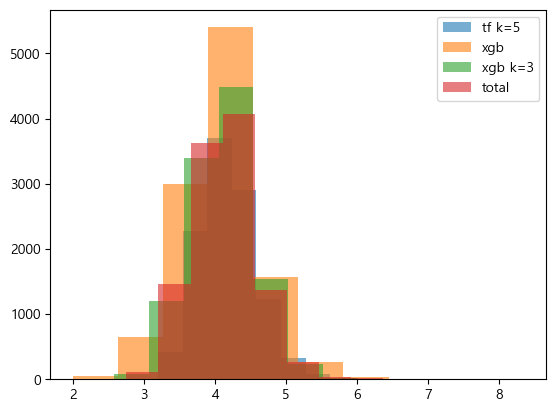

In [39]:
# fig, axes = plt.subplots(ncols=4, figsize=(10, 2))
plt.hist(tf_test_preds, alpha=0.6, label="tf k=5")
plt.hist(xgb_test_pred, alpha=0.6, label="xgb")
plt.hist(xgb_test_preds, alpha=0.6, label="xgb k=3")
# plt.hist(tf_test_preds2, alpha=0.6, label="AE")
# plt.hist(poi_pred, alpha=0.6, label="Poisson")
# plt.hist(glm_pred, alpha=0.6, label="Gaussian")
plt.hist(result_test_preds, alpha=0.6, label="total")
plt.legend()
plt.show()

In [35]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission["ECLO"] = result_test_preds

sample_submission.to_csv("231207_tf5_xgb1_xgb3_0_0001.csv", index=False)
sample_submission["ECLO"]

0        3.798651
1        3.161081
2        5.132165
3        4.560428
4        4.704337
           ...   
10958    5.744203
10959    4.512302
10960    4.605709
10961    4.909264
10962    4.873200
Name: ECLO, Length: 10963, dtype: float64